## Project Retail Market

## EDA & Cleaning Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('retailMarketingDI.csv')

In [3]:
df.head()

Age  Gender OwnHome  Married Location  Salary  Children  Catalogs  \
0     Old  Female     Own   Single      Far   47500         0         6   
1  Middle    Male    Rent   Single    Close   63600         0         6   
2   Young  Female    Rent   Single    Close   13500         0        18   
3  Middle    Male     Own  Married    Close   85600         1        18   
4  Middle  Female     Own   Single    Close   68400         0        12   

   AmountSpent  
0        755.0  
1       1318.0  
2        296.0  
3       2436.0  
4       1304.0

In [4]:
df['Children'].value_counts()

0    462
1    267
2    146
3    125
Name: Children, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
Age            1000 non-null object
Gender         1000 non-null object
OwnHome        1000 non-null object
Married        1000 non-null object
Location       1000 non-null object
Salary         1000 non-null int64
Children       1000 non-null int64
Catalogs       1000 non-null int64
AmountSpent    994 non-null float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [133]:
df_nan=df[(df.AmountSpent.isna())]

In [134]:
df_nan

Age  Gender OwnHome  Married Location  Salary  Children  Catalogs  \
32   Middle  Female    Rent  Married    Close       0         3        24   
53   Middle  Female     Own   Single      Far   56000         3         6   
61    Young  Female     Own   Single    Close   25900         2        12   
99   Middle    Male    Rent  Married      Far   87100         2        18   
164  Middle  Female    Rent   Single    Close   39700         3        12   
225   Young  Female    Rent   Single    Close   11400         2         6   

     AmountSpent  
32           NaN  
53           NaN  
61           NaN  
99           NaN  
164          NaN  
225          NaN

In [4]:
df.replace(np.nan, 0, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
Age            1000 non-null object
Gender         1000 non-null object
OwnHome        1000 non-null object
Married        1000 non-null object
Location       1000 non-null object
Salary         1000 non-null int64
Children       1000 non-null int64
Catalogs       1000 non-null int64
AmountSpent    1000 non-null float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [13]:
df.columns

Index(['Age', 'Gender', 'OwnHome', 'Married', 'Location', 'Salary', 'Children',
       'Catalogs', 'AmountSpent'],
      dtype='object')

In [160]:
df.describe()

Salary    Children     Catalogs  AmountSpent
count    1000.000000  1000.00000  1000.000000   994.000000
mean    55916.600000     0.93400    14.682000  1218.188129
std     30748.392284     1.05107     6.622895   961.849079
min         0.000000     0.00000     6.000000     0.000000
25%     29200.000000     0.00000     6.000000   490.250000
50%     53700.000000     1.00000    12.000000   962.500000
75%     76925.000000     2.00000    18.000000  1688.750000
max    168800.000000     3.00000    24.000000  6217.000000

In [159]:
df.describe(include=np.object)

Age  Gender OwnHome  Married Location
count     1000    1000    1000     1000     1000
unique       3       2       2        2        2
top     Middle  Female     Own  Married    Close
freq       508     506     516      502      710

In [15]:
df['Age'].value_counts()

Middle    508
Young     287
Old       205
Name: Age, dtype: int64

In [16]:
columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample']
data = []
for i in df.columns:
    current_data=[]
    datafeature = i
    dataType = df[[i]].dtypes[0]
    null = df[i].isna().sum()
    nullPct = round(df[i].isna().sum()/len(df)*100,2)
    unique = df[i].drop_duplicates().count()
    uniqueSample = df[i].drop_duplicates().sample(2).values
    data.append([datafeature, dataType, null, nullPct, unique, uniqueSample])
    
current_data = pd.DataFrame(data,columns=columns)

In [17]:
current_data

dataFeatures dataType  null  nullPct  unique       uniqueSample
0          Age   object     0      0.0       3       [Old, Young]
1       Gender   object     0      0.0       2     [Female, Male]
2      OwnHome   object     0      0.0       2        [Rent, Own]
3      Married   object     0      0.0       2  [Married, Single]
4     Location   object     0      0.0       2       [Far, Close]
5       Salary    int64     0      0.0     635     [31500, 41000]
6     Children    int64     0      0.0       4             [0, 3]
7     Catalogs    int64     0      0.0       4            [12, 6]
8  AmountSpent  float64     0      0.0     847     [540.0, 934.0]

In [18]:
df['Gender'].value_counts()

Female    506
Male      494
Name: Gender, dtype: int64

In [19]:
df['Married'].value_counts()

Married    502
Single     498
Name: Married, dtype: int64

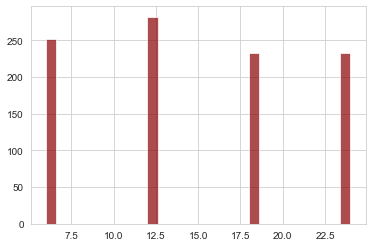

In [136]:
df['Catalogs'].hist(bins=30,color='darkred',alpha=0.7)

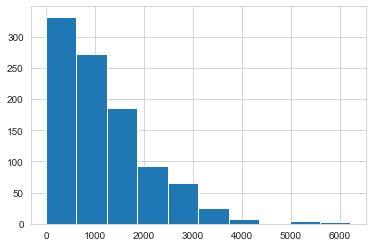

In [195]:
df['AmountSpent'].hist()

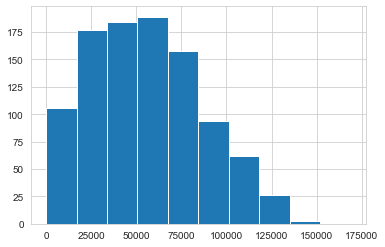

In [197]:
df['Salary'].hist()

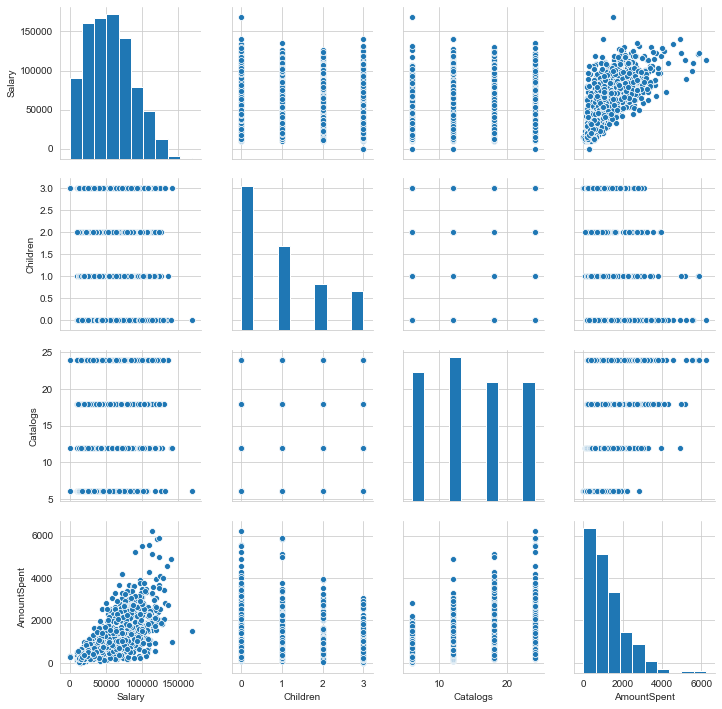

In [196]:
sns.pairplot(df)

## Counting Gender due to Age

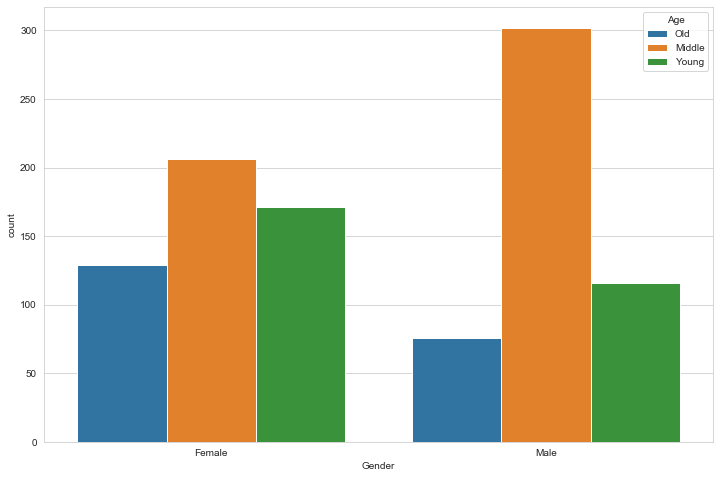

In [20]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.countplot(data=df,x='Gender',hue='Age')

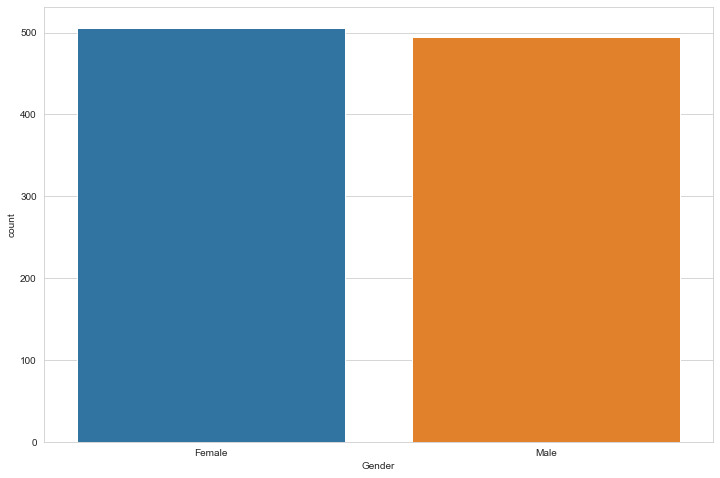

In [138]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.countplot(data=df,x='Gender')

## Counting Age due to Married status

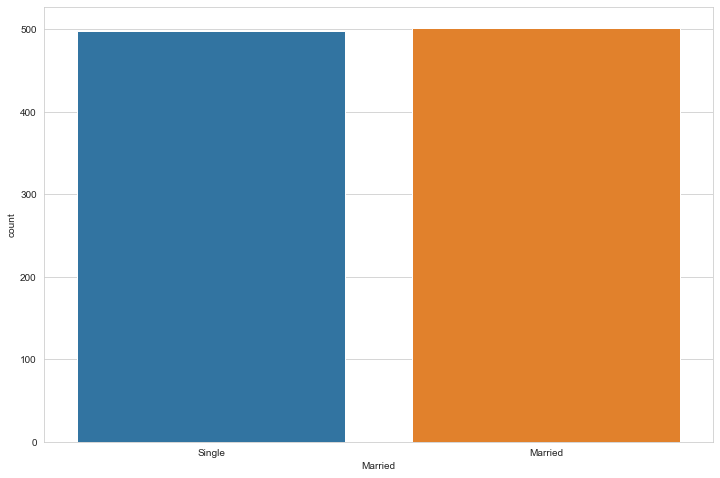

In [137]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.countplot(data=df, x='Married')

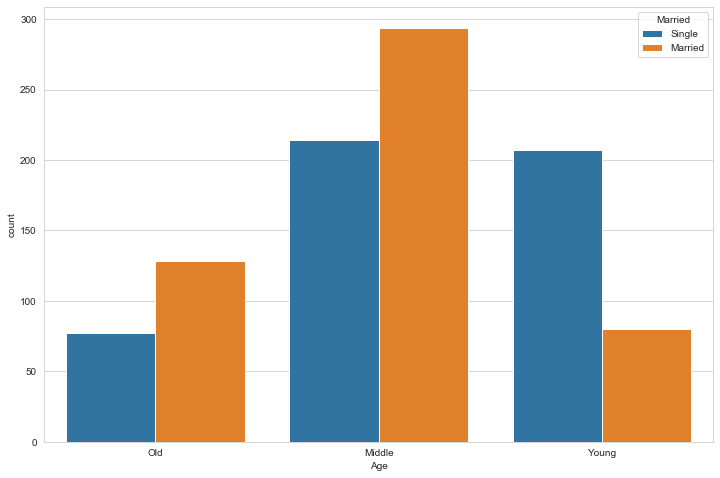

In [21]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.countplot(data=df, x='Age',hue='Married')

In [199]:
sns.grid()

AttributeError: module 'seaborn' has no attribute 'gridplot'

## Counting ownhome due to Married status

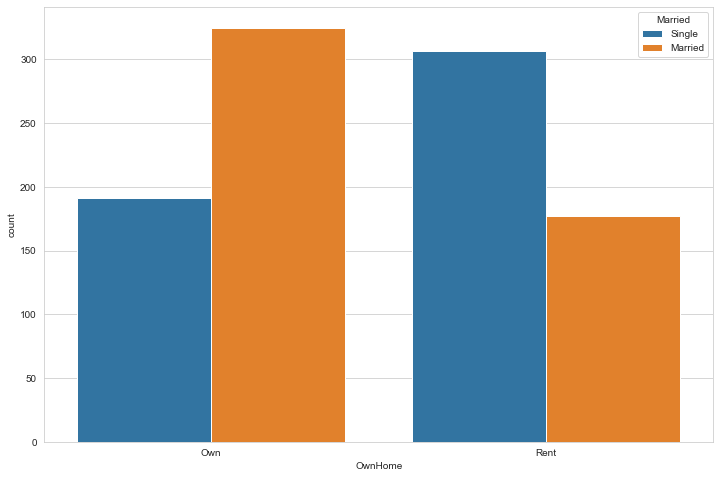

In [22]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.countplot(data=df, x='OwnHome', hue='Married')

## Counting catalog due to own home

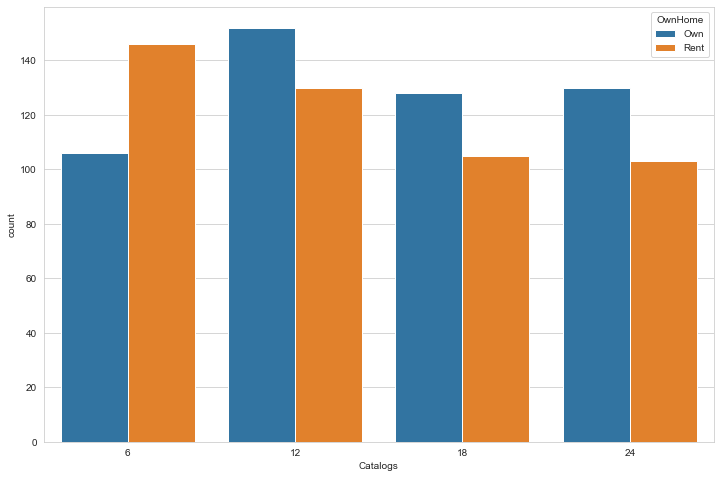

In [23]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.countplot(data=df, x='Catalogs', hue='OwnHome')

## Counting Ownhome due to location

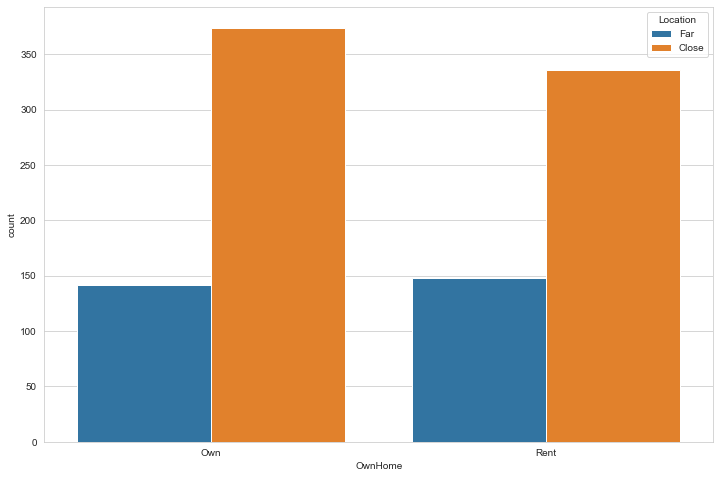

In [24]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.countplot(data=df, x='OwnHome', hue='Location')

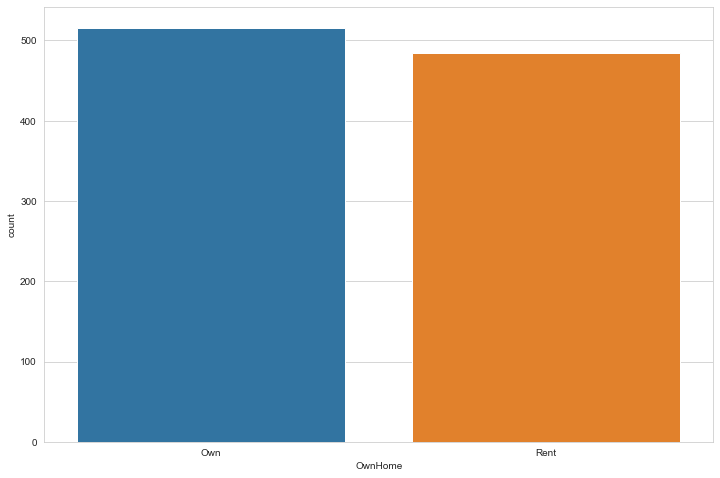

In [139]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.countplot(data=df, x='OwnHome')

## Counting catalogs due to married status

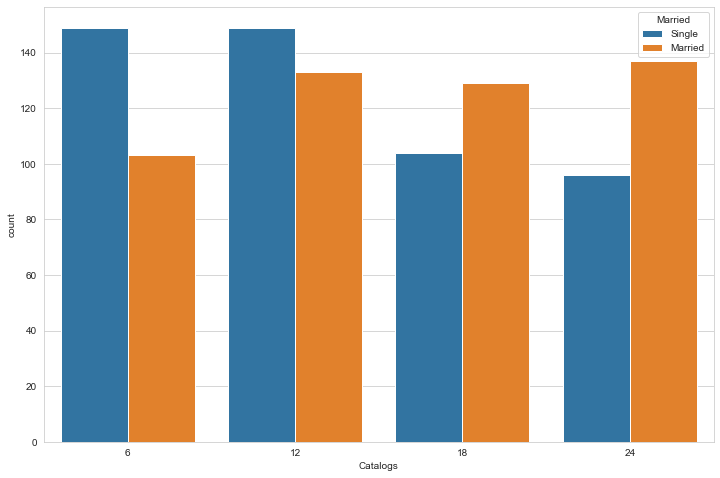

In [25]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.countplot(data=df,x='Catalogs',hue='Married')

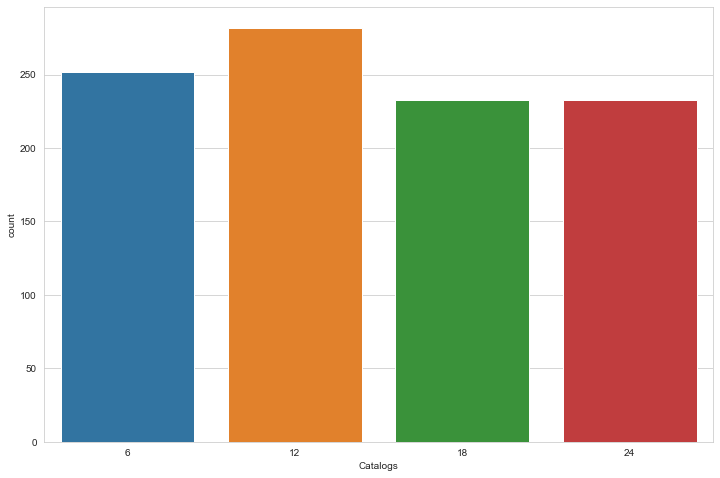

In [140]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.countplot(data=df,x='Catalogs')

In [141]:
df['Catalogs'].value_counts()

12    282
6     252
24    233
18    233
Name: Catalogs, dtype: int64

## Counting catalogs due to num of children

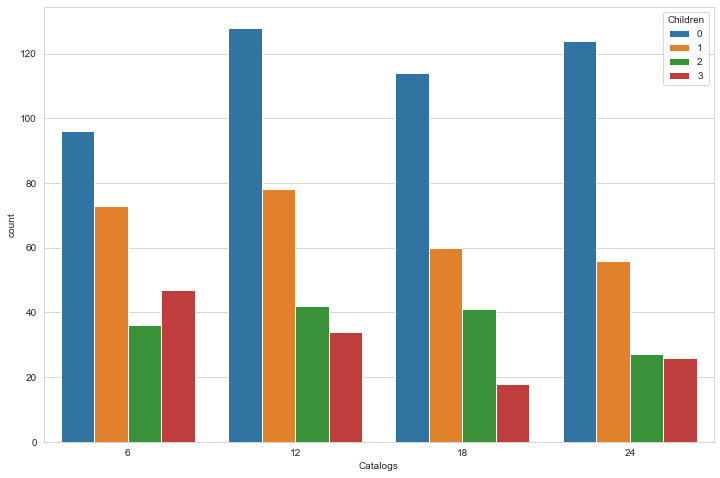

In [26]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.countplot(data=df,x='Catalogs',hue='Children')

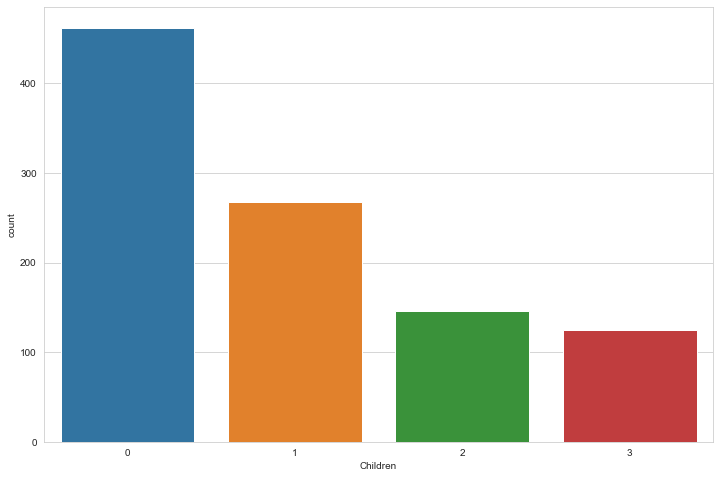

In [142]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.countplot(data=df,x='Children')

## Counting catalogs due to ownhome

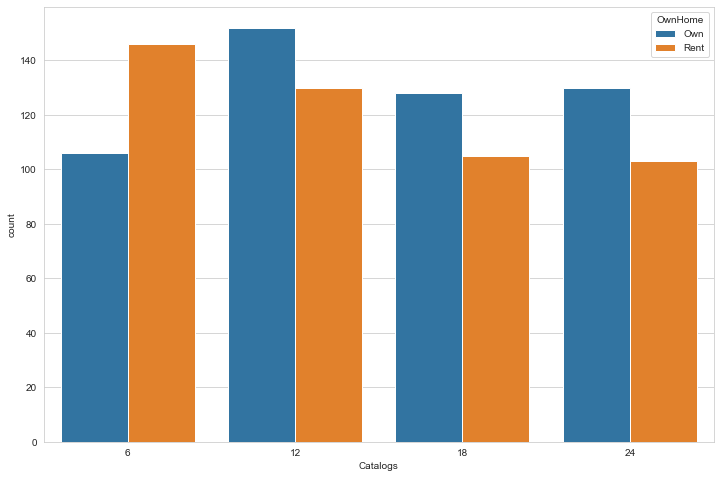

In [27]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.countplot(data=df, x='Catalogs', hue='OwnHome')

## Counting catalogs due to location

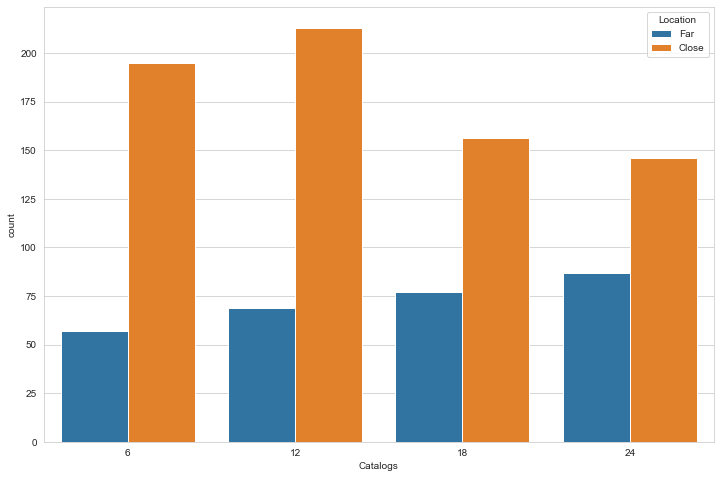

In [28]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.countplot(data=df, x='Catalogs', hue='Location')

In [202]:
df_sing=df[(df.Married=='Single') & (df.Children>0)]

In [203]:
df_sing.head()

Age  Gender OwnHome Married Location  Salary  Children  Catalogs  \
18  Middle    Male    Rent  Single    Close   38600         1        18   
20   Young  Female    Rent  Single      Far   14300         2         6   
26  Middle    Male     Own  Single    Close   62800         3         6   
29   Young    Male    Rent  Single    Close   21700         1        18   
35  Middle  Female     Own  Single    Close   27000         2         6   

    AmountSpent  
18        542.0  
20        194.0  
26        707.0  
29        774.0  
35        183.0

In [207]:
df_sing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 18 to 996
Data columns (total 9 columns):
Age            267 non-null object
Gender         267 non-null object
OwnHome        267 non-null object
Married        267 non-null object
Location       267 non-null object
Salary         267 non-null int64
Children       267 non-null int64
Catalogs       267 non-null int64
AmountSpent    263 non-null float64
dtypes: float64(1), int64(3), object(5)
memory usage: 30.9+ KB


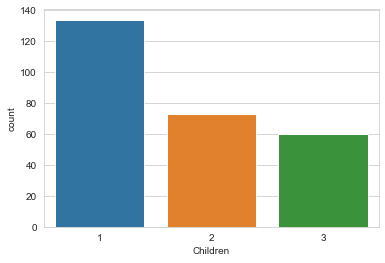

In [204]:
sns.countplot(data=df_sing, x='Children')

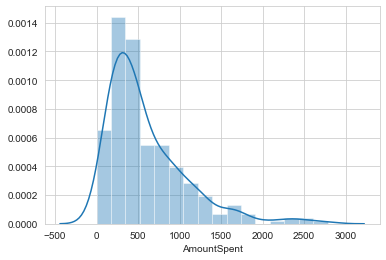

In [210]:
sns.distplot(df_sing['AmountSpent'].dropna())

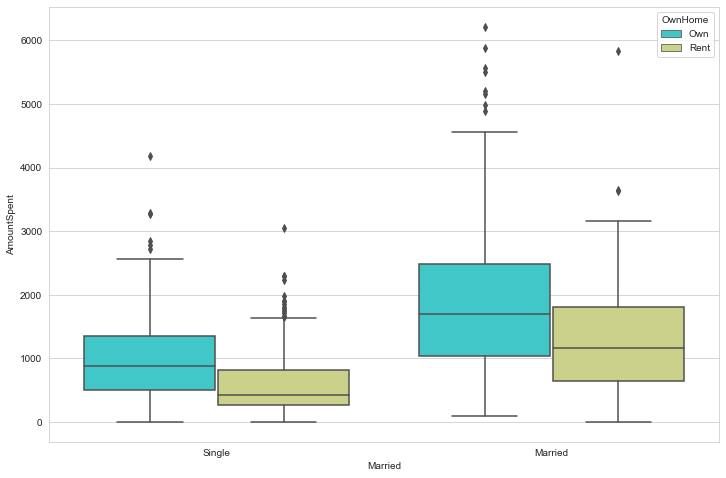

In [29]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.boxplot(data=df,x='Married',y='AmountSpent',palette='rainbow',hue='OwnHome')

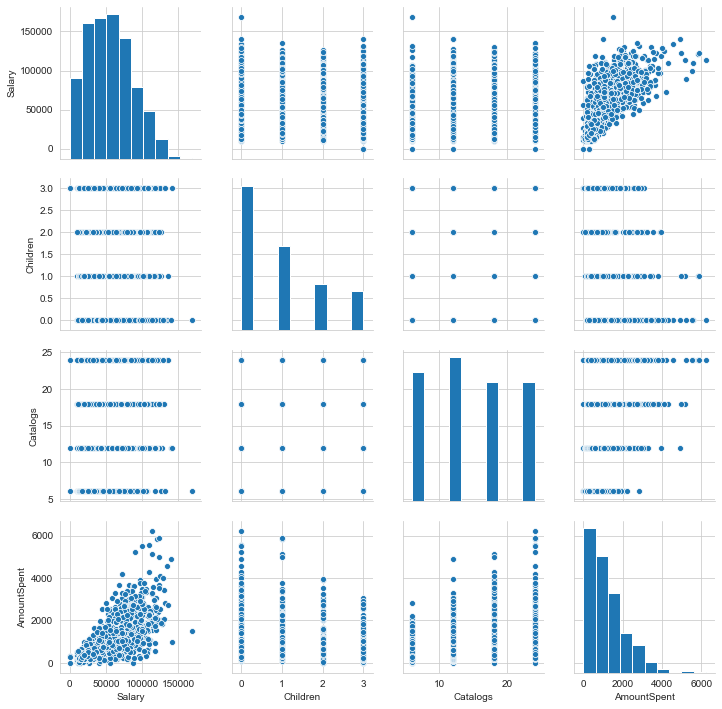

In [30]:
sns.set_style('whitegrid')
sns.pairplot(df)

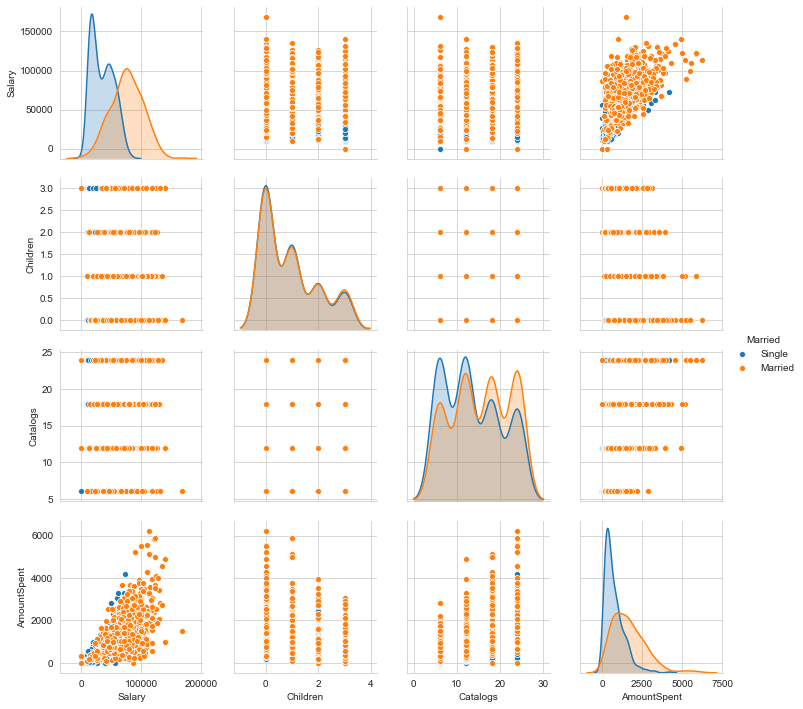

In [31]:
sns.set_style('whitegrid')
sns.pairplot(df, hue='Married')

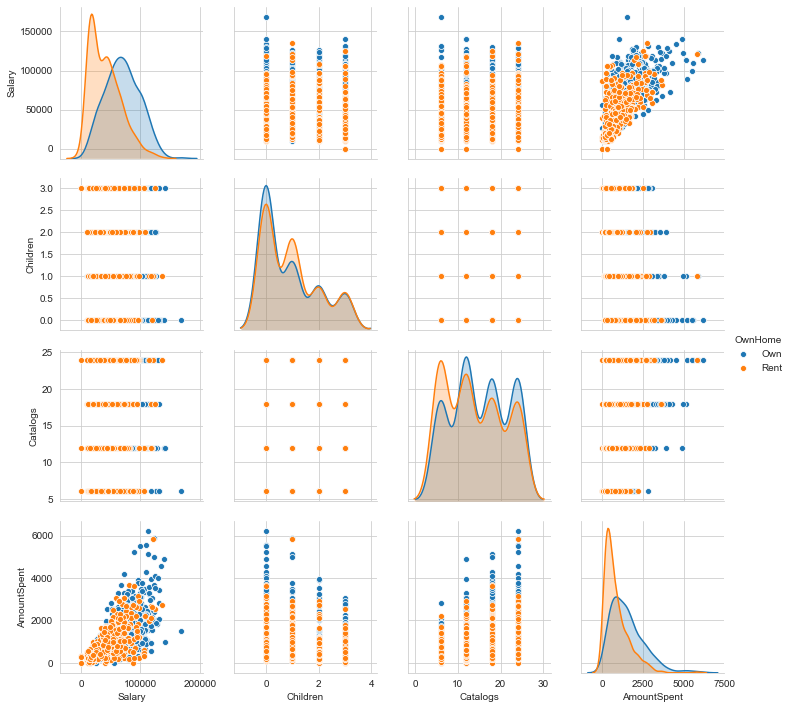

In [33]:
sns.set_style('whitegrid')
sns.pairplot(df,hue='OwnHome')

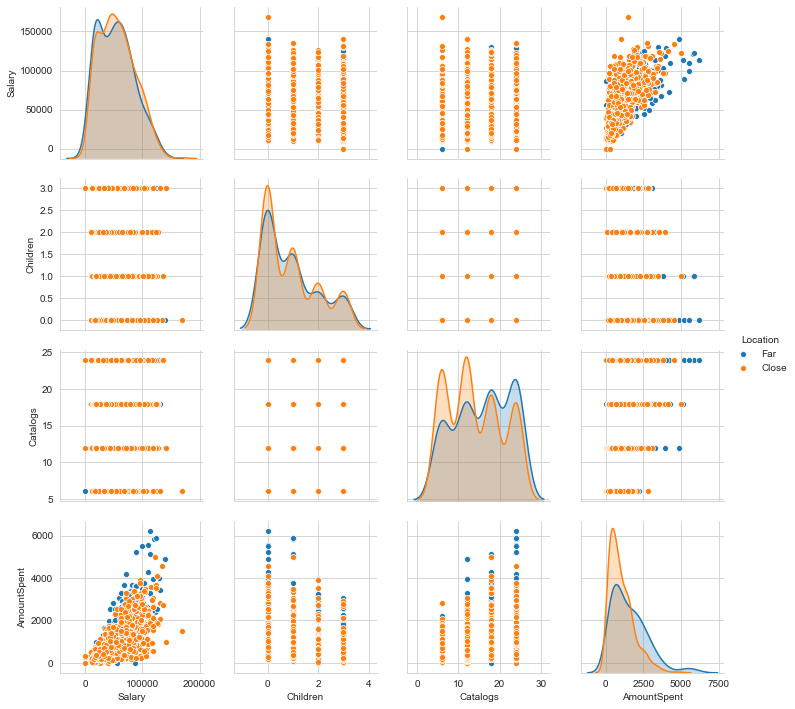

In [34]:
sns.set_style('whitegrid')
sns.pairplot(df, hue='Location')

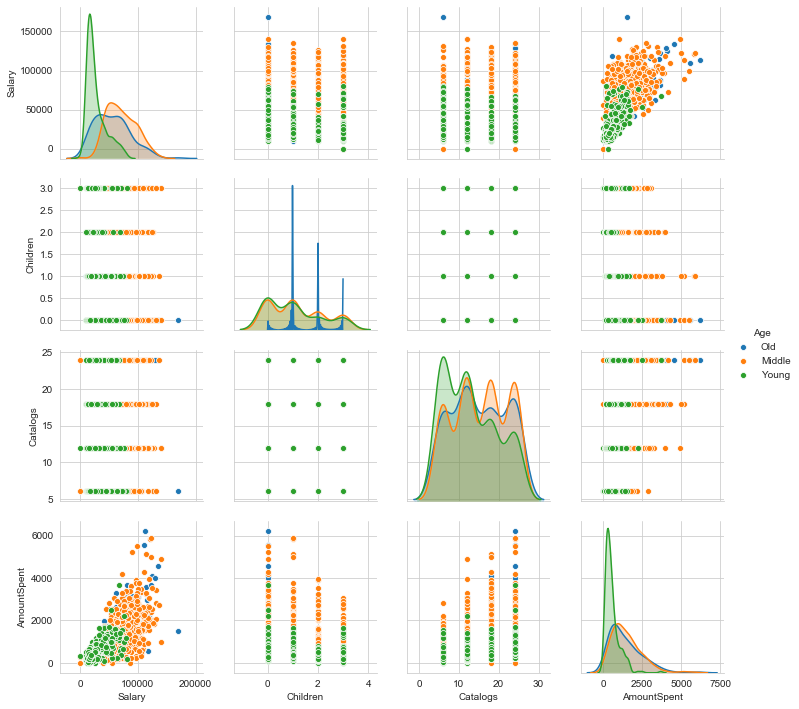

In [35]:
sns.set_style('whitegrid')
sns.pairplot(data=df,hue='Age')

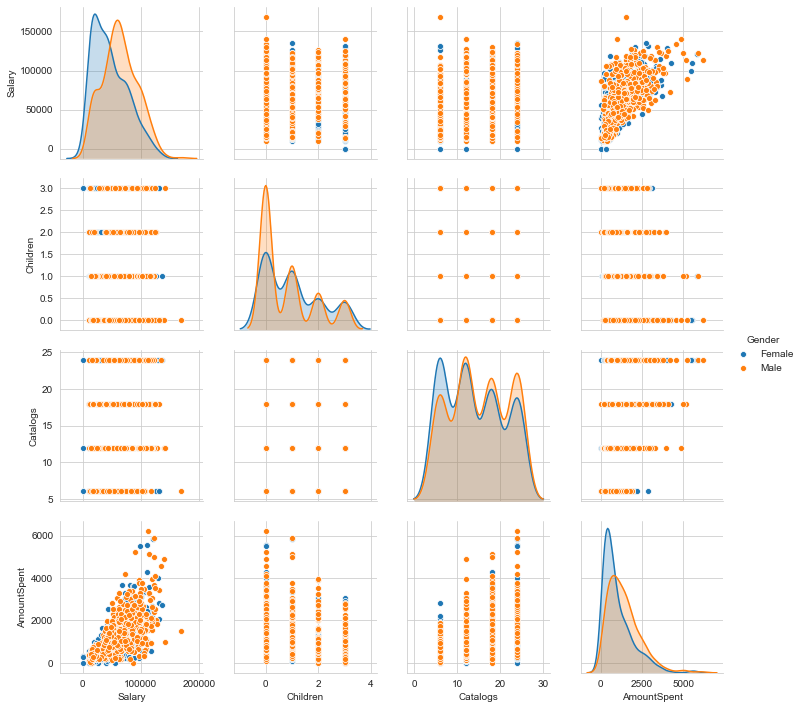

In [36]:
sns.set_style('whitegrid')
sns.pairplot(data=df, hue='Gender')

In [37]:
(df.AmountSpent<500).sum()

260

In [38]:
df['AmountSpent'][(df.AmountSpent>500) & (df.AmountSpent<1000)].sum()

190245.0

In [87]:
df['Salary'][(df.Salary>=0) & (df.Salary<25000)].sum()

3466400

In [88]:
df['Salary'][(df.Salary>25000) & (df.Salary<50000)].sum()

9718100

In [90]:
df['Salary'][(df.Salary>50000) & (df.Salary<75000)].sum()

16974900

In [93]:
(df.Salary>100000).sum()

97

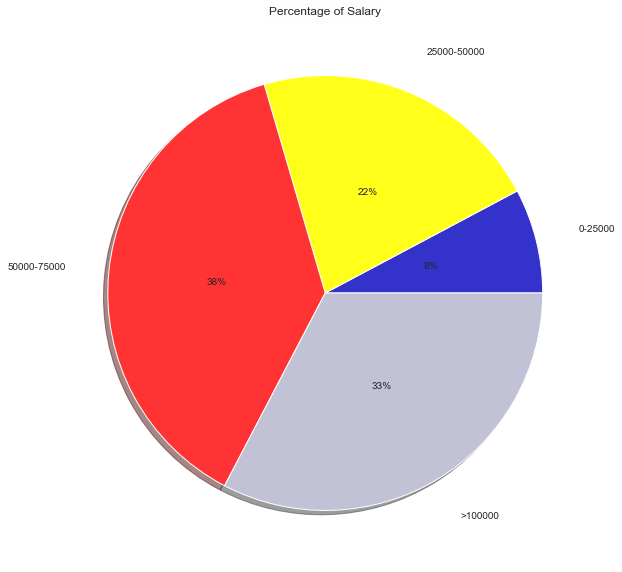

In [211]:
slices=[df['Salary'][(df.Salary>=0) & (df.Salary<=25000)].sum(),
        df['Salary'][(df.Salary>25000) & (df.Salary<=50000)].sum(),
        df['Salary'][(df.Salary>50000) & (df.Salary<=75000)].sum(),
        df['Salary'][(df.Salary>=75000)& (df.Salary<=100000)].sum(),]
labels=['0-25000','25000-50000','50000-75000','>100000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Salary", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

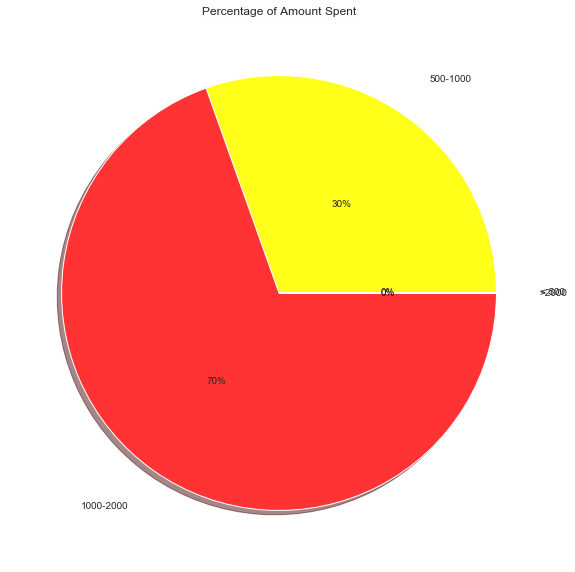

In [212]:
slices=[(df.AmountSpent<=500).sum(),
        df['AmountSpent'][(df.AmountSpent>500) & (df.AmountSpent<=1000)].sum(),
        df['AmountSpent'][(df.AmountSpent>1000) & (df.AmountSpent<=2000)].sum(),
        (df.AmountSpent>2000).sum(),]
labels=['< 500','500-1000','1000-2000','>2000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Amount Spent", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

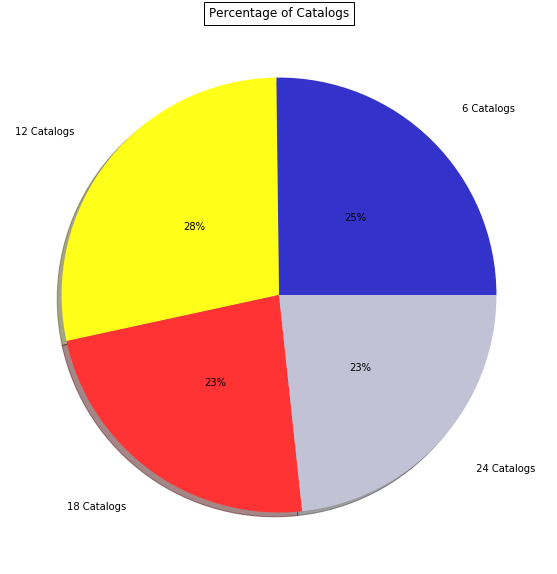

In [25]:
slices=[(df.Catalogs==6).sum(),
        (df.Catalogs==12).sum(),
        (df.Catalogs==18).sum(),
        (df.Catalogs==24).sum(),]
labels=['6 Catalogs','12 Catalogs','18 Catalogs',' 24 Catalogs']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Catalogs", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

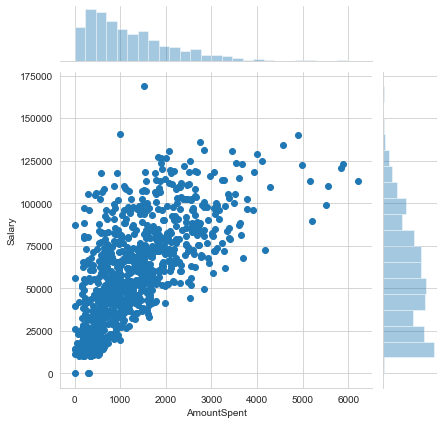

In [108]:
sns.set_style('whitegrid')
sns.jointplot(data=df, x='AmountSpent',y='Salary',kind='scatter')

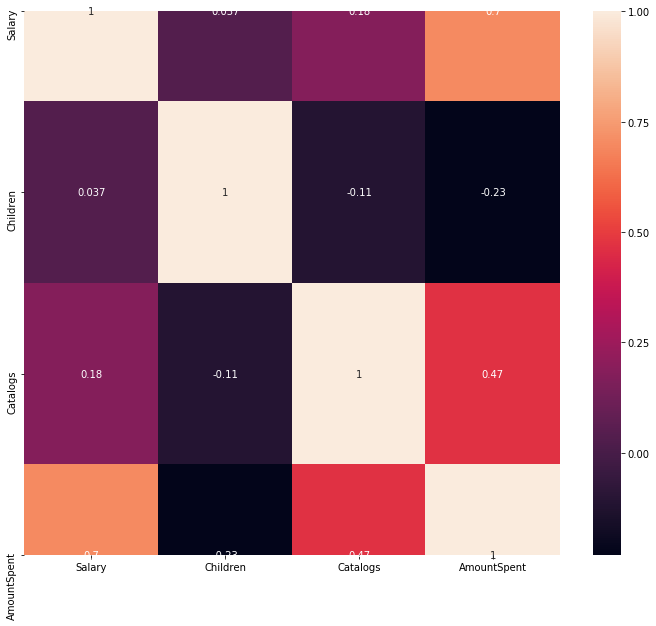

In [27]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

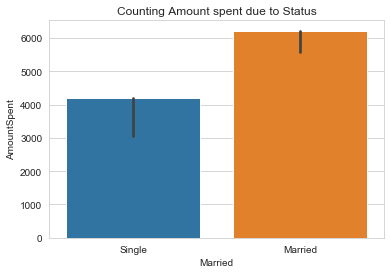

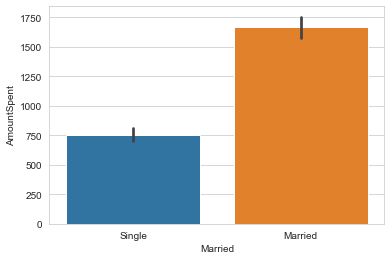

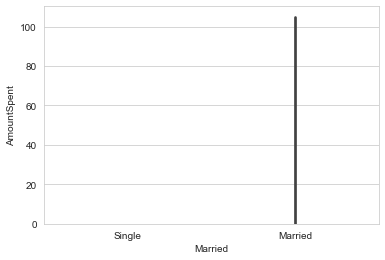

In [16]:
plt.title('Counting Amount spent due to Status')
sns.set_style('whitegrid')
sns.barplot(data=df, x='Married', y='AmountSpent',estimator=np.max)
plt.show()
sns.barplot(data=df, x='Married', y='AmountSpent')
plt.show()
sns.barplot(data=df, x='Married', y='AmountSpent',estimator=np.min)
plt.show()

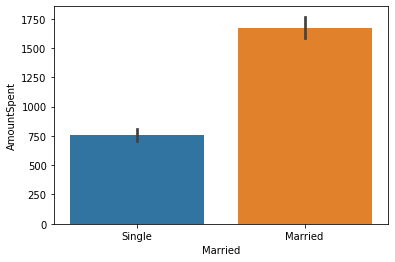

In [9]:
sns.barplot(data=df, x='Married', y='AmountSpent')

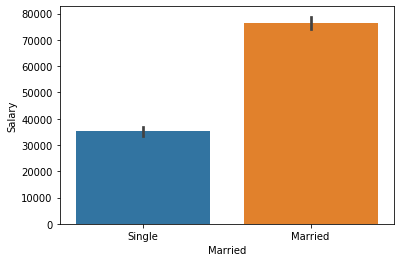

In [11]:
sns.barplot(data=df, x='Married', y='Salary')

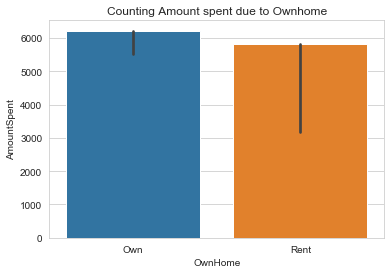

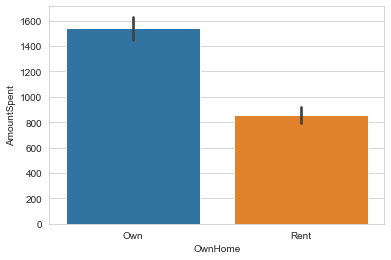

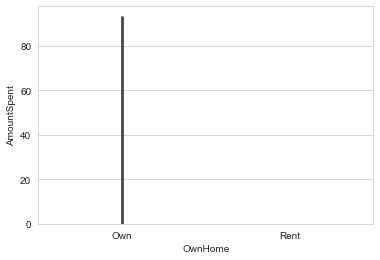

In [7]:
plt.title('Counting Amount spent due to Ownhome')
sns.set_style('whitegrid')
sns.barplot(data=df, x='OwnHome', y='AmountSpent',estimator=np.max)
plt.show()
sns.barplot(data=df, x='OwnHome', y='AmountSpent')
plt.show()
sns.barplot(data=df, x='OwnHome', y='AmountSpent',estimator=np.min)
plt.show()

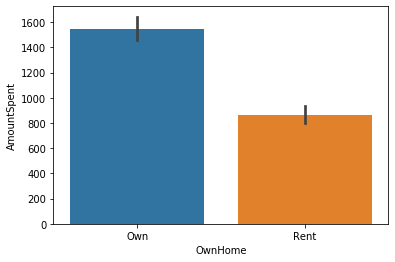

In [10]:
sns.barplot(data=df, x='OwnHome', y='AmountSpent')

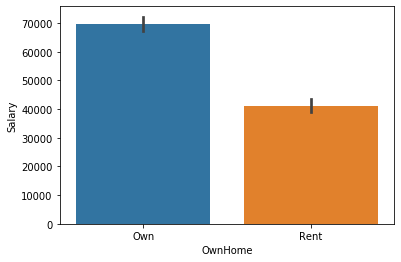

In [12]:
sns.barplot(data=df, x='OwnHome', y='Salary')

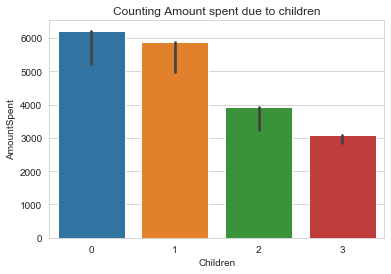

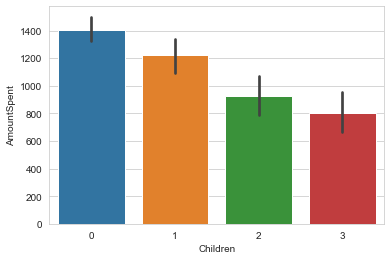

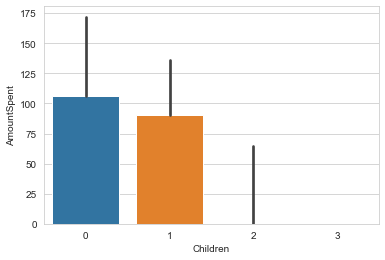

In [8]:
plt.title('Counting Amount spent due to children')
sns.set_style('whitegrid')
sns.barplot(data=df, x='Children', y='AmountSpent',estimator=np.max)
plt.show()
sns.barplot(data=df, x='Children', y='AmountSpent')
plt.show()
sns.barplot(data=df, x='Children', y='AmountSpent',estimator=np.min)
plt.show()

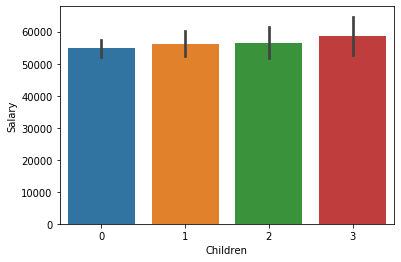

In [15]:
sns.barplot(data=df, x='Children', y='Salary')

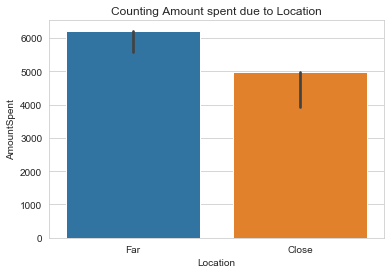

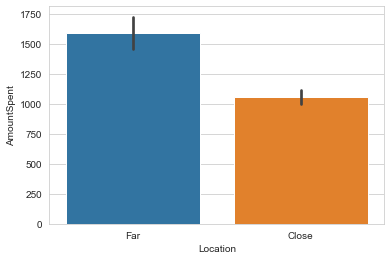

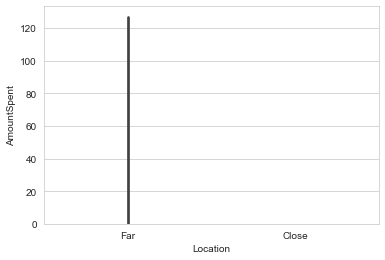

In [9]:
plt.title('Counting Amount spent due to Location')
sns.set_style('whitegrid')
sns.barplot(data=df, x='Location', y='AmountSpent',estimator=np.max)
plt.show()
sns.barplot(data=df, x='Location', y='AmountSpent')
plt.show()
sns.barplot(data=df, x='Location', y='AmountSpent',estimator=np.min)
plt.show()

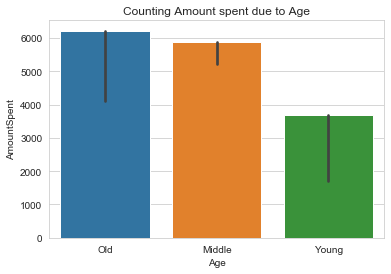

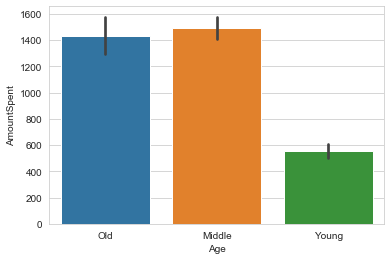

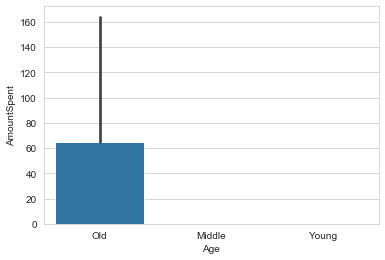

In [10]:
plt.title('Counting Amount spent due to Age')
sns.set_style('whitegrid')
sns.barplot(data=df, x='Age', y='AmountSpent',estimator=np.max)
plt.show()
sns.barplot(data=df, x='Age', y='AmountSpent')
plt.show()
sns.barplot(data=df, x='Age', y='AmountSpent',estimator=np.min)
plt.show()

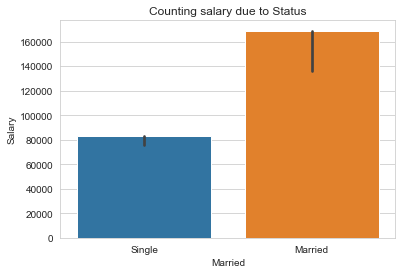

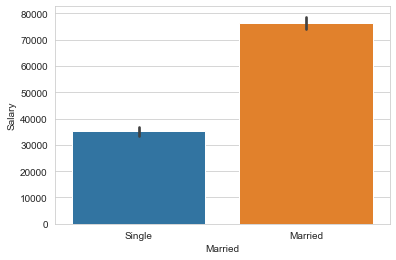

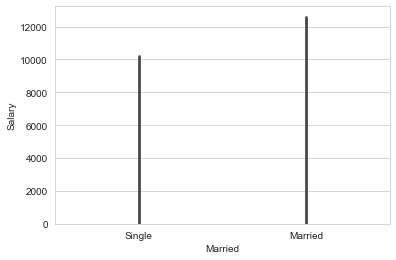

In [11]:
plt.title('Counting salary due to Status')
sns.set_style('whitegrid')
sns.barplot(data=df, x='Married', y='Salary',estimator=np.max)
plt.show()
sns.barplot(data=df, x='Married', y='Salary')
plt.show()
sns.barplot(data=df, x='Married', y='Salary',estimator=np.min)
plt.show()

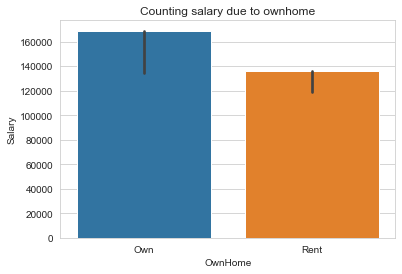

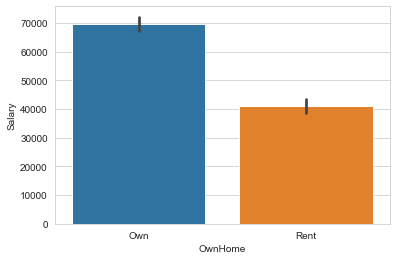

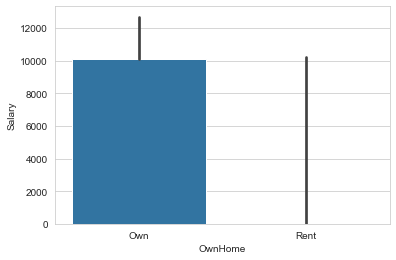

In [12]:
plt.title('Counting salary due to ownhome')
sns.set_style('whitegrid')
sns.barplot(data=df, x='OwnHome', y='Salary',estimator=np.max)
plt.show()
sns.barplot(data=df, x='OwnHome', y='Salary')
plt.show()
sns.barplot(data=df, x='OwnHome', y='Salary',estimator=np.min)
plt.show()

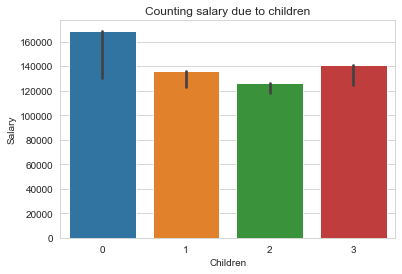

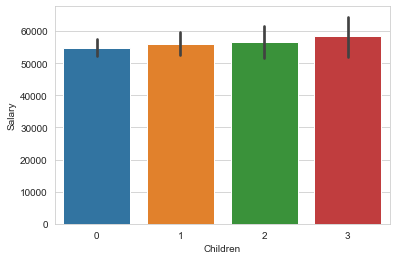

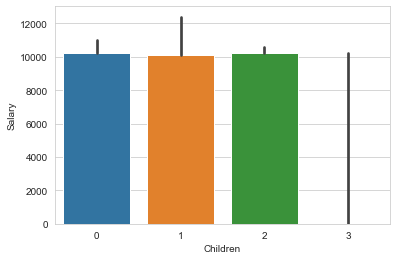

In [13]:
plt.title('Counting salary due to children')
sns.set_style('whitegrid')
sns.barplot(data=df, x='Children', y='Salary',estimator=np.max)
plt.show()
sns.barplot(data=df, x='Children', y='Salary')
plt.show()
sns.barplot(data=df, x='Children', y='Salary',estimator=np.min)
plt.show()

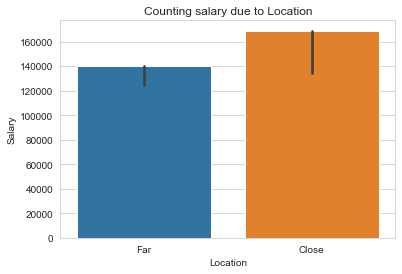

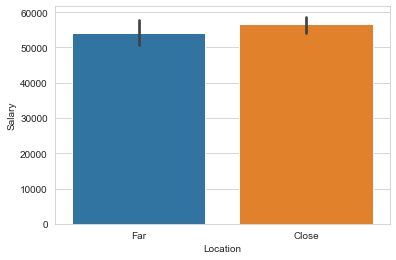

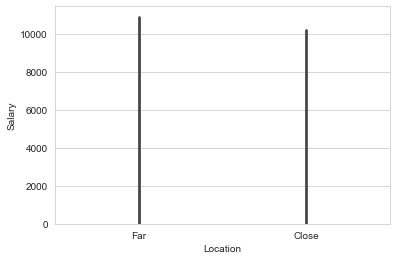

In [14]:
plt.title('Counting salary due to Location')
sns.set_style('whitegrid')
sns.barplot(data=df, x='Location', y='Salary',estimator=np.max)
plt.show()
sns.barplot(data=df, x='Location', y='Salary')
plt.show()
sns.barplot(data=df, x='Location', y='Salary',estimator=np.min)
plt.show()

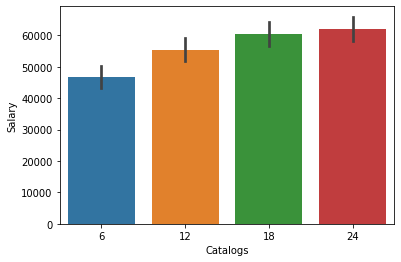

In [19]:
sns.barplot(data=df, x='Catalogs', y='Salary')

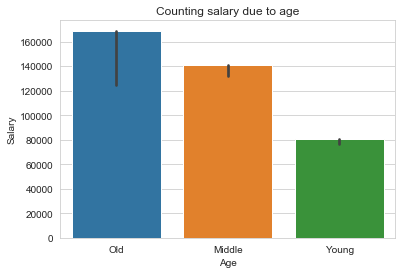

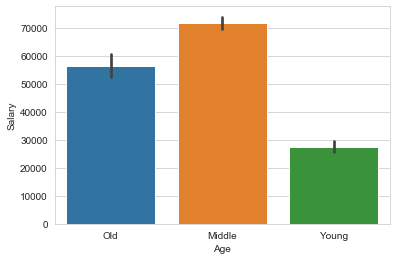

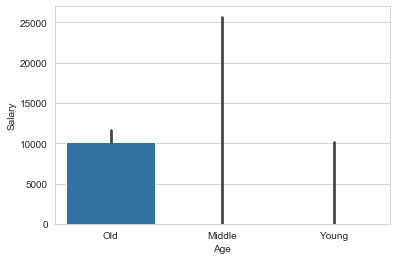

In [15]:
plt.title('Counting salary due to age')
sns.set_style('whitegrid')
sns.barplot(data=df, x='Age', y='Salary',estimator=np.max)
plt.show()
sns.barplot(data=df, x='Age', y='Salary')
plt.show()
sns.barplot(data=df, x='Age', y='Salary',estimator=np.min)
plt.show()

In [34]:
df1 = df[['Children',
       'Catalogs', 'AmountSpent']]

In [35]:
df1

Children  Catalogs  AmountSpent
0           0         6        755.0
1           0         6       1318.0
2           0        18        296.0
3           1        18       2436.0
4           0        12       1304.0
..        ...       ...          ...
995         1        18        384.0
996         1        18       1073.0
997         0        24       1417.0
998         2        18        671.0
999         1        24        973.0

[1000 rows x 3 columns]

Berdasarkan plot diatas dapat diketahui bahwa:

- Bila statusnya sudah menikah, lokasi antara rumah dengan lokasi retail marketnya jauh maka pengeluaran lebih besar
- Bila statusnya juga sudah menikah penghasilannya juga meningkat, mungkin ini dikarenakan kedua pasangan tersebut sudah memiliki penghasilan baik suami maupun istri sehingga penghasilan menjadi meningkat. Semakin banyak katalog yang dijual penghasilan semakin tinggi, namun pada plot diatas ditunjukkan pula semakin banyak anak semakin banyak pula penghasilannya. Asumsi saya mungkin kebanyakan anak-anak mereka sudah memasuki usia produktif sehingga sudah menghasilkan pendapatan yang berpengaruh pada penghasilan keluarga tersebut.

Kali ini saya akan menganalisa berdasarkan statusnya

ket:

Salary Range:
- 0-25000 = Low
- 25000-50000 = Mid
- 50000-75000 = High
-  More than 75000 = Very High

Amount Spent Range:
- Less than 500 = Low
- 500-1000 = Mid
- 1000-2000 = High
- More than 2000 = Very High

## Married Analysis

In [18]:
df7 = df[(df.Married=='Married')&(df.Location=='Close')&(df.OwnHome=='Own')]
df8 = df[(df.Married=='Married')&(df.Location=='Far')&(df.OwnHome=='Own')]
df13 = df[(df.Married=='Married')&(df.Location=='Close')&(df.OwnHome=='Rent')]
df14 = df[(df.Married=='Married')&(df.Location=='Far')&(df.OwnHome=='Rent')]

In [57]:
df7.describe()

Salary  Children   Catalogs  AmountSpent
count     73.000000      73.0  73.000000    73.000000
mean   46772.602740       0.0  14.712329  1068.068493
std    17982.987796       0.0   6.636347   577.218434
min    11400.000000       0.0   6.000000   166.000000
25%    33200.000000       0.0  12.000000   621.000000
50%    48100.000000       0.0  12.000000   992.000000
75%    62200.000000       0.0  18.000000  1443.000000
max    82800.000000       0.0  24.000000  3278.000000

In [161]:
df7.describe(include=np.object)

Age Gender OwnHome  Married Location
count      233    233     233      233      233
unique       3      2       1        1        1
top     Middle   Male     Own  Married    Close
freq       161    139     233      233      233

In [58]:
df8.describe()

Salary    Children    Catalogs  AmountSpent
count     122.000000  122.000000  122.000000   122.000000
mean    87899.180328    1.729508   14.557377  1427.581967
std     22299.136461    0.803267    6.262903   891.614070
min     10100.000000    1.000000    6.000000    93.000000
25%     71300.000000    1.000000   12.000000   717.750000
50%     86000.000000    2.000000   12.000000  1183.000000
75%    102650.000000    2.000000   18.000000  1904.750000
max    140700.000000    3.000000   24.000000  4984.000000

In [162]:
df8.describe(include=np.object)

Age Gender OwnHome  Married Location
count       92     92      92       92       92
unique       3      2       1        1        1
top     Middle   Male     Own  Married      Far
freq        55     53      92       92       92

In [84]:
df13.describe()

Salary    Children    Catalogs  AmountSpent
count     125.000000  125.000000  125.000000   124.000000
mean    64500.000000    1.024000   14.208000  1145.129032
std     25530.948961    1.058483    7.006099   758.409257
min         0.000000    0.000000    6.000000   105.000000
25%     42000.000000    0.000000    6.000000   579.500000
50%     65800.000000    1.000000   12.000000   978.000000
75%     81400.000000    2.000000   18.000000  1600.500000
max    135700.000000    3.000000   24.000000  3168.000000

In [163]:
df13.describe(include=np.object)

Age  Gender OwnHome  Married Location
count      125     125     125      125      125
unique       3       2       1        1        1
top     Middle  Female    Rent  Married    Close
freq        54      70     125      125      125

In [85]:
df14.describe()

Salary   Children   Catalogs  AmountSpent
count      52.000000  52.000000  52.000000    51.000000
mean    61746.153846   1.115385  16.961538  1781.921569
std     21484.864363   1.114149   6.255857   955.435081
min     20200.000000   0.000000   6.000000   428.000000
25%     48400.000000   0.000000  12.000000  1182.500000
50%     62250.000000   1.000000  18.000000  1639.000000
75%     72200.000000   2.000000  24.000000  2184.000000
max    124800.000000   3.000000  24.000000  5830.000000

In [164]:
df14.describe(include=np.object)

Age Gender OwnHome  Married Location
count       52     52      52       52       52
unique       3      2       1        1        1
top     Middle   Male    Rent  Married      Far
freq        24     30      52       52       52

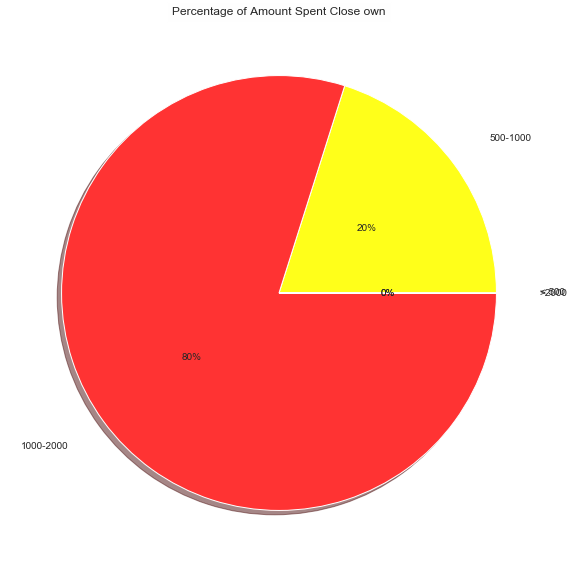

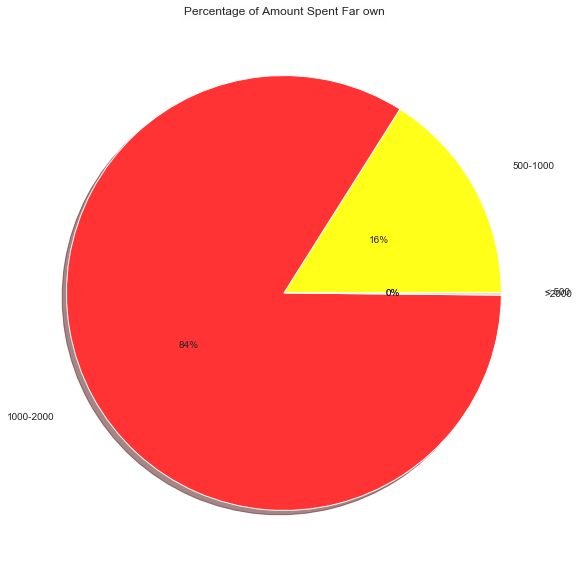

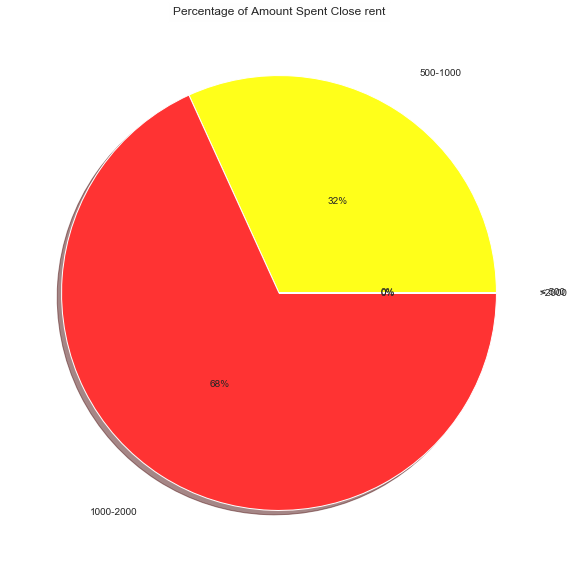

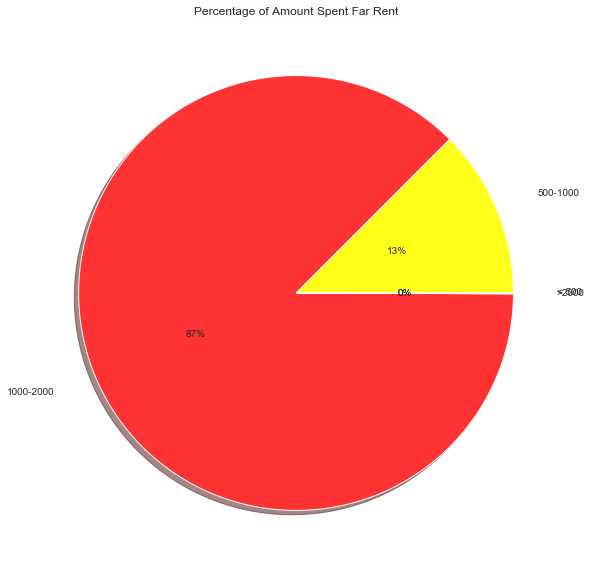

In [213]:
slices=[(df7.AmountSpent<=500).sum(),
        df7['AmountSpent'][(df7.AmountSpent>500) & (df7.AmountSpent<=1000)].sum(),
        df7['AmountSpent'][(df7.AmountSpent>1000) & (df7.AmountSpent<=2000)].sum(),
        (df7.AmountSpent>2000).sum(),]
labels=['< 500','500-1000','1000-2000','>2000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Amount Spent Close own", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

slices=[(df8.AmountSpent<=500).sum(),
        df8['AmountSpent'][(df8.AmountSpent>500) & (df8.AmountSpent<=1000)].sum(),
        df8['AmountSpent'][(df8.AmountSpent>1000) & (df8.AmountSpent<=2000)].sum(),
        (df8.AmountSpent>2000).sum(),]
labels=['< 500','500-1000','1000-2000','>2000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Amount Spent Far own", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

slices=[(df13.AmountSpent<=500).sum(),
        df13['AmountSpent'][(df13.AmountSpent>500) & (df13.AmountSpent<=1000)].sum(),
        df13['AmountSpent'][(df13.AmountSpent>1000) & (df13.AmountSpent<=2000)].sum(),
        (df13.AmountSpent>2000).sum(),]
labels=['< 500','500-1000','1000-2000','>2000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Amount Spent Close rent", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

slices=[(df14.AmountSpent<=500).sum(),
        df14['AmountSpent'][(df14.AmountSpent>500) & (df14.AmountSpent<=1000)].sum(),
        df14['AmountSpent'][(df14.AmountSpent>1000) & (df14.AmountSpent<=2000)].sum(),
        (df14.AmountSpent>2000).sum(),]
labels=['< 500','500-1000','1000-2000','>2000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Amount Spent Far Rent", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

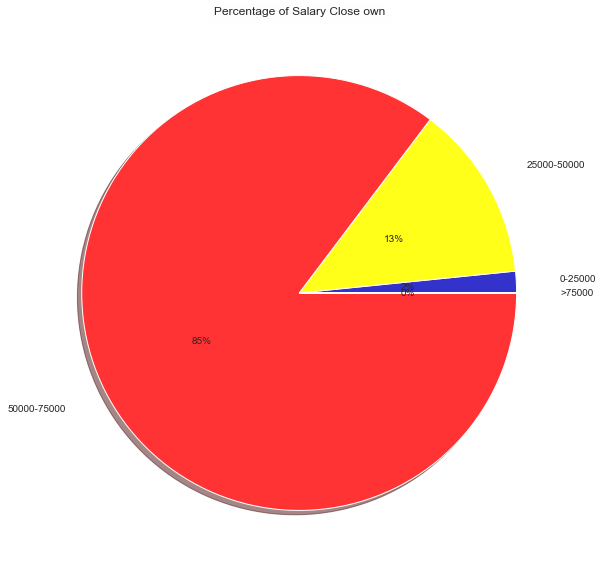

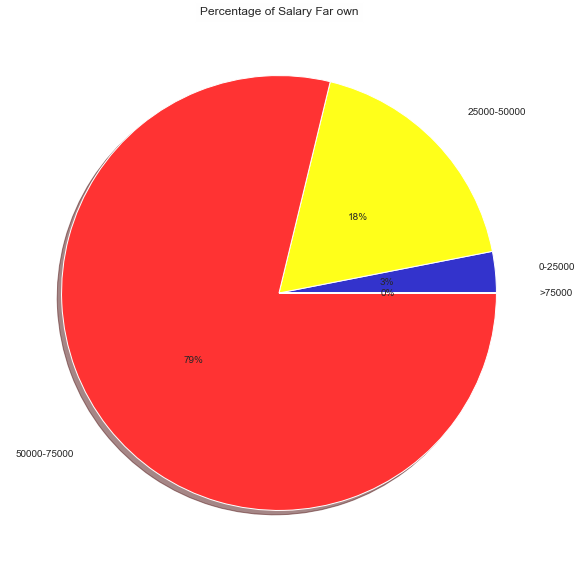

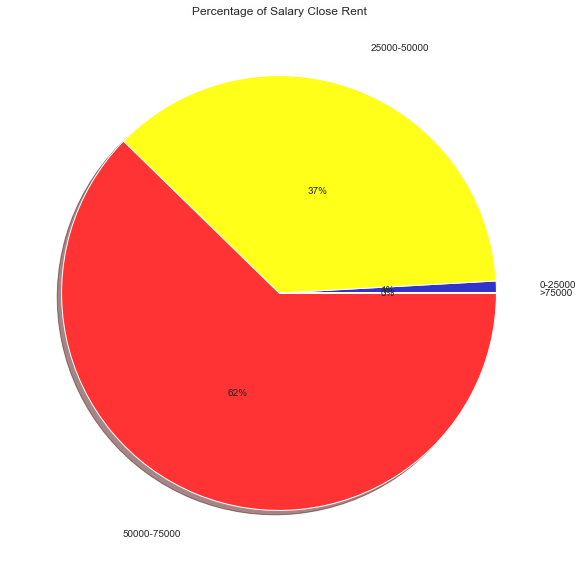

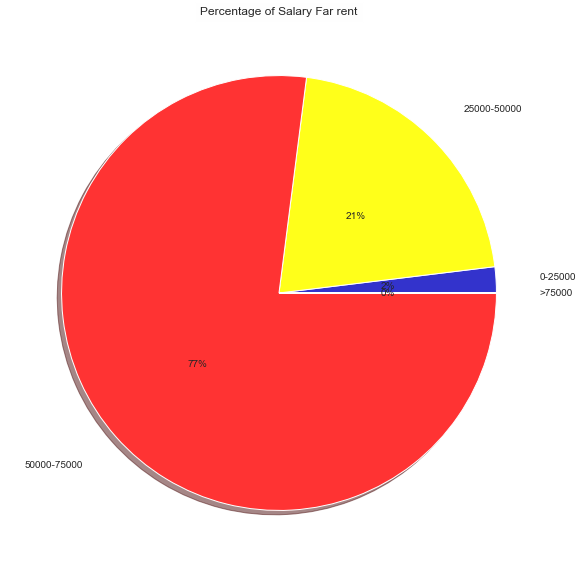

In [19]:
slices=[df7['Salary'][(df7.Salary>=0) & (df7.Salary<25000)].sum(),
        df7['Salary'][(df7.Salary>25000) & (df7.Salary<50000)].sum(),
        df7['Salary'][(df7.Salary>50000) & (df7.Salary<75000)].sum(),
        (df7.Salary>75000).sum(),]
labels=['0-25000','25000-50000','50000-75000','>75000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Salary Close own", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

slices=[df8['Salary'][(df8.Salary>=0) & (df8.Salary<25000)].sum(),
        df8['Salary'][(df8.Salary>25000) & (df8.Salary<50000)].sum(),
        df8['Salary'][(df8.Salary>50000) & (df8.Salary<75000)].sum(),
        (df8.Salary>75000).sum(),]
labels=['0-25000','25000-50000','50000-75000','>75000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Salary Far own", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

slices=[df13['Salary'][(df13.Salary>=0) & (df13.Salary<25000)].sum(),
        df13['Salary'][(df13.Salary>25000) & (df13.Salary<50000)].sum(),
        df13['Salary'][(df13.Salary>50000) & (df13.Salary<75000)].sum(),
        (df13.Salary>75000).sum(),]
labels=['0-25000','25000-50000','50000-75000','>75000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Salary Close Rent", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

slices=[df14['Salary'][(df14.Salary>=0) & (df14.Salary<25000)].sum(),
        df14['Salary'][(df14.Salary>25000) & (df14.Salary<50000)].sum(),
        df14['Salary'][(df14.Salary>50000) & (df14.Salary<75000)].sum(),
        (df14.Salary>75000).sum(),]
labels=['0-25000','25000-50000','50000-75000','>75000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Salary Far rent", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

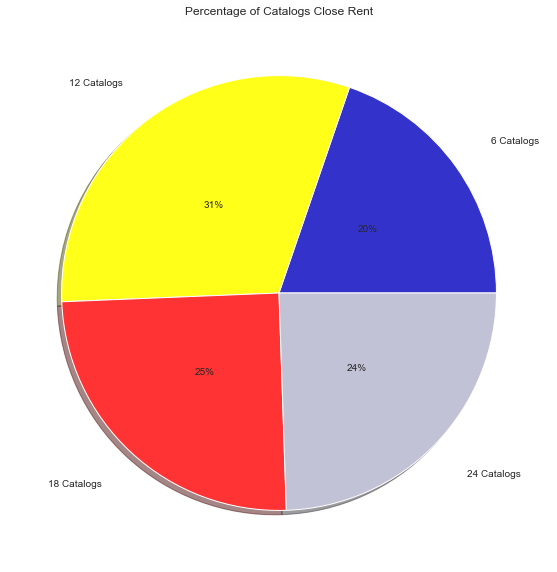

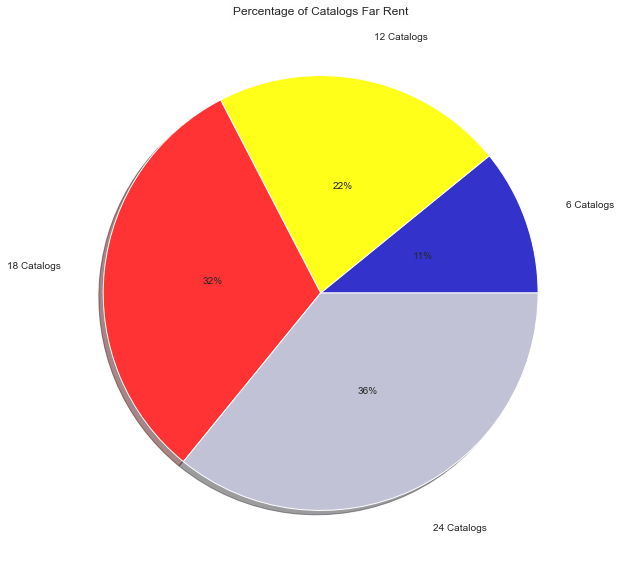

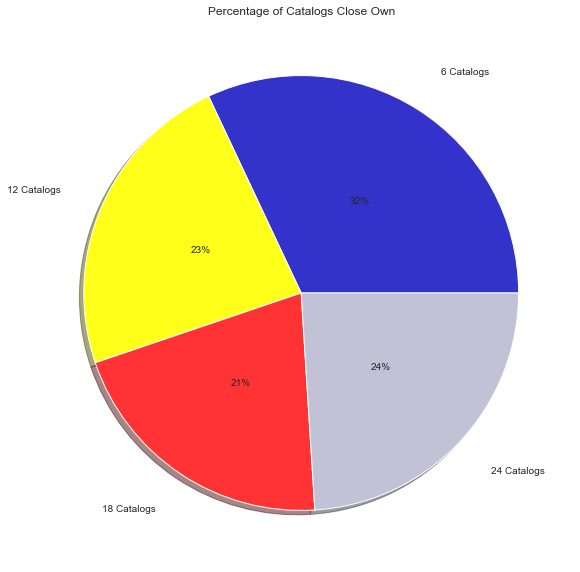

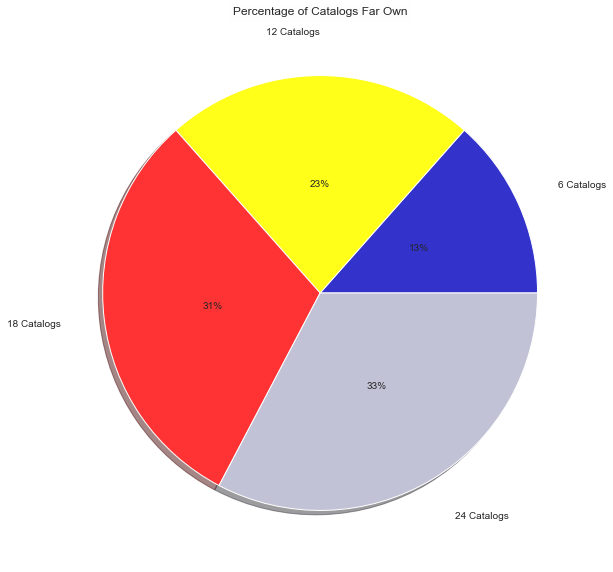

In [83]:
slices=[(df7.Catalogs==6).sum(),
        (df7.Catalogs==12).sum(),
        (df7.Catalogs==18).sum(),
        (df7.Catalogs==24).sum(),]
labels=['6 Catalogs','12 Catalogs','18 Catalogs','24 Catalogs']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Catalogs Close Rent", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

slices=[(df8.Catalogs==6).sum(),
        (df8.Catalogs==12).sum(),
        (df8.Catalogs==18).sum(),
        (df8.Catalogs==24).sum(),]
labels=['6 Catalogs','12 Catalogs','18 Catalogs','24 Catalogs']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Catalogs Far Rent", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

slices=[(df13.Catalogs==6).sum(),
        (df13.Catalogs==12).sum(),
        (df13.Catalogs==18).sum(),
        (df13.Catalogs==24).sum(),]
labels=['6 Catalogs','12 Catalogs','18 Catalogs','24 Catalogs']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Catalogs Close Own", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

slices=[(df14.Catalogs==6).sum(),
        (df14.Catalogs==12).sum(),
        (df14.Catalogs==18).sum(),
        (df14.Catalogs==24).sum(),]
labels=['6 Catalogs','12 Catalogs','18 Catalogs','24 Catalogs']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Catalogs Far Own", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

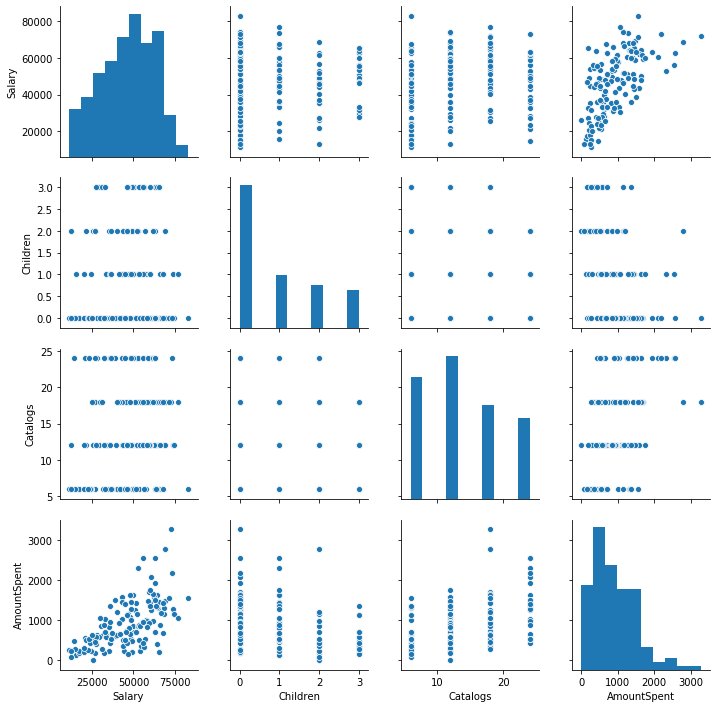

In [62]:
sns.pairplot(df7)

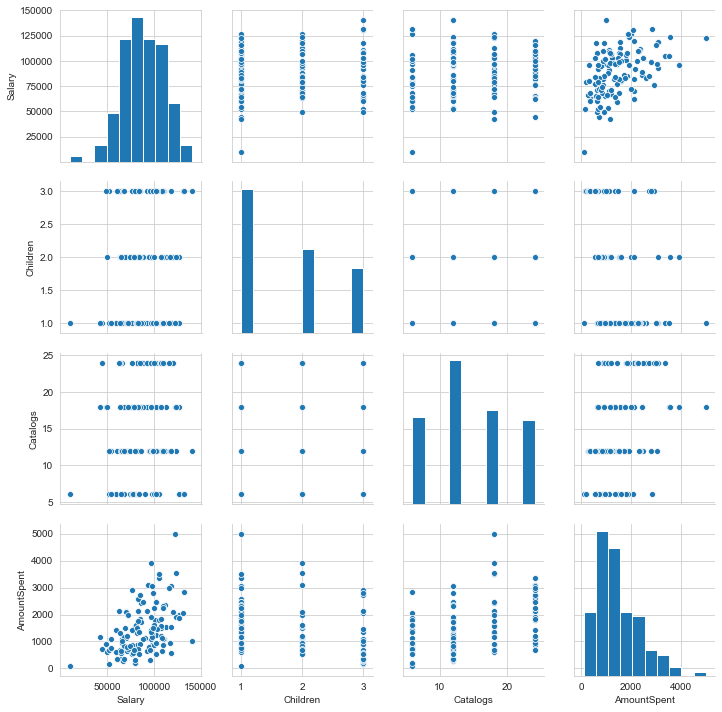

In [60]:
sns.pairplot(df8)

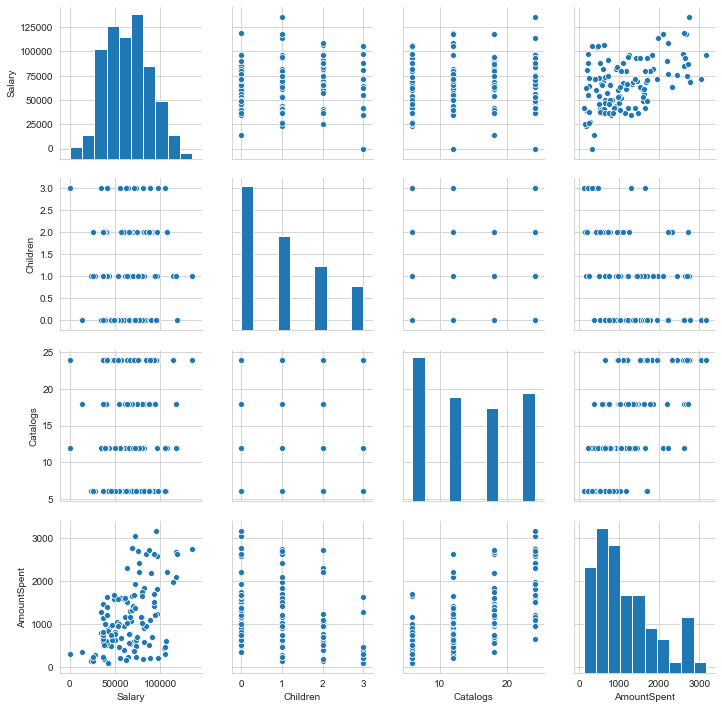

In [165]:
sns.pairplot(df13)

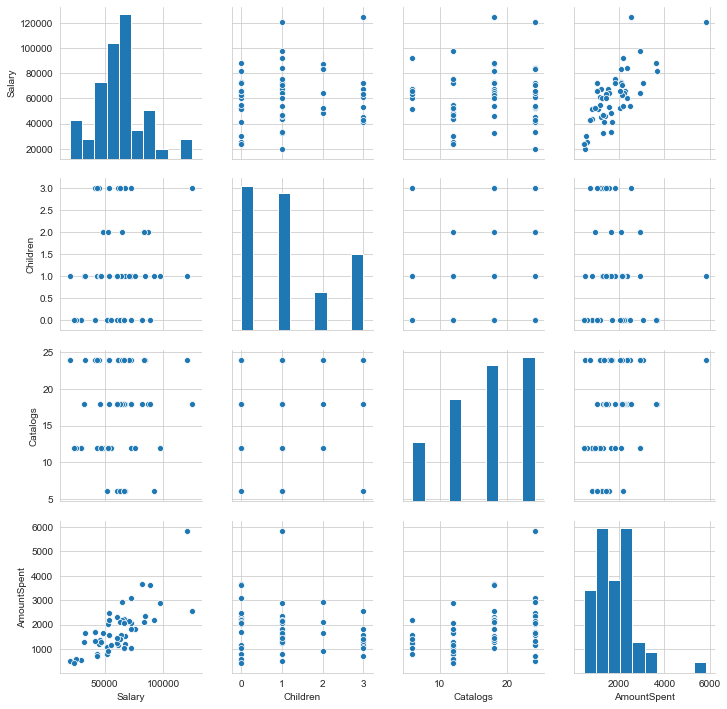

In [166]:
sns.pairplot(df14)

In [167]:
df7.describe()

Salary    Children    Catalogs  AmountSpent
count     233.000000  233.000000  233.000000   233.000000
mean    83724.034335    0.905579   15.244635  1587.896996
std     24722.264624    1.042053    6.398766   883.205104
min     10100.000000    0.000000    6.000000    93.000000
25%     68500.000000    0.000000   12.000000   895.000000
50%     83700.000000    1.000000   12.000000  1481.000000
75%    100100.000000    2.000000   18.000000  2070.000000
max    168800.000000    3.000000   24.000000  4984.000000

In [169]:
df7.describe(include=np.object)

Age Gender OwnHome  Married Location
count      233    233     233      233      233
unique       3      2       1        1        1
top     Middle   Male     Own  Married    Close
freq       161    139     233      233      233

In [168]:
df8.describe()

Salary   Children   Catalogs  AmountSpent
count      92.000000  92.000000  92.000000    92.000000
mean    82307.608696   0.836957  17.543478  2525.989130
std     26648.275757   1.071890   6.048182  1230.226572
min     12600.000000   0.000000   6.000000   164.000000
25%     69500.000000   0.000000  12.000000  1840.000000
50%     81900.000000   0.000000  18.000000  2513.000000
75%    100875.000000   1.000000  24.000000  3087.500000
max    140000.000000   3.000000  24.000000  6217.000000

In [170]:
df8.describe(include=np.object)

Age Gender OwnHome  Married Location
count       92     92      92       92       92
unique       3      2       1        1        1
top     Middle   Male     Own  Married      Far
freq        55     53      92       92       92

In [86]:
df13.describe()

Salary    Children    Catalogs  AmountSpent
count     125.000000  125.000000  125.000000   124.000000
mean    64500.000000    1.024000   14.208000  1145.129032
std     25530.948961    1.058483    7.006099   758.409257
min         0.000000    0.000000    6.000000   105.000000
25%     42000.000000    0.000000    6.000000   579.500000
50%     65800.000000    1.000000   12.000000   978.000000
75%     81400.000000    2.000000   18.000000  1600.500000
max    135700.000000    3.000000   24.000000  3168.000000

In [171]:
df13.describe(include=np.object)

Age  Gender OwnHome  Married Location
count      125     125     125      125      125
unique       3       2       1        1        1
top     Middle  Female    Rent  Married    Close
freq        54      70     125      125      125

In [87]:
df14.describe()

Salary   Children   Catalogs  AmountSpent
count      52.000000  52.000000  52.000000    51.000000
mean    61746.153846   1.115385  16.961538  1781.921569
std     21484.864363   1.114149   6.255857   955.435081
min     20200.000000   0.000000   6.000000   428.000000
25%     48400.000000   0.000000  12.000000  1182.500000
50%     62250.000000   1.000000  18.000000  1639.000000
75%     72200.000000   2.000000  24.000000  2184.000000
max    124800.000000   3.000000  24.000000  5830.000000

In [172]:
df14.describe(include=np.object)

Age Gender OwnHome  Married Location
count       52     52      52       52       52
unique       3      2       1        1        1
top     Middle   Male    Rent  Married      Far
freq        24     30      52       52       52

Dari plot diatas diketahui bahwa jarak/lokasi mempengaruhi cukup signifikan dalam hal pengeluaran seperti transportasi dan sebagainya, selain itu jarak juga berpengaruh pada penghasilan, pada plot diatas yang berjarak dekat memiliki penghasilan lebih besar.

## Single Analysis

In [21]:
df9 = df[(df.Married=='Single')&(df.Location=='Close')&(df.OwnHome=='Rent')]
df10 = df[(df.Married=='Single')&(df.Location=='Far')&(df.OwnHome=='Rent')]
df11 = df[(df.Married=='Single')&(df.Location=='Close')&(df.OwnHome=='Own')]
df12 = df[(df.Married=='Single')&(df.Location=='Far')&(df.OwnHome=='Own')]

In [73]:
df9.describe()

Salary    Children    Catalogs  AmountSpent
count    211.000000  211.000000  211.000000   211.000000
mean   28827.962085    0.924171   13.080569   519.170616
std    15518.564155    1.029995    6.376157   391.992625
min    10200.000000    0.000000    6.000000     0.000000
25%    15450.000000    0.000000    6.000000   229.000000
50%    22600.000000    1.000000   12.000000   400.000000
75%    42250.000000    1.000000   18.000000   708.500000
max    72000.000000    3.000000   24.000000  1910.000000

In [173]:
df9.describe(include=np.object)

Age  Gender OwnHome Married Location
count     211     211     211     211      211
unique      3       2       1       1        1
top     Young  Female    Rent  Single    Close
freq      119     117     211     211      211

In [70]:
df10.describe()

Salary   Children   Catalogs  AmountSpent
count     96.000000  96.000000  96.000000    96.000000
mean   26719.791667   0.916667  14.375000   762.302083
std    15722.431979   0.980512   6.936175   589.527895
min        0.000000   0.000000   6.000000   123.000000
25%    14475.000000   0.000000   6.000000   363.250000
50%    20150.000000   1.000000  12.000000   545.000000
75%    38325.000000   1.250000  18.000000   989.500000
max    67700.000000   3.000000  24.000000  3044.000000

In [174]:
df10.describe(include=np.object)

Age  Gender OwnHome Married Location
count      96      96      96      96       96
unique      3       2       1       1        1
top     Young  Female    Rent  Single      Far
freq       57      57      96      96       96

In [71]:
df11.describe()

Salary    Children    Catalogs  AmountSpent
count    141.000000  141.000000  141.000000   140.000000
mean   46440.425532    0.907801   13.829787   918.592857
std    16226.759111    1.101303    6.411995   589.104208
min    11400.000000    0.000000    6.000000    65.000000
25%    33400.000000    0.000000    6.000000   486.750000
50%    47900.000000    0.000000   12.000000   828.000000
75%    59700.000000    2.000000   18.000000  1299.500000
max    82800.000000    3.000000   24.000000  3278.000000

In [175]:
df11.describe(include=np.object)

Age  Gender OwnHome Married Location
count      141     141     141     141      141
unique       3       2       1       1        1
top     Middle  Female     Own  Single    Close
freq        80      77     141     141      141

In [72]:
df12.describe()

Salary   Children   Catalogs  AmountSpent
count     50.000  50.000000  50.000000    49.000000
mean   47348.000   0.980000  15.360000  1312.346939
std    17256.649   1.078359   6.766544   802.518654
min    16300.000   0.000000   6.000000   317.000000
25%    32175.000   0.000000  12.000000   768.000000
50%    48900.000   1.000000  15.000000  1085.000000
75%    61225.000   2.000000  24.000000  1702.000000
max    80800.000   3.000000  24.000000  4182.000000

In [176]:
df12.describe(include=np.object)

Age  Gender OwnHome Married Location
count       50      50      50      50       50
unique       3       2       1       1        1
top     Middle  Female     Own  Single      Far
freq        29      30      50      50       50

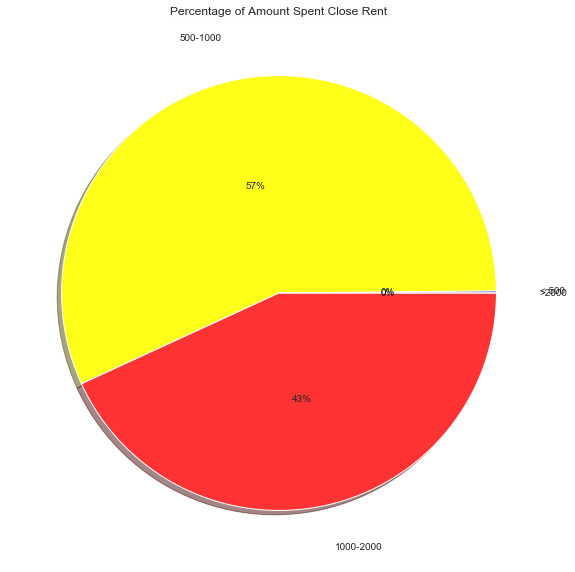

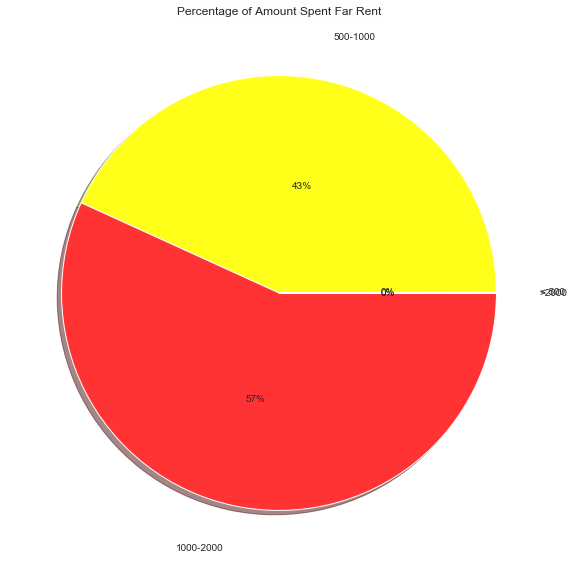

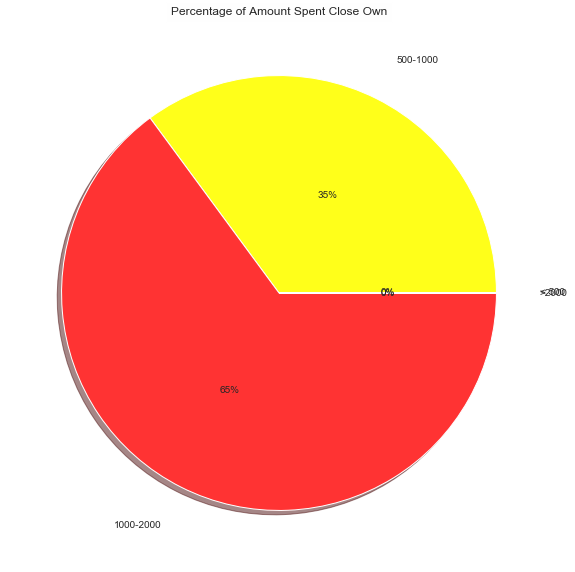

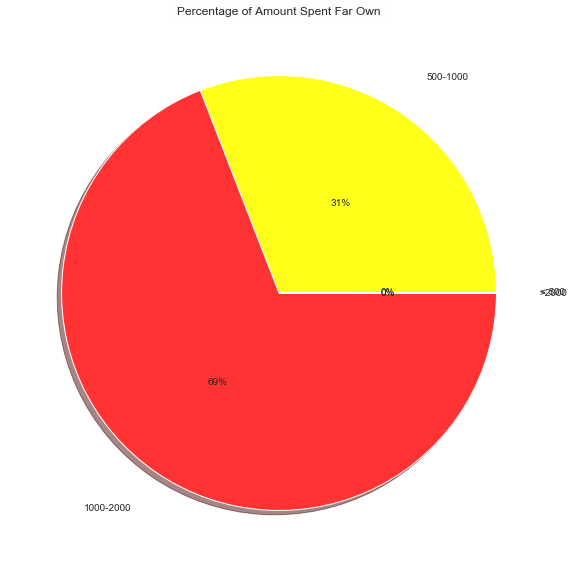

In [74]:
slices=[(df9.AmountSpent<=500).sum(),
        df9['AmountSpent'][(df9.AmountSpent>500) & (df9.AmountSpent<1000)].sum(),
        df9['AmountSpent'][(df9.AmountSpent>1000) & (df9.AmountSpent<2000)].sum(),
        (df9.AmountSpent>2000).sum(),]
labels=['< 500','500-1000','1000-2000','>2000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Amount Spent Close Rent", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

slices=[(df10.AmountSpent<500).sum(),
        df10['AmountSpent'][(df10.AmountSpent>500) & (df10.AmountSpent<1000)].sum(),
        df10['AmountSpent'][(df10.AmountSpent>1000) & (df10.AmountSpent<2000)].sum(),
        (df10.AmountSpent>2000).sum(),]
labels=['< 500','500-1000','1000-2000','>2000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Amount Spent Far Rent", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

slices=[(df11.AmountSpent<500).sum(),
        df11['AmountSpent'][(df11.AmountSpent>500) & (df11.AmountSpent<1000)].sum(),
        df11['AmountSpent'][(df11.AmountSpent>1000) & (df11.AmountSpent<2000)].sum(),
        (df11.AmountSpent>2000).sum(),]
labels=['< 500','500-1000','1000-2000','>2000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Amount Spent Close Own", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

slices=[(df12.AmountSpent<500).sum(),
        df12['AmountSpent'][(df12.AmountSpent>500) & (df12.AmountSpent<1000)].sum(),
        df12['AmountSpent'][(df12.AmountSpent>1000) & (df12.AmountSpent<2000)].sum(),
        (df12.AmountSpent>2000).sum(),]
labels=['< 500','500-1000','1000-2000','>2000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Amount Spent Far Own", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

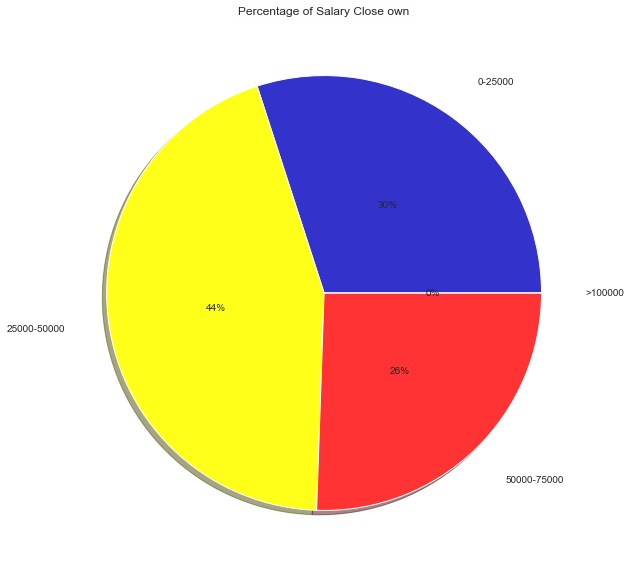

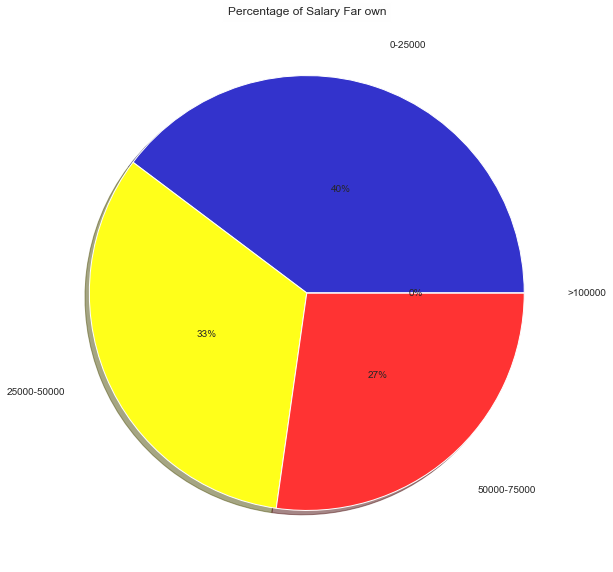

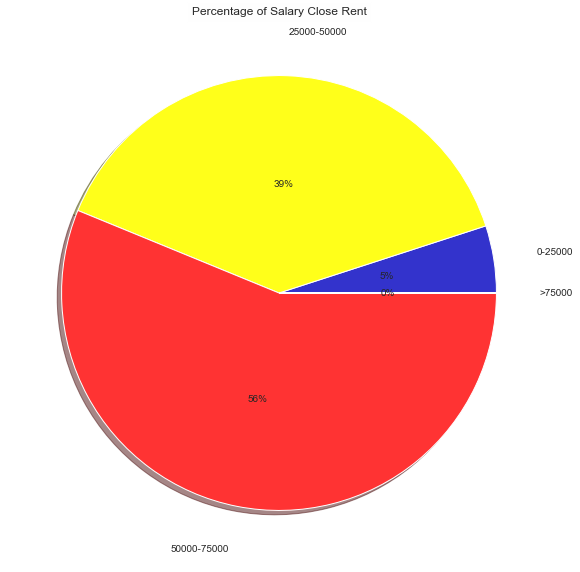

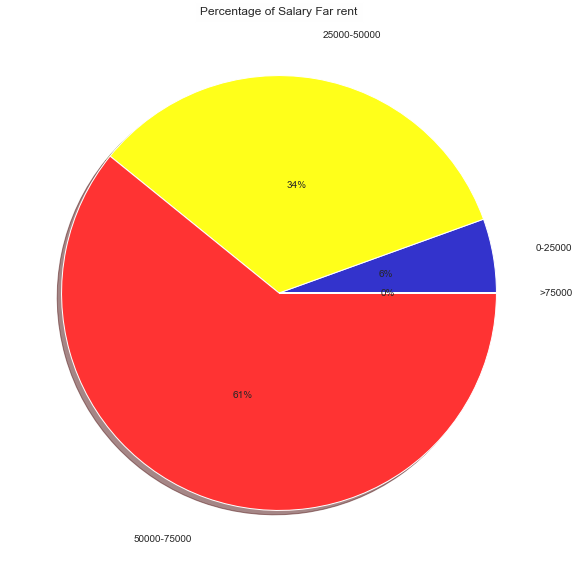

In [22]:
slices=[df9['Salary'][(df9.Salary>=0) & (df9.Salary<25000)].sum(),
        df9['Salary'][(df9.Salary>25000) & (df9.Salary<50000)].sum(),
        df9['Salary'][(df9.Salary>50000) & (df9.Salary<75000)].sum(),
        (df9.Salary>75000).sum(),]
labels=['0-25000','25000-50000','50000-75000','>100000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Salary Close own", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

slices=[df10['Salary'][(df10.Salary>=0) & (df10.Salary<25000)].sum(),
        df10['Salary'][(df10.Salary>25000) & (df10.Salary<50000)].sum(),
        df10['Salary'][(df10.Salary>50000) & (df10.Salary<75000)].sum(),
        (df10.Salary>75000).sum(),]
labels=['0-25000','25000-50000','50000-75000','>100000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Salary Far own", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

slices=[df11['Salary'][(df11.Salary>=0) & (df11.Salary<25000)].sum(),
        df11['Salary'][(df11.Salary>25000) & (df11.Salary<50000)].sum(),
        df11['Salary'][(df11.Salary>50000) & (df11.Salary<75000)].sum(),
        (df11.Salary>75000).sum(),]
labels=['0-25000','25000-50000','50000-75000','>75000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Salary Close Rent", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

slices=[df12['Salary'][(df12.Salary>=0) & (df12.Salary<25000)].sum(),
        df12['Salary'][(df12.Salary>25000) & (df12.Salary<50000)].sum(),
        df12['Salary'][(df12.Salary>50000) & (df12.Salary<75000)].sum(),
        (df12.Salary>75000).sum(),]
labels=['0-25000','25000-50000','50000-75000','>75000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Salary Far rent", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

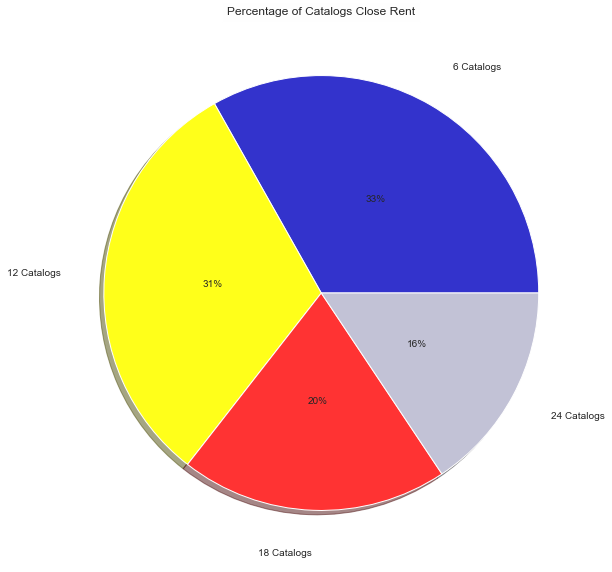

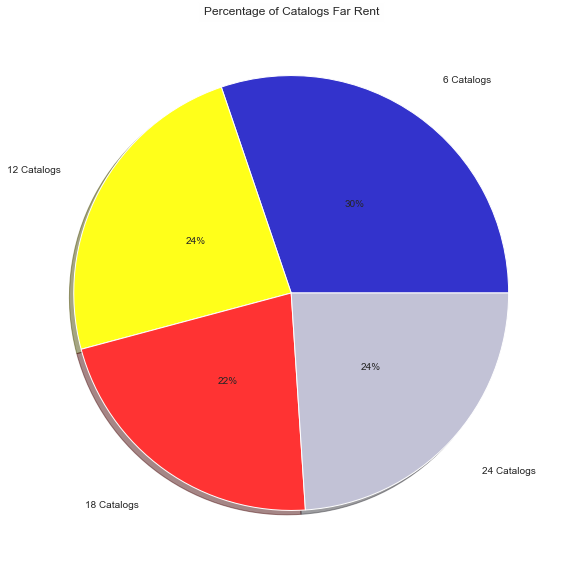

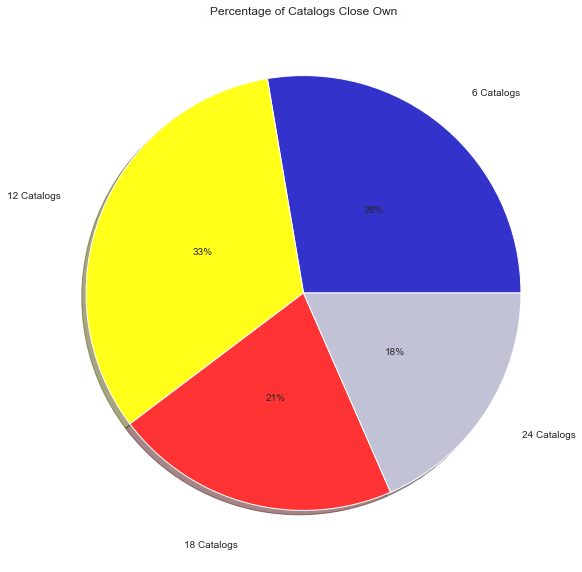

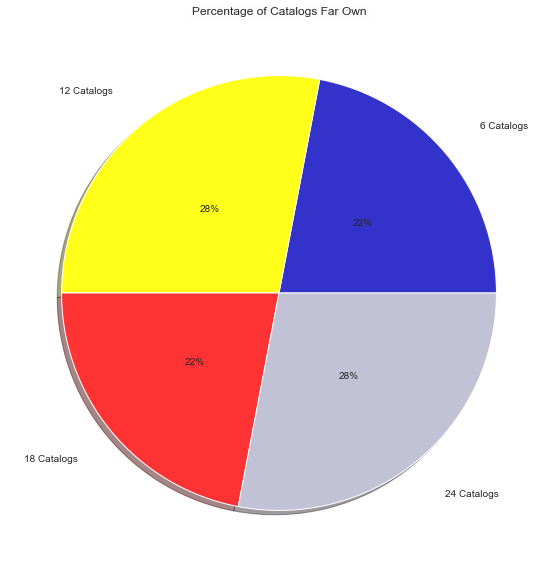

In [81]:
slices=[(df9.Catalogs==6).sum(),
        (df9.Catalogs==12).sum(),
        (df9.Catalogs==18).sum(),
        (df9.Catalogs==24).sum(),]
labels=['6 Catalogs','12 Catalogs','18 Catalogs','24 Catalogs']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Catalogs Close Rent", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

slices=[(df10.Catalogs==6).sum(),
        (df10.Catalogs==12).sum(),
        (df10.Catalogs==18).sum(),
        (df10.Catalogs==24).sum(),]
labels=['6 Catalogs','12 Catalogs','18 Catalogs','24 Catalogs']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Catalogs Far Rent", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

slices=[(df11.Catalogs==6).sum(),
        (df11.Catalogs==12).sum(),
        (df11.Catalogs==18).sum(),
        (df11.Catalogs==24).sum(),]
labels=['6 Catalogs','12 Catalogs','18 Catalogs','24 Catalogs']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Catalogs Close Own", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

slices=[(df12.Catalogs==6).sum(),
        (df12.Catalogs==12).sum(),
        (df12.Catalogs==18).sum(),
        (df12.Catalogs==24).sum(),]
labels=['6 Catalogs','12 Catalogs','18 Catalogs','24 Catalogs']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Catalogs Far Own", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

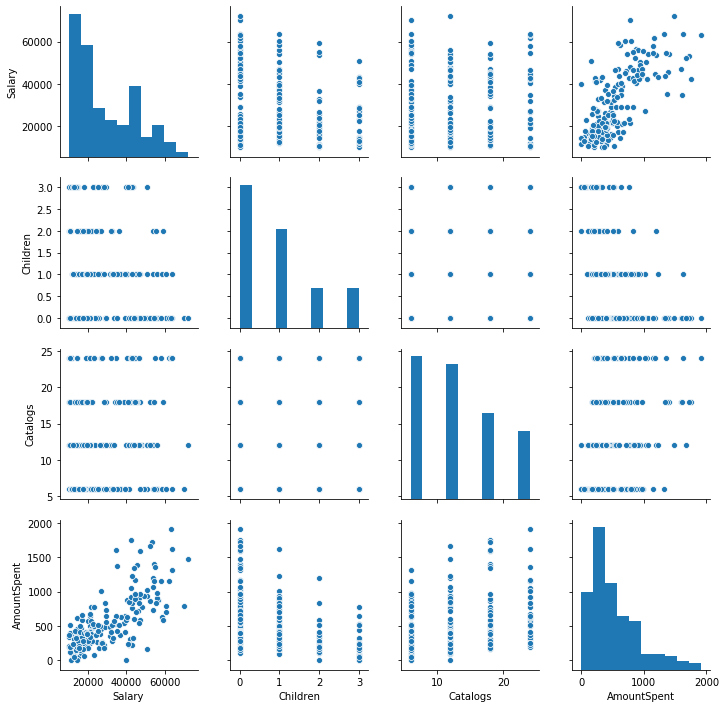

In [68]:
sns.pairplot(df9)

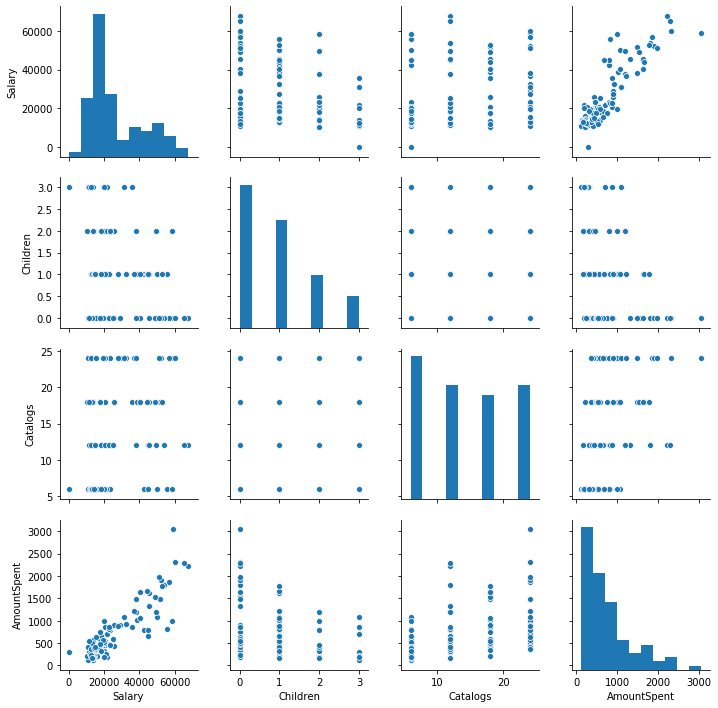

In [77]:
sns.pairplot(df10)

C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


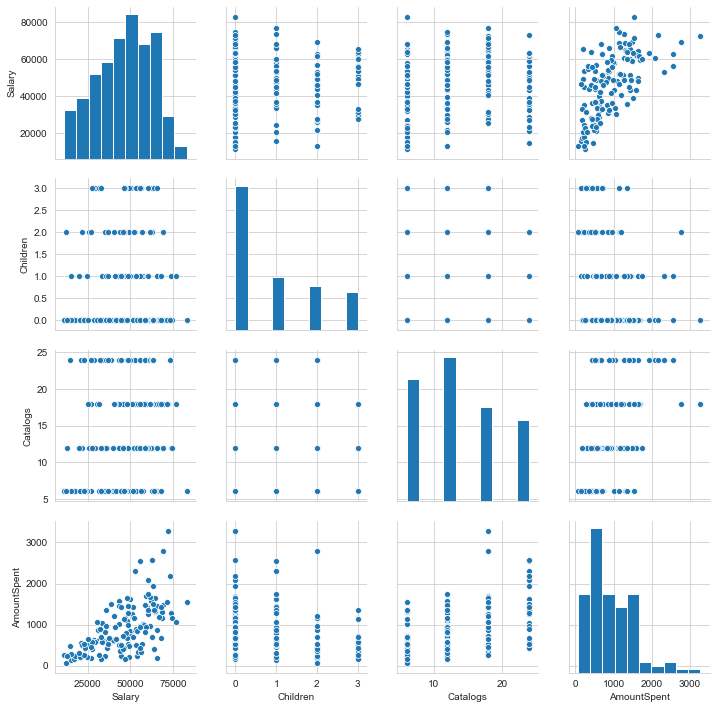

In [89]:
sns.pairplot(df11)

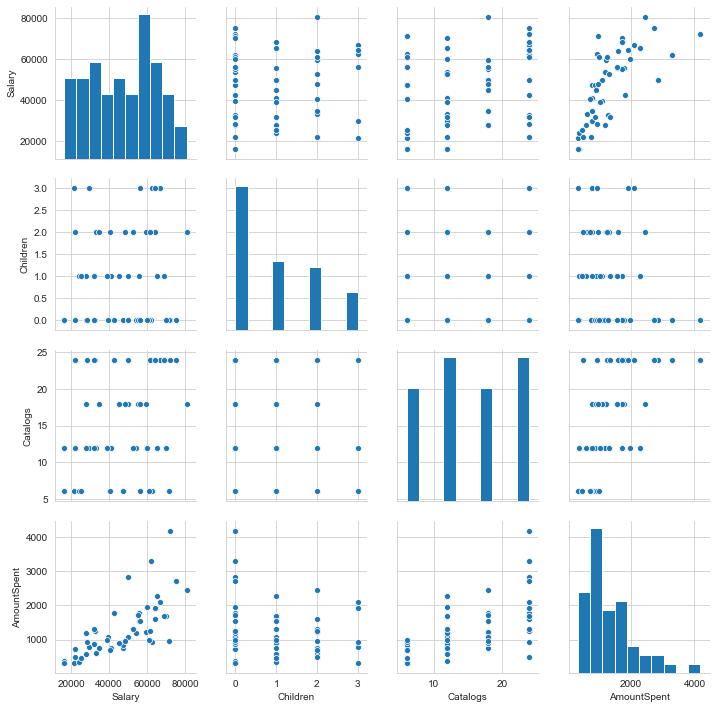

In [90]:
sns.pairplot(df12)

Seperti yang saya duga bahwa jarak sangat mempengaruhi pengeluaran untuk transport, dsb ditambah lagi mereka harus membayar uang sewa rumah mereka apalagi mereka belum menikah. 

Dari data tersebut saya mulai menyadari bahwa data tersebut terdapat variable yang menjelaskan berapa jumlah anak dan beberapa dari subjek tidak memiliki anak serta subjek berstatus single namun memiliki anak yang menurut saya mempengaruhi pendapatan dan pengeluaran. Apalagi dalam data tersebut tidak diketahui apakah anak tersebut masuk dalam kategori usia anak-anak atau produktif. Oleh karena itu saya mengelompokkan data berdasarkan yang memiliki anak dan tidak memiliki anak untuk mengetahui seberapa besar pengaruhnya terhadap pemasukan dan pengeluaran. 

## No Children analysis based on married status

In [24]:
df15 = df[(df.Married=='Married')&(df.Location=='Close')&(df.OwnHome=='Own')&(df.Children==0)]
df16 = df[(df.Married=='Married')&(df.Location=='Far')&(df.OwnHome=='Own')&(df.Children==0)]
df17 = df[(df.Married=='Married')&(df.Location=='Close')&(df.OwnHome=='Rent')&(df.Children==0)]
df18 = df[(df.Married=='Married')&(df.Location=='Far')&(df.OwnHome=='Rent')&(df.Children==0)]

In [92]:
df15.describe()

Salary  Children    Catalogs  AmountSpent
count     111.000000     111.0  111.000000   111.000000
mean    79135.135135       0.0   16.000000  1764.099099
std     26485.778855       0.0    6.489152   843.143954
min     21500.000000       0.0    6.000000   348.000000
25%     62700.000000       0.0   12.000000  1217.500000
50%     81200.000000       0.0   18.000000  1607.000000
75%     97000.000000       0.0   24.000000  2149.500000
max    168800.000000       0.0   24.000000  4558.000000

In [177]:
df15.describe(include=np.object)

Age Gender OwnHome Married Location
count    73     73      73      73       73
unique    3      2       1       1        1
top     Old   Male     Own  Single    Close
freq     37     38      73      73       73

In [93]:
df16.describe()

Salary  Children   Catalogs  AmountSpent
count      49.000000      49.0  49.000000    49.000000
mean    76038.775510       0.0  17.510204  2660.918367
std     28273.786566       0.0   6.103696  1321.684103
min     15400.000000       0.0   6.000000   297.000000
25%     59700.000000       0.0  12.000000  1893.000000
50%     75500.000000       0.0  18.000000  2595.000000
75%     89500.000000       0.0  24.000000  3126.000000
max    140000.000000       0.0  24.000000  6217.000000

In [178]:
df16.describe(include=np.object)

Age  Gender OwnHome Married Location
count       23      23      23      23       23
unique       3       2       1       1        1
top     Middle  Female     Own  Single      Far
freq        11      12      23      23       23

In [94]:
df17.describe()

Salary  Children   Catalogs  AmountSpent
count      52.000000      52.0  52.000000    52.000000
mean    58365.384615       0.0  15.000000  1357.576923
std     20073.774566       0.0   7.079382   727.733531
min     13800.000000       0.0   6.000000   363.000000
25%     41650.000000       0.0   6.000000   775.250000
50%     54800.000000       0.0  12.000000  1168.000000
75%     71125.000000       0.0  24.000000  1664.750000
max    118800.000000       0.0  24.000000  3168.000000

In [179]:
df17.describe(include=np.object)

Age Gender OwnHome Married Location
count      94     94      94      94       94
unique      3      2       1       1        1
top     Young   Male    Rent  Single    Close
freq       42     62      94      94       94

In [95]:
df18.describe()

Salary  Children   Catalogs  AmountSpent
count     19.000000      19.0  19.000000    19.000000
mean   57200.000000       0.0  16.736842  1852.052632
std    17638.342074       0.0   5.857968   980.301511
min    23800.000000       0.0   6.000000   428.000000
25%    51750.000000       0.0  12.000000  1053.000000
50%    60200.000000       0.0  18.000000  2057.000000
75%    66250.000000       0.0  21.000000  2285.500000
max    88400.000000       0.0  24.000000  3655.000000

In [180]:
df18.describe(include=np.object)

Age Gender OwnHome Married Location
count      41     41      41      41       41
unique      3      2       1       1        1
top     Young   Male    Rent  Single      Far
freq       19     23      41      41       41

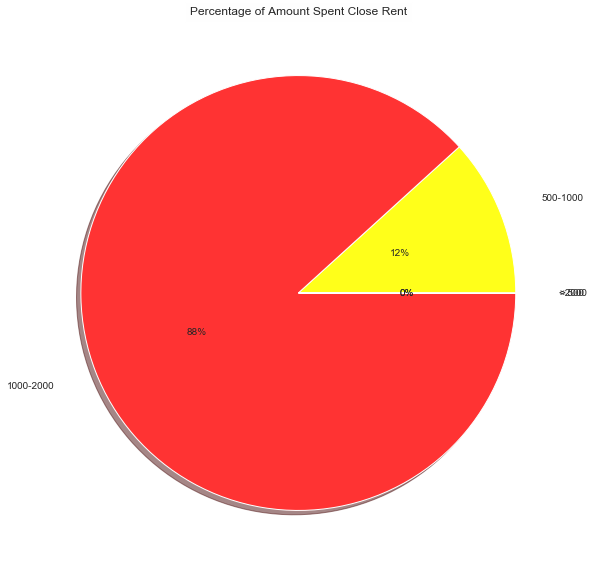

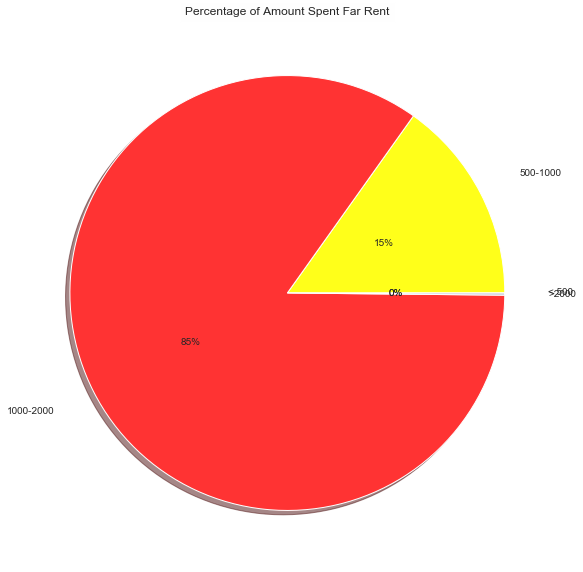

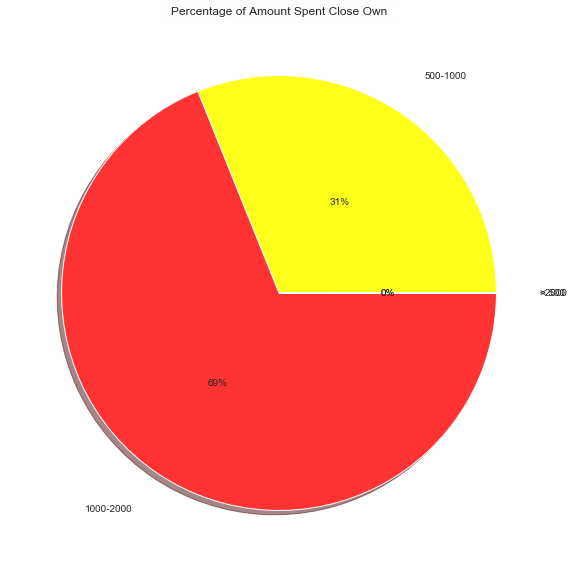

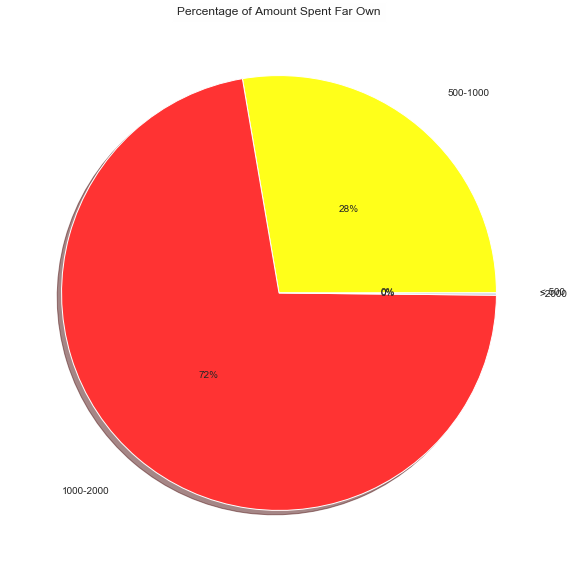

In [96]:
slices=[(df15.AmountSpent<500).sum(),
        df15['AmountSpent'][(df15.AmountSpent>500) & (df15.AmountSpent<1000)].sum(),
        df15['AmountSpent'][(df15.AmountSpent>1000) & (df15.AmountSpent<2000)].sum(),
        (df15.AmountSpent>2000).sum(),]
labels=['< 500','500-1000','1000-2000','>2000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Amount Spent Close Rent", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

slices=[(df16.AmountSpent<500).sum(),
        df16['AmountSpent'][(df16.AmountSpent>500) & (df16.AmountSpent<1000)].sum(),
        df16['AmountSpent'][(df16.AmountSpent>1000) & (df16.AmountSpent<2000)].sum(),
        (df16.AmountSpent>2000).sum(),]
labels=['< 500','500-1000','1000-2000','>2000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Amount Spent Far Rent", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

slices=[(df17.AmountSpent<500).sum(),
        df17['AmountSpent'][(df17.AmountSpent>500) & (df17.AmountSpent<1000)].sum(),
        df17['AmountSpent'][(df17.AmountSpent>1000) & (df17.AmountSpent<2000)].sum(),
        (df17.AmountSpent>2000).sum(),]
labels=['< 500','500-1000','1000-2000','>2000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Amount Spent Close Own", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

slices=[(df18.AmountSpent<500).sum(),
        df18['AmountSpent'][(df18.AmountSpent>500) & (df18.AmountSpent<1000)].sum(),
        df18['AmountSpent'][(df18.AmountSpent>1000) & (df18.AmountSpent<2000)].sum(),
        (df18.AmountSpent>2000).sum(),]
labels=['< 500','500-1000','1000-2000','>2000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Amount Spent Far Own", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

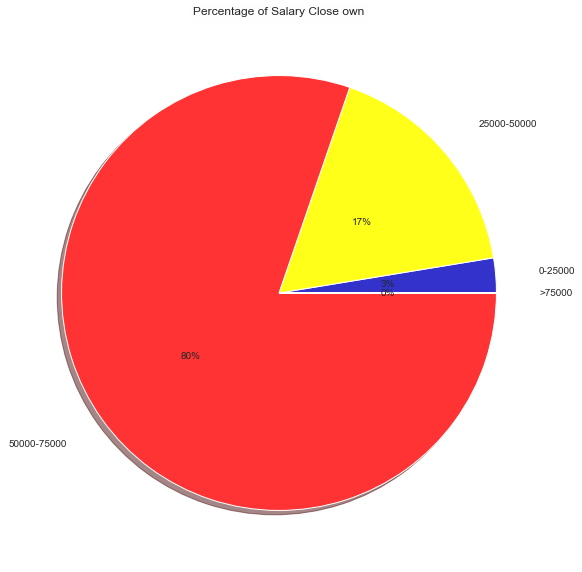

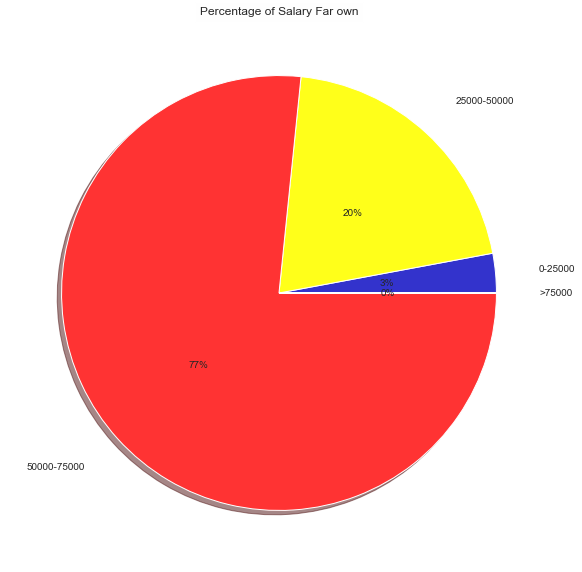

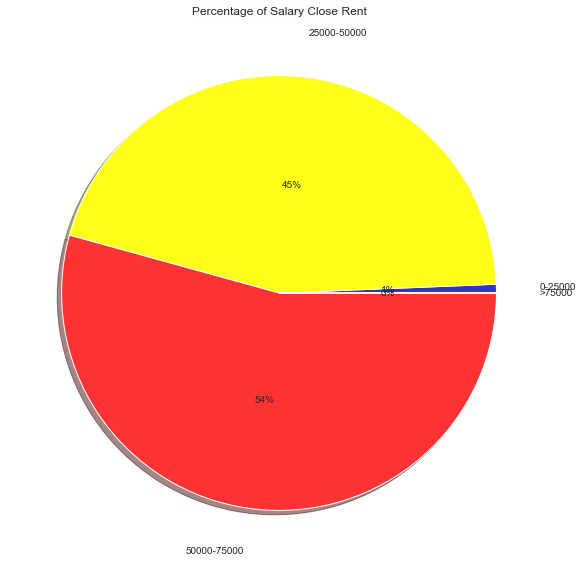

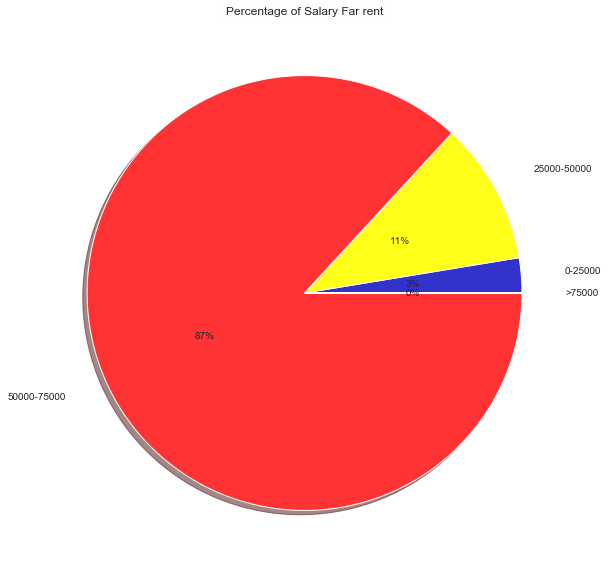

In [25]:
slices=[df15['Salary'][(df15.Salary>=0) & (df15.Salary<25000)].sum(),
        df15['Salary'][(df15.Salary>25000) & (df15.Salary<50000)].sum(),
        df15['Salary'][(df15.Salary>50000) & (df15.Salary<75000)].sum(),
        (df15.Salary>75000).sum(),]
labels=['0-25000','25000-50000','50000-75000','>75000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Salary Close own", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

slices=[df16['Salary'][(df16.Salary>=0) & (df16.Salary<25000)].sum(),
        df16['Salary'][(df16.Salary>25000) & (df16.Salary<50000)].sum(),
        df16['Salary'][(df16.Salary>50000) & (df16.Salary<75000)].sum(),
        (df16.Salary>75000).sum(),]
labels=['0-25000','25000-50000','50000-75000','>75000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Salary Far own", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

slices=[df17['Salary'][(df17.Salary>=0) & (df17.Salary<25000)].sum(),
        df17['Salary'][(df17.Salary>25000) & (df17.Salary<50000)].sum(),
        df17['Salary'][(df17.Salary>50000) & (df17.Salary<75000)].sum(),
        (df17.Salary>75000).sum(),]
labels=['0-25000','25000-50000','50000-75000','>75000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Salary Close Rent", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

slices=[df18['Salary'][(df18.Salary>=0) & (df18.Salary<25000)].sum(),
        df18['Salary'][(df18.Salary>25000) & (df18.Salary<50000)].sum(),
        df18['Salary'][(df18.Salary>50000) & (df18.Salary<75000)].sum(),
        (df18.Salary>75000).sum(),]
labels=['0-25000','25000-50000','50000-75000','>75000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Salary Far rent", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

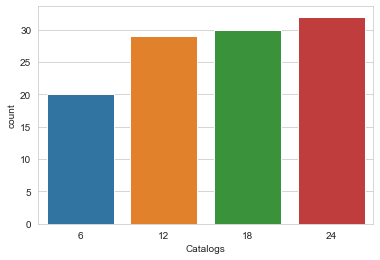

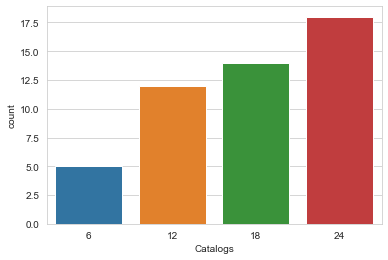

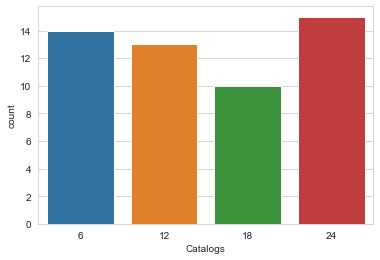

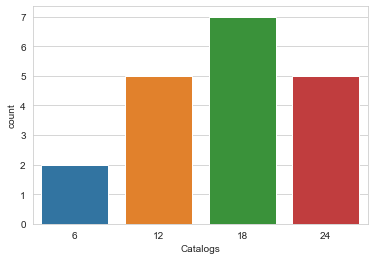

In [99]:
sns.countplot(data=df15, x='Catalogs')
plt.show()

sns.countplot(data=df16, x='Catalogs')
plt.show()

sns.countplot(data=df17, x='Catalogs')
plt.show()

sns.countplot(data=df18, x='Catalogs')
plt.show()


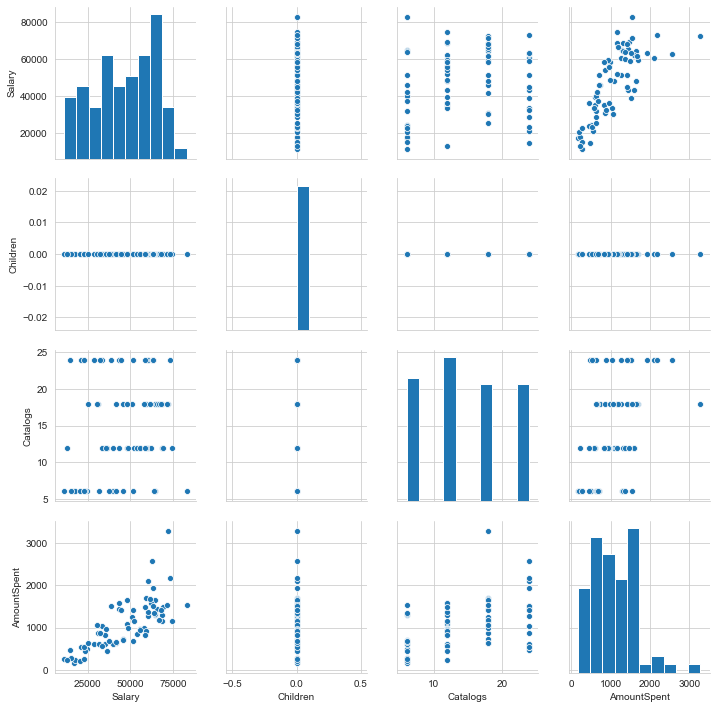

In [151]:
sns.pairplot(df15)

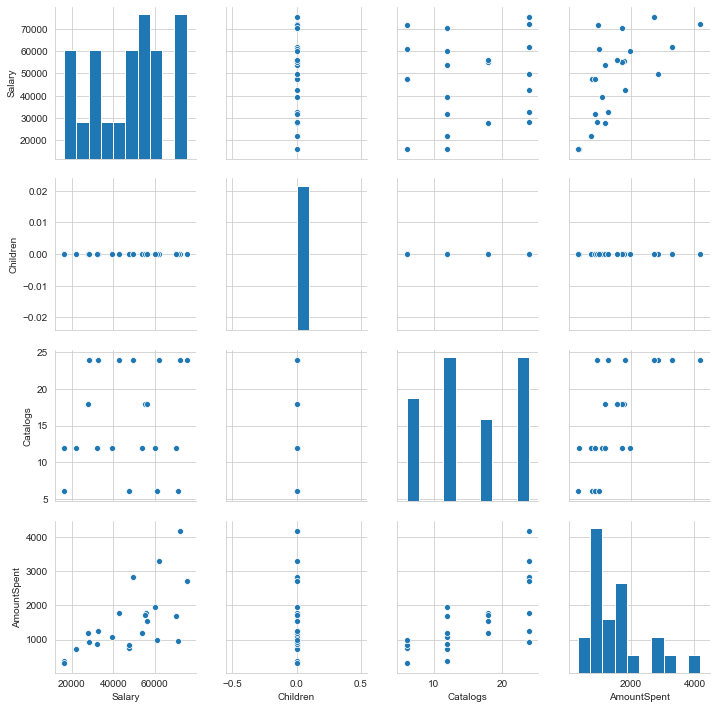

In [152]:
sns.pairplot(df16)

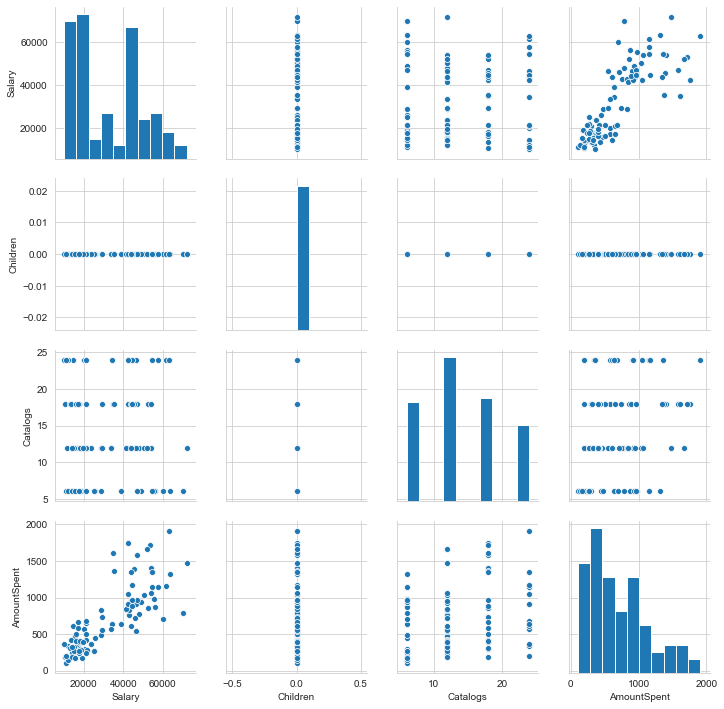

In [153]:
sns.pairplot(df17)

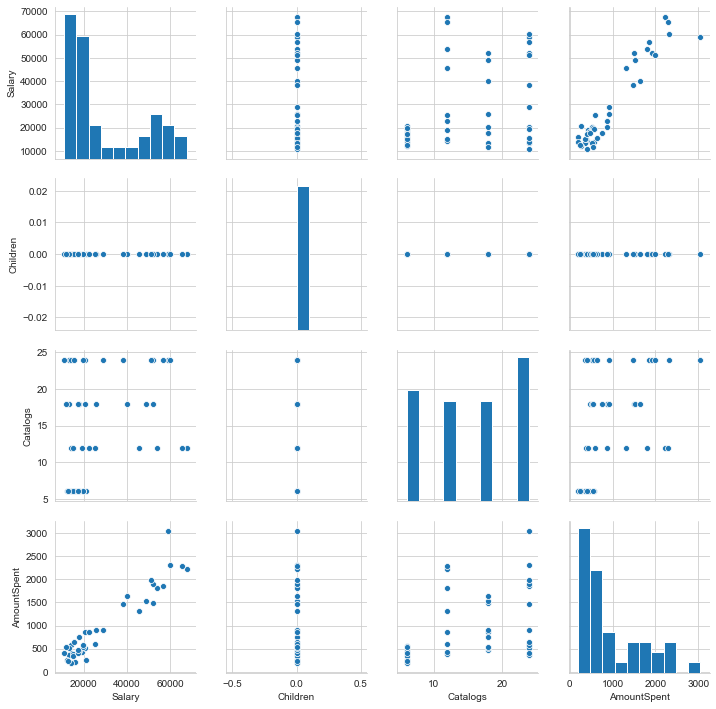

In [154]:
sns.pairplot(df18)

Pada data tersebut kepemilikan tempat tinggal memiliki pengaruh yang cukup besar bagi pengeluaran mereka yang telah menikah namun belum punya anak. Dalam penghasilan yang berjarak dekat dan memiliki rumah sendiri memiliki penghasilan lebih tinggi mungkin dikarenakan mereka tidak memiliki tanggungan seperti anak, tempat tinggal serta jarak yang dekat dengan retail marketnya sehingga mereka lebih leluasa dalam mengembangkan usahanya 

## No Children analysis based on single status

In [102]:
df19 = df[(df.Married=='Single')&(df.Location=='Close')&(df.OwnHome=='Own')&(df.Children==0)]
df20 = df[(df.Married=='Single')&(df.Location=='Far')&(df.OwnHome=='Own')&(df.Children==0)]
df21 = df[(df.Married=='Single')&(df.Location=='Close')&(df.OwnHome=='Rent')&(df.Children==0)]
df22 = df[(df.Married=='Single')&(df.Location=='Far')&(df.OwnHome=='Rent')&(df.Children==0)]

In [103]:
df19.describe()

Salary  Children   Catalogs  AmountSpent
count     73.000000      73.0  73.000000    73.000000
mean   46772.602740       0.0  14.712329  1068.068493
std    17982.987796       0.0   6.636347   577.218434
min    11400.000000       0.0   6.000000   166.000000
25%    33200.000000       0.0  12.000000   621.000000
50%    48100.000000       0.0  12.000000   992.000000
75%    62200.000000       0.0  18.000000  1443.000000
max    82800.000000       0.0  24.000000  3278.000000

In [181]:
df19.describe(include=np.object)

Age Gender OwnHome Married Location
count    73     73      73      73       73
unique    3      2       1       1        1
top     Old   Male     Own  Single    Close
freq     37     38      73      73       73

In [104]:
df20.describe()

Salary  Children   Catalogs  AmountSpent
count     23.000000      23.0  23.000000    23.000000
mean   47643.478261       0.0  15.391304  1521.260870
std    18069.558180       0.0   6.965755   957.071491
min    16300.000000       0.0   6.000000   317.000000
25%    32300.000000       0.0  12.000000   896.500000
50%    49700.000000       0.0  12.000000  1186.000000
75%    60600.000000       0.0  24.000000  1788.000000
max    75400.000000       0.0  24.000000  4182.000000

In [182]:
df20.describe(include=np.object)

Age  Gender OwnHome Married Location
count       23      23      23      23       23
unique       3       2       1       1        1
top     Middle  Female     Own  Single      Far
freq        11      12      23      23       23

In [105]:
df21.describe()

Salary  Children   Catalogs  AmountSpent
count     94.000000      94.0  94.000000    94.000000
mean   32340.425532       0.0  14.234043   701.223404
std    17000.653492       0.0   6.220717   439.299152
min    10200.000000       0.0   6.000000   106.000000
25%    17325.000000       0.0  12.000000   329.000000
50%    28950.000000       0.0  12.000000   610.500000
75%    45825.000000       0.0  18.000000   946.000000
max    72000.000000       0.0  24.000000  1910.000000

In [183]:
df21.describe(include=np.object)

Age Gender OwnHome Married Location
count      94     94      94      94       94
unique      3      2       1       1        1
top     Young   Male    Rent  Single    Close
freq       42     62      94      94       94

In [106]:
df22.describe()

Salary  Children   Catalogs  AmountSpent
count     41.000000      41.0  41.000000    41.000000
mean   28785.365854       0.0  15.658537   951.512195
std    17890.270554       0.0   7.083819   731.490401
min    10900.000000       0.0   6.000000   191.000000
25%    15100.000000       0.0  12.000000   411.000000
50%    19700.000000       0.0  18.000000   571.000000
75%    45600.000000       0.0  24.000000  1492.000000
max    67700.000000       0.0  24.000000  3044.000000

In [184]:
df22.describe(include=np.object)

Age Gender OwnHome Married Location
count      41     41      41      41       41
unique      3      2       1       1        1
top     Young   Male    Rent  Single      Far
freq       19     23      41      41       41

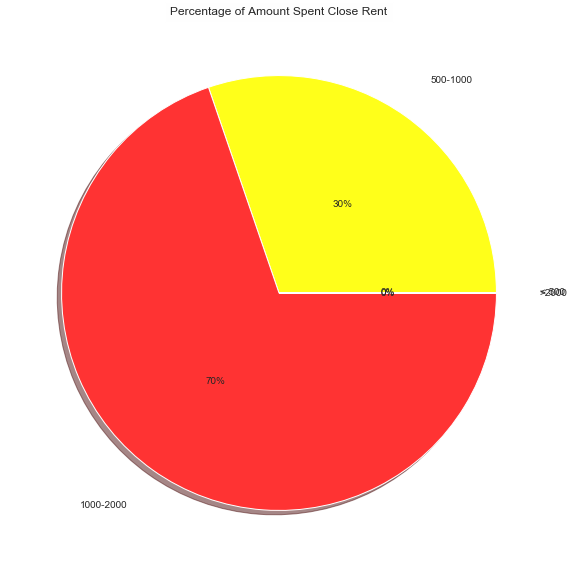

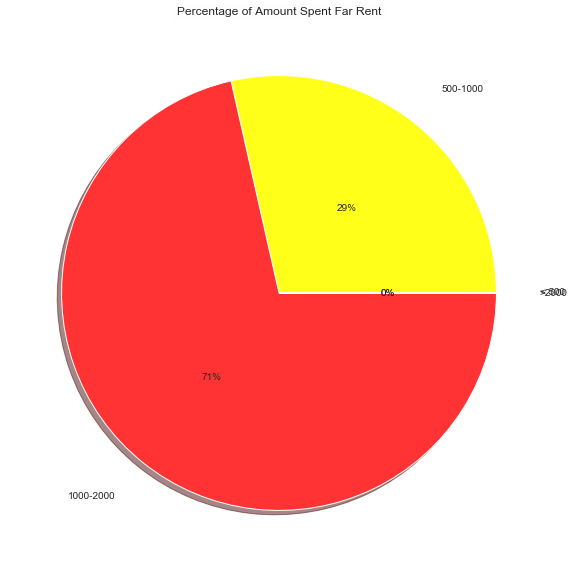

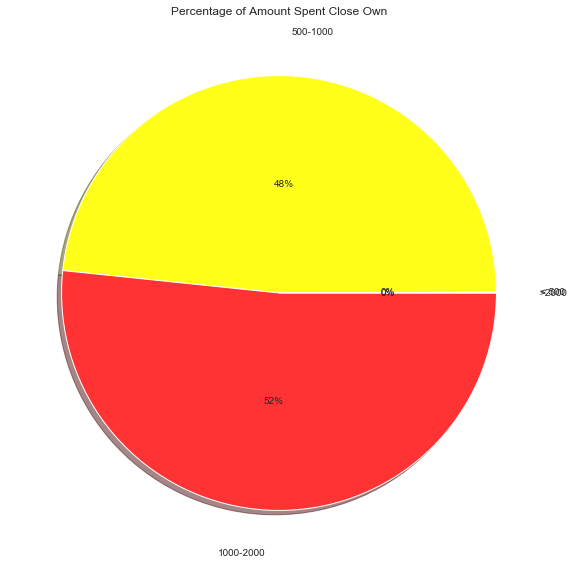

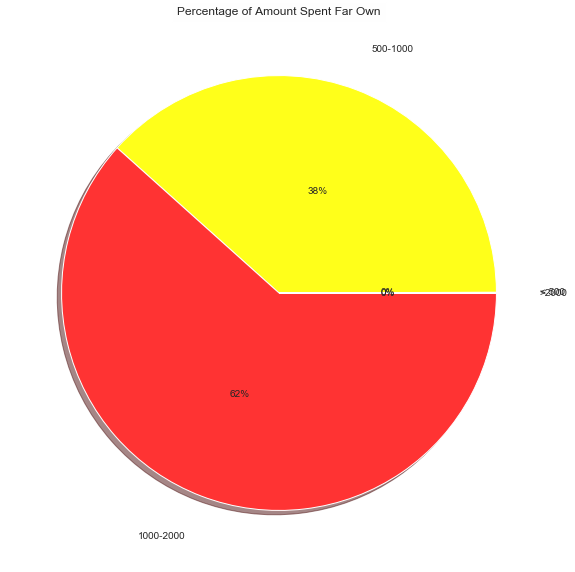

In [107]:
slices=[(df19.AmountSpent<500).sum(),
        df19['AmountSpent'][(df19.AmountSpent>500) & (df19.AmountSpent<1000)].sum(),
        df19['AmountSpent'][(df19.AmountSpent>1000) & (df19.AmountSpent<2000)].sum(),
        (df19.AmountSpent>2000).sum(),]
labels=['< 500','500-1000','1000-2000','>2000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Amount Spent Close Rent", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

slices=[(df20.AmountSpent<500).sum(),
        df20['AmountSpent'][(df20.AmountSpent>500) & (df20.AmountSpent<1000)].sum(),
        df20['AmountSpent'][(df20.AmountSpent>1000) & (df20.AmountSpent<2000)].sum(),
        (df20.AmountSpent>2000).sum(),]
labels=['< 500','500-1000','1000-2000','>2000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Amount Spent Far Rent", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

slices=[(df21.AmountSpent<500).sum(),
        df21['AmountSpent'][(df21.AmountSpent>500) & (df21.AmountSpent<1000)].sum(),
        df21['AmountSpent'][(df21.AmountSpent>1000) & (df21.AmountSpent<2000)].sum(),
        (df21.AmountSpent>2000).sum(),]
labels=['< 500','500-1000','1000-2000','>2000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Amount Spent Close Own", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

slices=[(df22.AmountSpent<500).sum(),
        df22['AmountSpent'][(df22.AmountSpent>500) & (df22.AmountSpent<1000)].sum(),
        df22['AmountSpent'][(df22.AmountSpent>1000) & (df22.AmountSpent<2000)].sum(),
        (df22.AmountSpent>2000).sum(),]
labels=['< 500','500-1000','1000-2000','>2000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Amount Spent Far Own", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

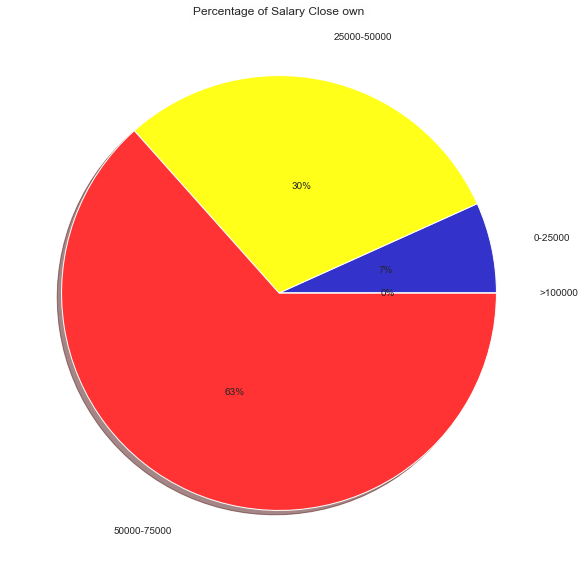

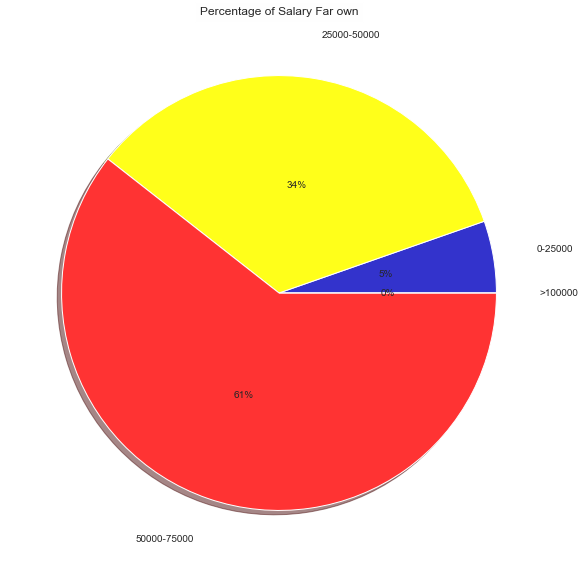

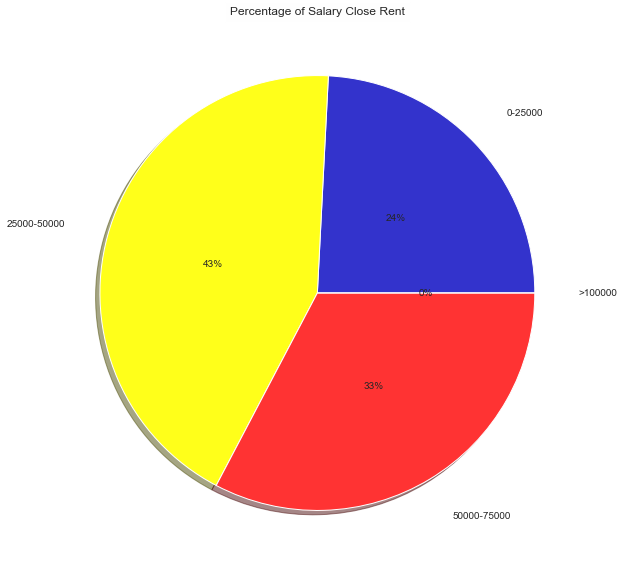

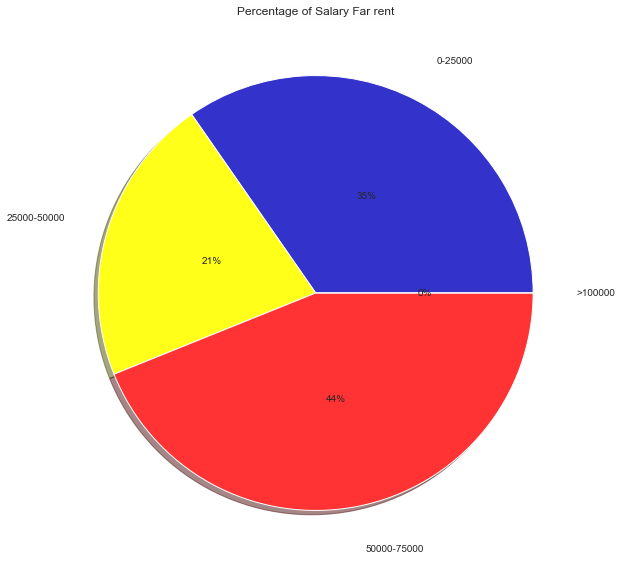

In [108]:
slices=[df19['Salary'][(df19.Salary>=0) & (df19.Salary<25000)].sum(),
        df19['Salary'][(df19.Salary>25000) & (df19.Salary<50000)].sum(),
        df19['Salary'][(df19.Salary>50000) & (df19.Salary<75000)].sum(),
        (df19.Salary>100000).sum(),]
labels=['0-25000','25000-50000','50000-75000','>100000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Salary Close own", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

slices=[df20['Salary'][(df20.Salary>=0) & (df20.Salary<25000)].sum(),
        df20['Salary'][(df20.Salary>25000) & (df20.Salary<50000)].sum(),
        df20['Salary'][(df20.Salary>50000) & (df20.Salary<75000)].sum(),
        (df20.Salary>100000).sum(),]
labels=['0-25000','25000-50000','50000-75000','>100000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Salary Far own", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

slices=[df21['Salary'][(df21.Salary>=0) & (df21.Salary<25000)].sum(),
        df21['Salary'][(df21.Salary>25000) & (df21.Salary<50000)].sum(),
        df21['Salary'][(df21.Salary>50000) & (df21.Salary<75000)].sum(),
        (df21.Salary>100000).sum(),]
labels=['0-25000','25000-50000','50000-75000','>100000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Salary Close Rent", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

slices=[df22['Salary'][(df22.Salary>=0) & (df22.Salary<25000)].sum(),
        df22['Salary'][(df22.Salary>25000) & (df22.Salary<50000)].sum(),
        df22['Salary'][(df22.Salary>50000) & (df22.Salary<75000)].sum(),
        (df22.Salary>100000).sum(),]
labels=['0-25000','25000-50000','50000-75000','>100000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Salary Far rent", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

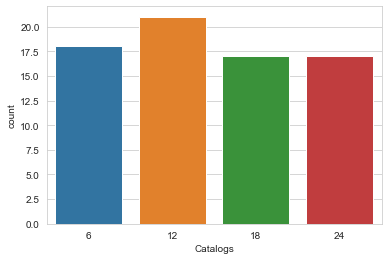

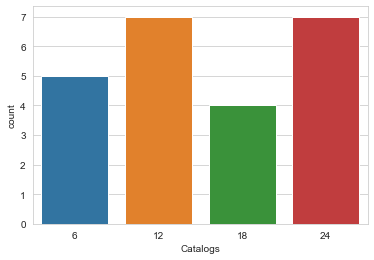

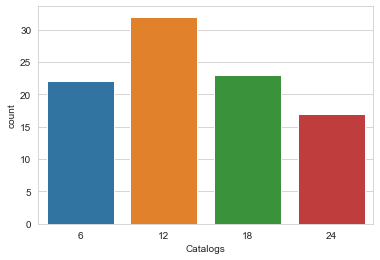

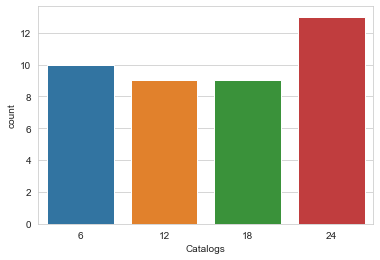

In [109]:
sns.countplot(data=df19, x='Catalogs')
plt.show()

sns.countplot(data=df20, x='Catalogs')
plt.show()

sns.countplot(data=df21, x='Catalogs')
plt.show()

sns.countplot(data=df22, x='Catalogs')
plt.show()

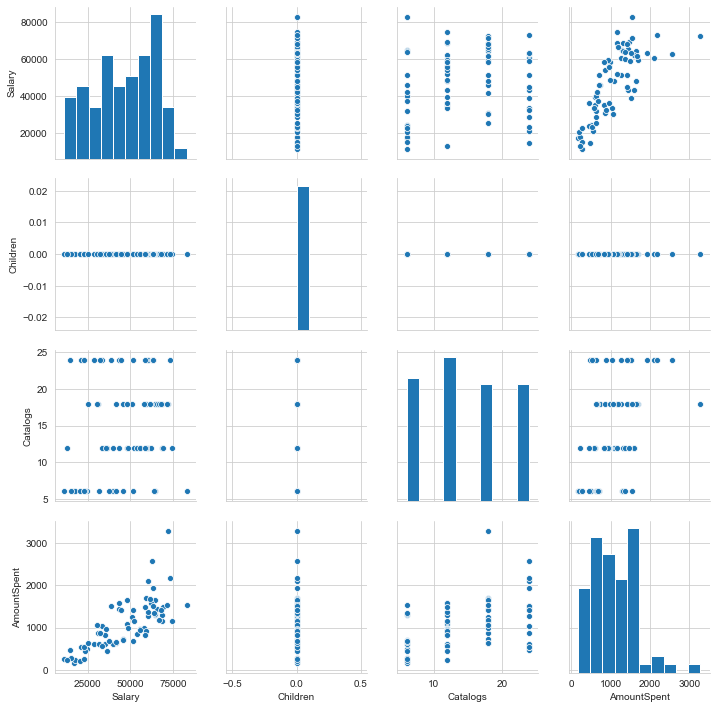

In [155]:
sns.pairplot(df19)

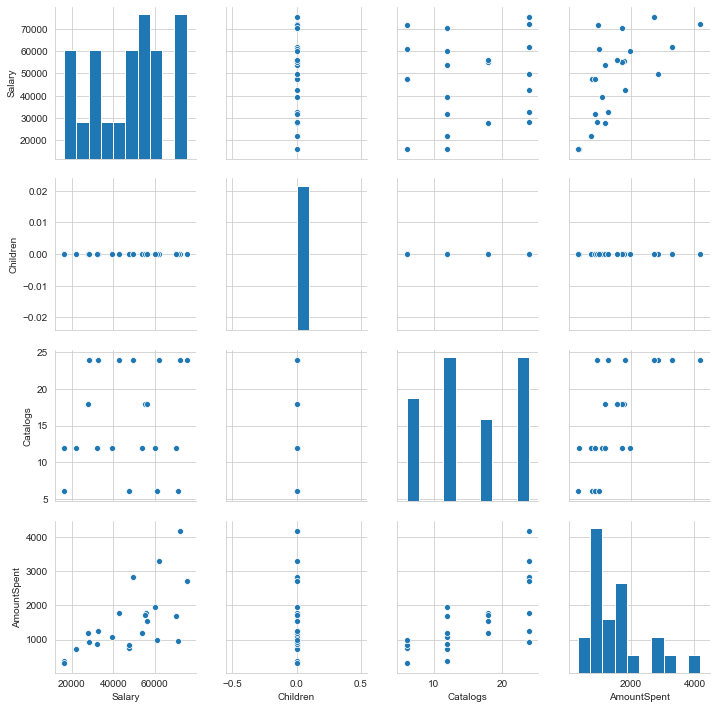

In [156]:
sns.pairplot(df20)

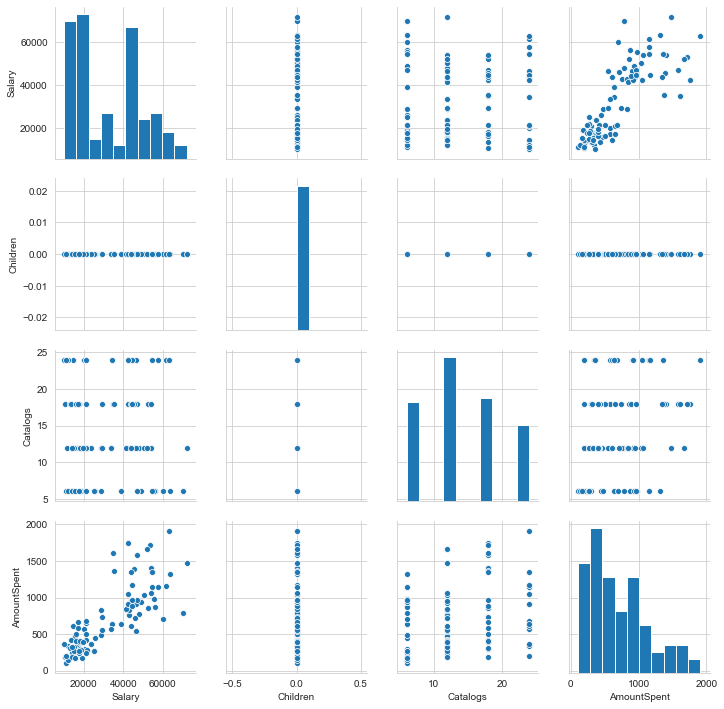

In [157]:
sns.pairplot(df21)

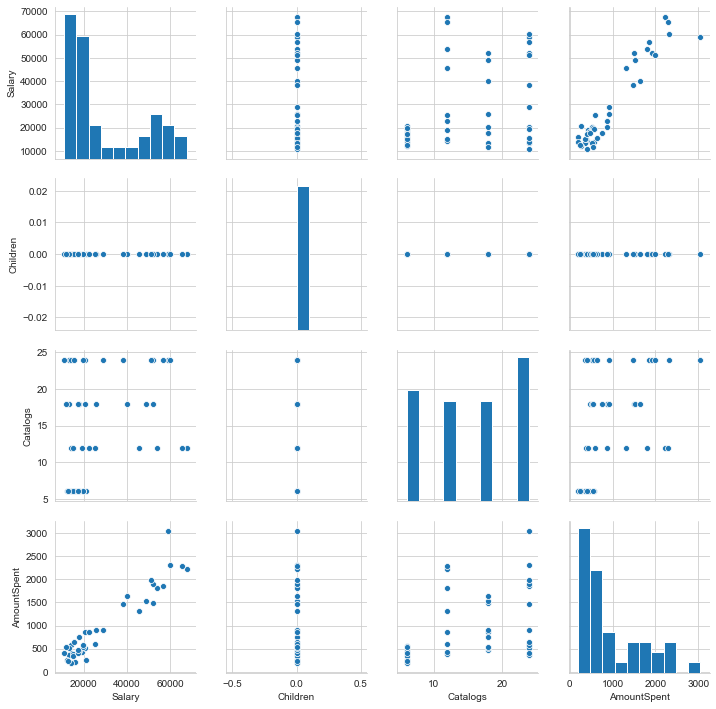

In [158]:
sns.pairplot(df22)

Sama seperti data sebelumnya kepemilikan rumah masih mempengaruhi pengeluaran sedangkan rata-rata yang jarak dekat dan memiliki rumah penghasilannya lebih tinggi dibandingkan yang lain.

Kali ini saya akan menganalisa berdasarkan status dan memliki anak

## Have children based on single status

In [26]:
df23 = df[(df.Married=='Single')&(df.Location=='Close')&(df.OwnHome=='Own')&(df.Children>0)]
df24 = df[(df.Married=='Single')&(df.Location=='Far')&(df.OwnHome=='Own')&(df.Children>0)]
df25 = df[(df.Married=='Single')&(df.Location=='Close')&(df.OwnHome=='Rent')&(df.Children>0)]
df26 = df[(df.Married=='Single')&(df.Location=='Far')&(df.OwnHome=='Rent')&(df.Children>0)]

In [201]:
df23.head()

Age  Gender OwnHome  Married Location  Salary  Children  Catalogs  \
3   Middle    Male     Own  Married    Close   85600         1        18   
8   Middle  Female     Own  Married    Close   51900         3         6   
12  Middle  Female     Own  Married    Close   44100         1        24   
25  Middle  Female     Own  Married    Close   92300         3        18   
48  Middle    Male     Own  Married    Close  126500         2        18   

    AmountSpent  
3        2436.0  
8         158.0  
12        704.0  
25        655.0  
48       2000.0

In [111]:
df23.describe()

Salary   Children   Catalogs  AmountSpent
count     68.000000  68.000000  68.000000    67.000000
mean   46083.823529   1.882353  12.882353   755.731343
std    14227.602039   0.820073   6.068095   561.948816
min    12700.000000   1.000000   6.000000    65.000000
25%    35650.000000   1.000000   6.000000   409.000000
50%    47750.000000   2.000000  12.000000   571.000000
75%    55600.000000   3.000000  18.000000  1013.500000
max    76800.000000   3.000000  24.000000  2784.000000

In [185]:
df23.describe(include=np.object)

Age Gender OwnHome  Married Location
count      122    122     122      122      122
unique       3      2       1        1        1
top     Middle   Male     Own  Married    Close
freq       116     69     122      122      122

In [112]:
df24.describe()

Salary   Children   Catalogs  AmountSpent
count     27.000000  27.000000  27.000000    26.000000
mean   47096.296296   1.814815  15.333333  1127.538462
std    16876.120623   0.786278   6.725382   595.657770
min    21400.000000   1.000000   6.000000   326.000000
25%    32600.000000   1.000000  12.000000   704.500000
50%    48100.000000   2.000000  18.000000   981.000000
75%    61900.000000   2.000000  21.000000  1494.750000
max    80800.000000   3.000000  24.000000  2444.000000

In [186]:
df24.describe(include=np.object)

Age Gender OwnHome  Married Location
count       43     43      43       43       43
unique       3      2       1        1        1
top     Middle   Male     Own  Married      Far
freq        39     29      43       43       43

In [113]:
df25.describe()

Salary    Children    Catalogs  AmountSpent
count    117.000000  117.000000  117.000000   115.000000
mean   26005.982906    1.666667   12.153846   379.391304
std    13646.682625    0.820008    6.374269   271.760011
min    10200.000000    1.000000    6.000000     0.000000
25%    14600.000000    1.000000    6.000000   198.000000
50%    21900.000000    1.000000   12.000000   308.000000
75%    35100.000000    2.000000   18.000000   505.000000
max    63800.000000    3.000000   24.000000  1622.000000

In [187]:
df25.describe(include=np.object)

Age  Gender OwnHome  Married Location
count       73      73      73       73       73
unique       3       2       1        1        1
top     Middle  Female    Rent  Married    Close
freq        44      41      73       73       73

In [114]:
df26.describe()

Salary   Children   Catalogs  AmountSpent
count     55.000000  55.000000  55.000000    55.000000
mean   25180.000000   1.600000  13.418182   621.254545
std    13861.556216   0.760117   6.729402   409.413728
min        0.000000   1.000000   6.000000   123.000000
25%    14350.000000   1.000000   6.000000   320.500000
50%    20300.000000   1.000000  12.000000   457.000000
75%    36150.000000   2.000000  18.000000   879.000000
max    58600.000000   3.000000  24.000000  1773.000000

In [188]:
df26.describe(include=np.object)

Age Gender OwnHome  Married Location
count       33     33      33       33       33
unique       2      2       1        1        1
top     Middle   Male    Rent  Married      Far
freq        22     21      33       33       33

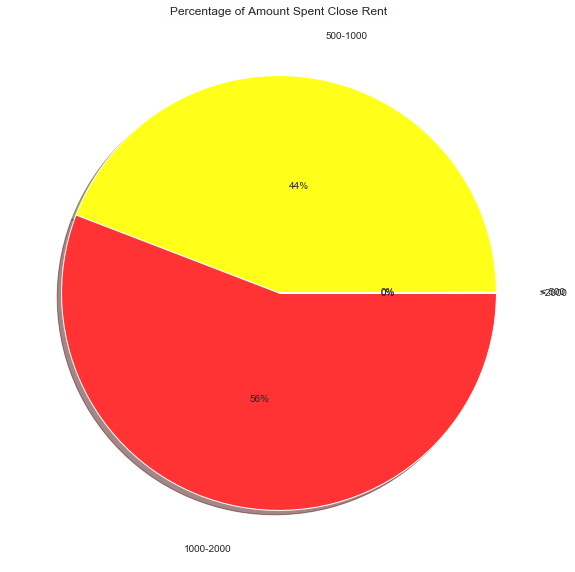

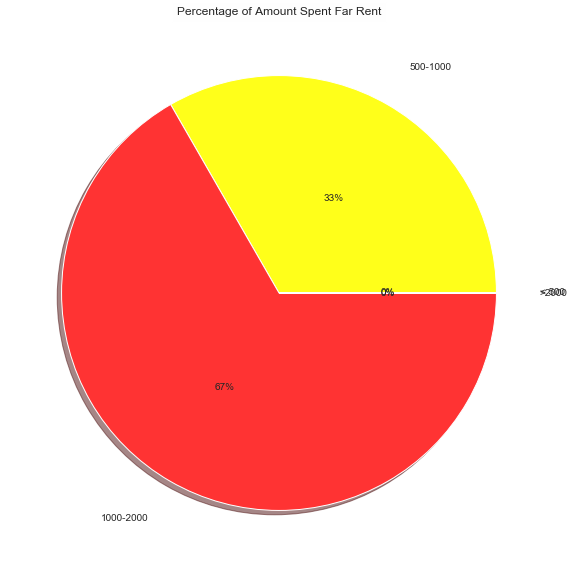

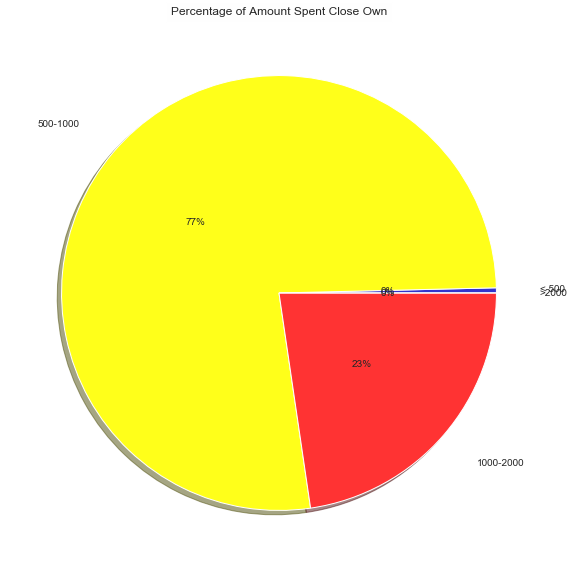

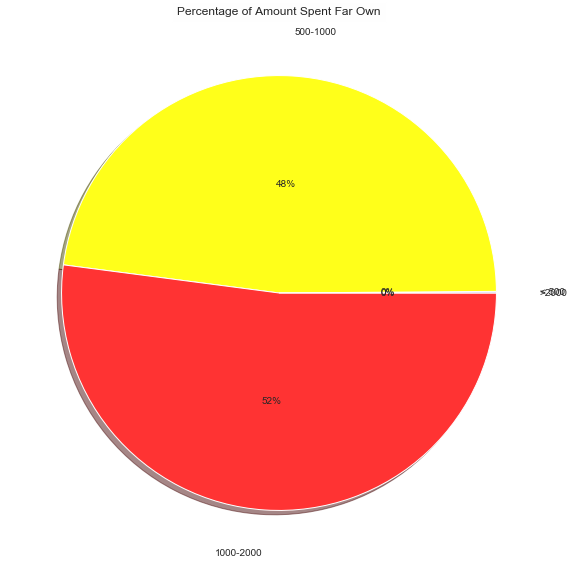

In [115]:
slices=[(df23.AmountSpent<500).sum(),
        df23['AmountSpent'][(df23.AmountSpent>500) & (df23.AmountSpent<1000)].sum(),
        df23['AmountSpent'][(df23.AmountSpent>1000) & (df23.AmountSpent<2000)].sum(),
        (df23.AmountSpent>2000).sum(),]
labels=['< 500','500-1000','1000-2000','>2000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Amount Spent Close Rent", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

slices=[(df24.AmountSpent<500).sum(),
        df24['AmountSpent'][(df24.AmountSpent>500) & (df24.AmountSpent<1000)].sum(),
        df24['AmountSpent'][(df24.AmountSpent>1000) & (df24.AmountSpent<2000)].sum(),
        (df24.AmountSpent>2000).sum(),]
labels=['< 500','500-1000','1000-2000','>2000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Amount Spent Far Rent", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

slices=[(df25.AmountSpent<500).sum(),
        df25['AmountSpent'][(df25.AmountSpent>500) & (df25.AmountSpent<1000)].sum(),
        df25['AmountSpent'][(df25.AmountSpent>1000) & (df25.AmountSpent<2000)].sum(),
        (df25.AmountSpent>2000).sum(),]
labels=['< 500','500-1000','1000-2000','>2000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Amount Spent Close Own", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

slices=[(df26.AmountSpent<500).sum(),
        df26['AmountSpent'][(df26.AmountSpent>500) & (df26.AmountSpent<1000)].sum(),
        df26['AmountSpent'][(df26.AmountSpent>1000) & (df26.AmountSpent<2000)].sum(),
        (df26.AmountSpent>2000).sum(),]
labels=['< 500','500-1000','1000-2000','>2000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Amount Spent Far Own", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

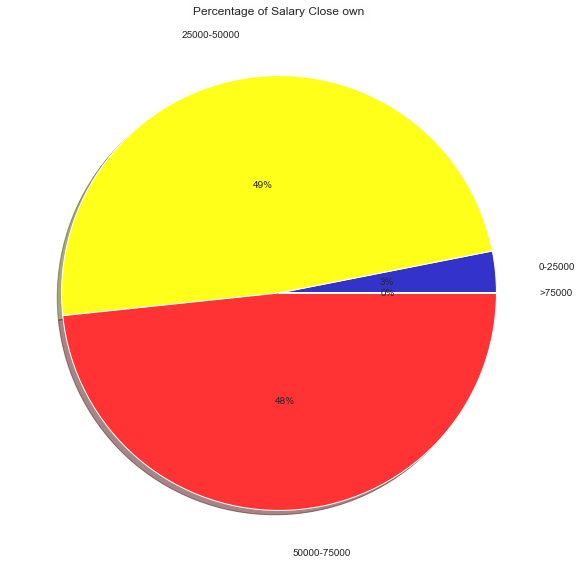

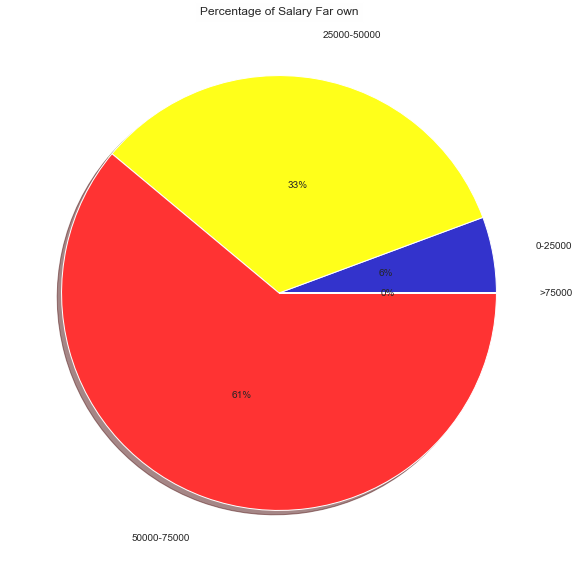

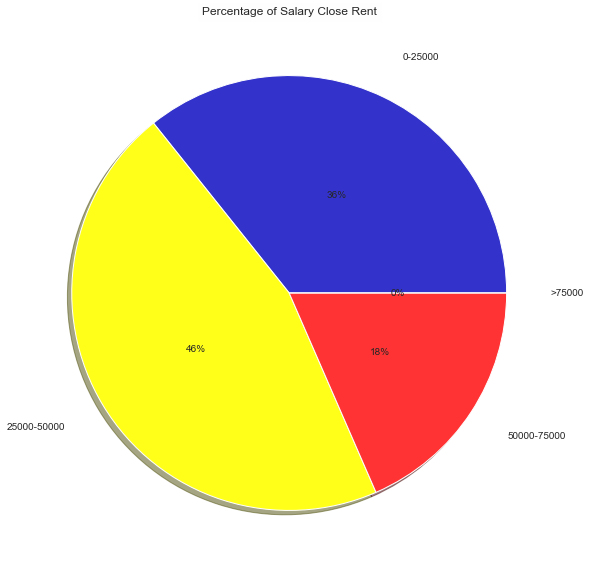

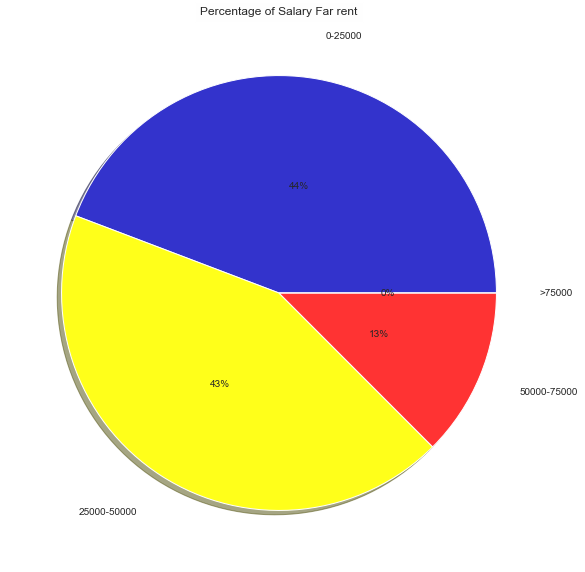

In [27]:
slices=[df23['Salary'][(df23.Salary>=0) & (df23.Salary<25000)].sum(),
        df23['Salary'][(df23.Salary>25000) & (df23.Salary<50000)].sum(),
        df23['Salary'][(df23.Salary>50000) & (df23.Salary<75000)].sum(),
        (df23.Salary>75000).sum(),]
labels=['0-25000','25000-50000','50000-75000','>75000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Salary Close own", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

slices=[df24['Salary'][(df24.Salary>=0) & (df24.Salary<25000)].sum(),
        df24['Salary'][(df24.Salary>25000) & (df24.Salary<50000)].sum(),
        df24['Salary'][(df24.Salary>50000) & (df24.Salary<75000)].sum(),
        (df24.Salary>75000).sum(),]
labels=['0-25000','25000-50000','50000-75000','>75000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Salary Far own", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

slices=[df25['Salary'][(df25.Salary>=0) & (df25.Salary<25000)].sum(),
        df25['Salary'][(df25.Salary>25000) & (df25.Salary<50000)].sum(),
        df25['Salary'][(df25.Salary>50000) & (df25.Salary<75000)].sum(),
        (df25.Salary>75000).sum(),]
labels=['0-25000','25000-50000','50000-75000','>75000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Salary Close Rent", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

slices=[df26['Salary'][(df26.Salary>=0) & (df26.Salary<25000)].sum(),
        df26['Salary'][(df26.Salary>25000) & (df26.Salary<50000)].sum(),
        df26['Salary'][(df26.Salary>50000) & (df26.Salary<75000)].sum(),
        (df26.Salary>75000).sum(),]
labels=['0-25000','25000-50000','50000-75000','>75000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Salary Far rent", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

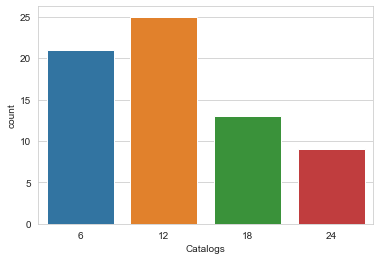

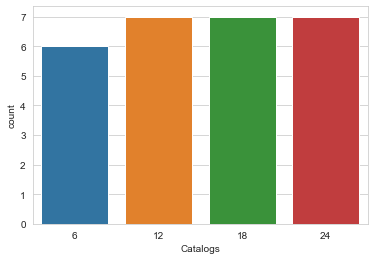

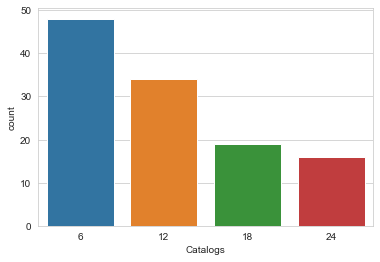

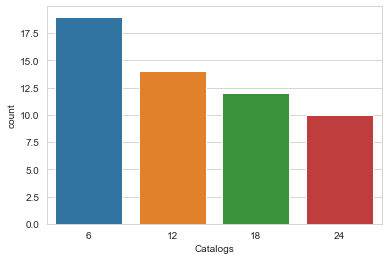

In [117]:
sns.countplot(data=df23, x='Catalogs')
plt.show()

sns.countplot(data=df24, x='Catalogs')
plt.show()

sns.countplot(data=df25, x='Catalogs')
plt.show()

sns.countplot(data=df26, x='Catalogs')
plt.show()

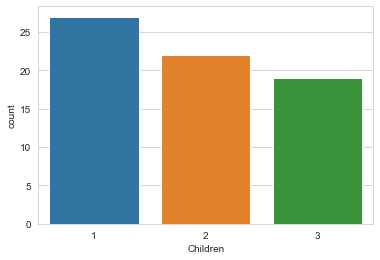

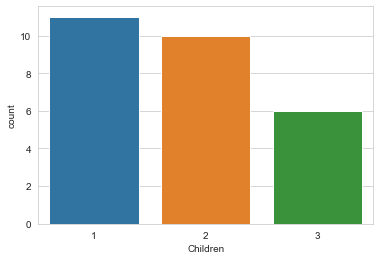

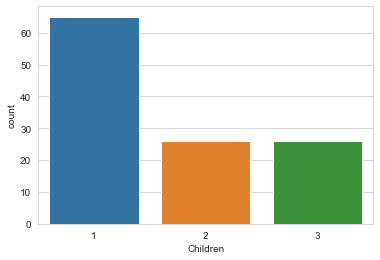

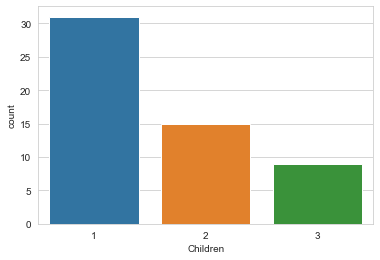

In [118]:
sns.countplot(data=df23, x='Children')
plt.show()

sns.countplot(data=df24, x='Children')
plt.show()

sns.countplot(data=df25, x='Children')
plt.show()

sns.countplot(data=df26, x='Children')
plt.show()

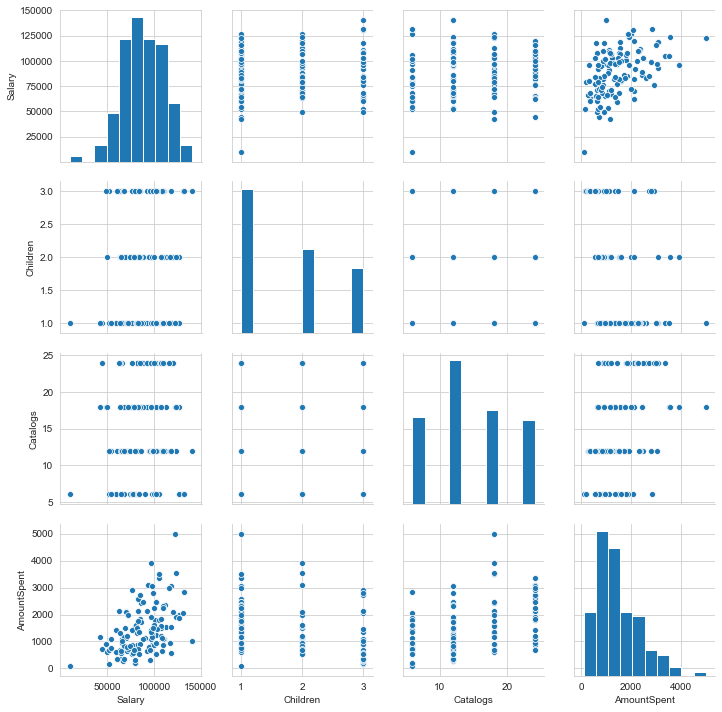

In [147]:
sns.pairplot(df23)

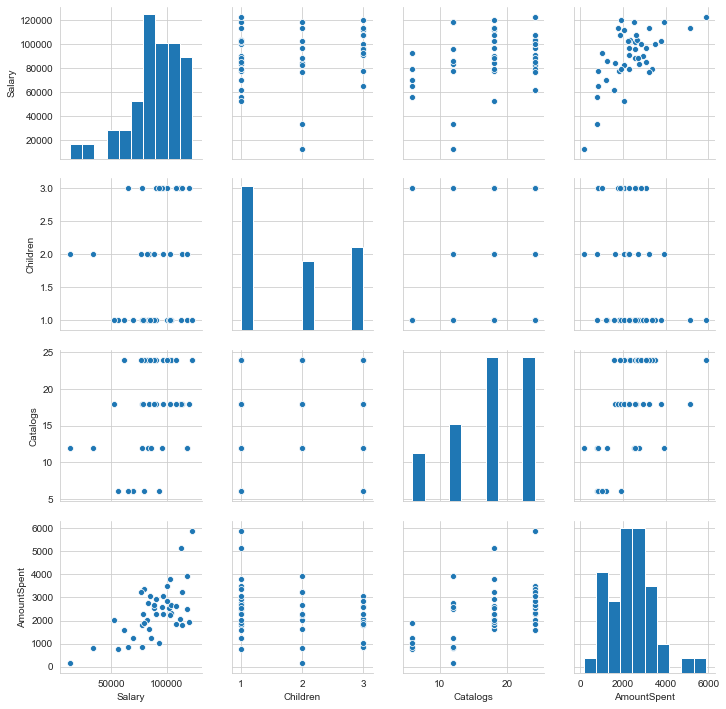

In [148]:
sns.pairplot(df24)

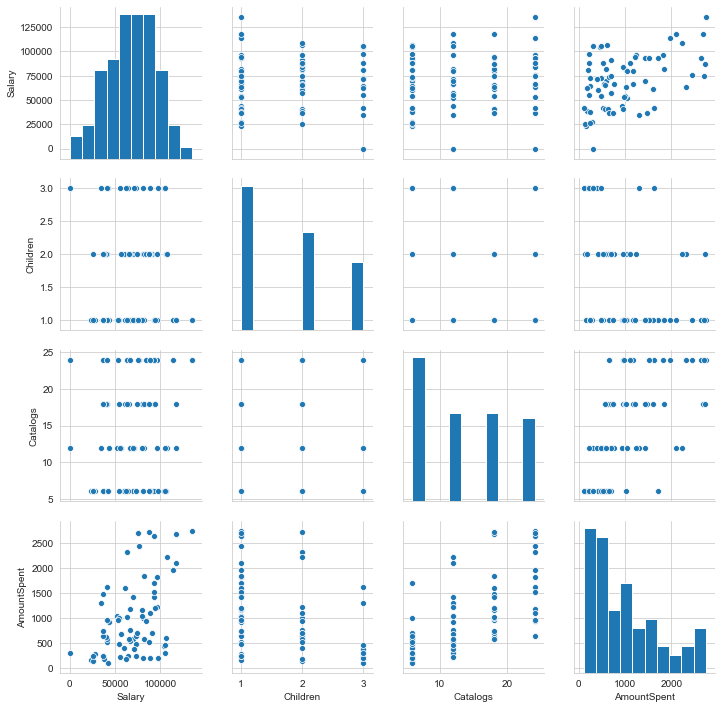

In [149]:
sns.pairplot(df25)

In [ ]:
sns.pairplot(df26)

Bagi para single parent yang memiliki anak serta jarak ke retail marketnya jauh tentu memiliki pengeluaran lebih tinggi apalagi mereka kost.

## Have Children based on married status

In [28]:
df27 = df[(df.Married=='Married')&(df.Location=='Close')&(df.OwnHome=='Own')&(df.Children>0)]
df28 = df[(df.Married=='Married')&(df.Location=='Far')&(df.OwnHome=='Own')&(df.Children>0)]
df29 = df[(df.Married=='Married')&(df.Location=='Close')&(df.OwnHome=='Rent')&(df.Children>0)]
df30 = df[(df.Married=='Married')&(df.Location=='Far')&(df.OwnHome=='Rent')&(df.Children>0)]

In [121]:
df27.describe()

Salary    Children    Catalogs  AmountSpent
count     122.000000  122.000000  122.000000   122.000000
mean    87899.180328    1.729508   14.557377  1427.581967
std     22299.136461    0.803267    6.262903   891.614070
min     10100.000000    1.000000    6.000000    93.000000
25%     71300.000000    1.000000   12.000000   717.750000
50%     86000.000000    2.000000   12.000000  1183.000000
75%    102650.000000    2.000000   18.000000  1904.750000
max    140700.000000    3.000000   24.000000  4984.000000

In [189]:
df27.describe(include=np.object)

Age Gender OwnHome  Married Location
count      122    122     122      122      122
unique       3      2       1        1        1
top     Middle   Male     Own  Married    Close
freq       116     69     122      122      122

In [122]:
df28.describe()

Salary   Children   Catalogs  AmountSpent
count      43.000000  43.000000  43.000000    43.000000
mean    89451.162791   1.790698  17.581395  2372.232558
std     22954.627836   0.860734   6.056215  1112.346551
min     12600.000000   1.000000   6.000000   164.000000
25%     79100.000000   1.000000  12.000000  1801.500000
50%     90700.000000   2.000000  18.000000  2299.000000
75%    103800.000000   3.000000  24.000000  2881.000000
max    123000.000000   3.000000  24.000000  5878.000000

In [191]:
df28.describe(include=np.object)

Age Gender OwnHome  Married Location
count       43     43      43       43       43
unique       3      2       1        1        1
top     Middle   Male     Own  Married      Far
freq        39     29      43       43       43

In [123]:
df29.describe()

Salary   Children   Catalogs  AmountSpent
count      73.000000  73.000000  73.000000    72.000000
mean    68869.863014   1.753425  13.643836   991.694444
std     28118.087718   0.795488   6.946961   747.731737
min         0.000000   1.000000   6.000000   105.000000
25%     43700.000000   1.000000   6.000000   439.750000
50%     69700.000000   2.000000  12.000000   727.500000
75%     88600.000000   2.000000  18.000000  1427.500000
max    135700.000000   3.000000  24.000000  2746.000000

In [192]:
df29.describe(include=np.object)

Age  Gender OwnHome  Married Location
count       73      73      73       73       73
unique       3       2       1        1        1
top     Middle  Female    Rent  Married    Close
freq        44      41      73       73       73

In [124]:
df30.describe()

Salary   Children   Catalogs  AmountSpent
count      33.000000  33.000000  33.000000    32.000000
mean    64363.636364   1.757576  17.090909  1740.281250
std     23266.658255   0.902438   6.559171   953.703079
min     20200.000000   1.000000   6.000000   500.000000
25%     47200.000000   1.000000  12.000000  1242.000000
50%     63300.000000   1.000000  18.000000  1532.500000
75%     72200.000000   3.000000  24.000000  2109.750000
max    124800.000000   3.000000  24.000000  5830.000000

In [193]:
df30.describe(include=np.object)

Age Gender OwnHome  Married Location
count       33     33      33       33       33
unique       2      2       1        1        1
top     Middle   Male    Rent  Married      Far
freq        22     21      33       33       33

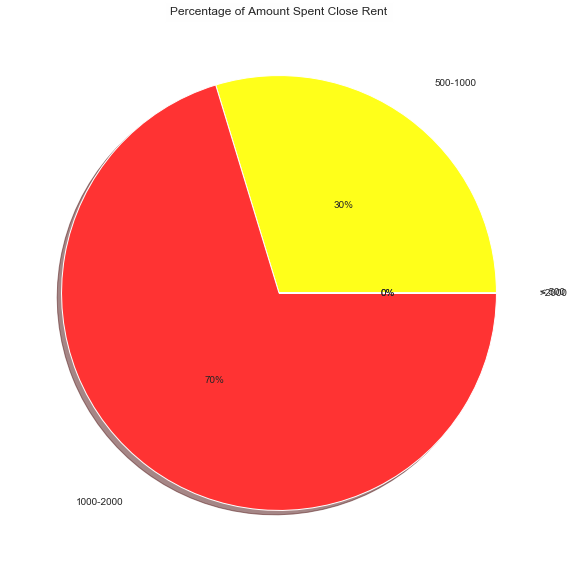

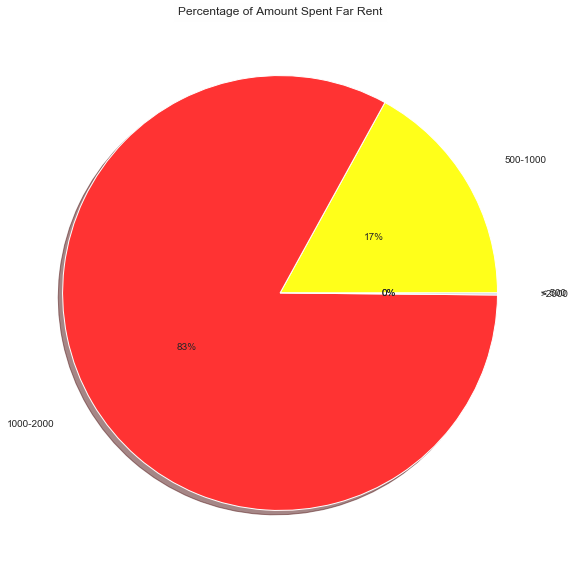

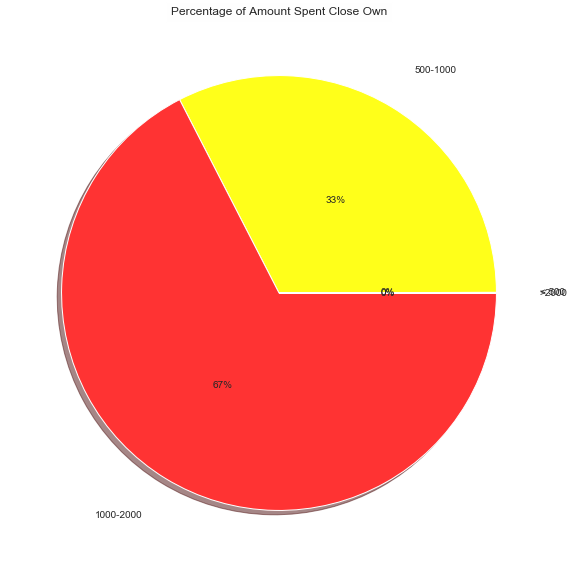

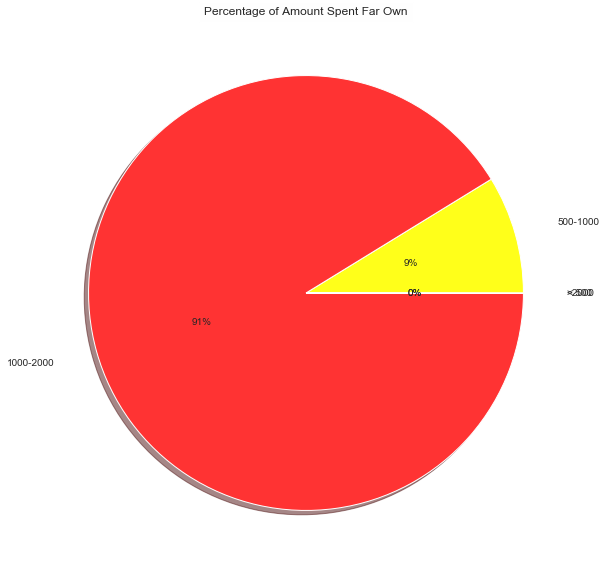

In [127]:
slices=[(df27.AmountSpent<500).sum(),
        df27['AmountSpent'][(df27.AmountSpent>500) & (df27.AmountSpent<1000)].sum(),
        df27['AmountSpent'][(df27.AmountSpent>1000) & (df27.AmountSpent<2000)].sum(),
        (df27.AmountSpent>2000).sum(),]
labels=['< 500','500-1000','1000-2000','>2000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Amount Spent Close Rent", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

slices=[(df28.AmountSpent<500).sum(),
        df28['AmountSpent'][(df28.AmountSpent>500) & (df28.AmountSpent<1000)].sum(),
        df28['AmountSpent'][(df28.AmountSpent>1000) & (df28.AmountSpent<2000)].sum(),
        (df28.AmountSpent>2000).sum(),]
labels=['< 500','500-1000','1000-2000','>2000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Amount Spent Far Rent", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

slices=[(df29.AmountSpent<500).sum(),
        df29['AmountSpent'][(df29.AmountSpent>500) & (df29.AmountSpent<1000)].sum(),
        df29['AmountSpent'][(df29.AmountSpent>1000) & (df29.AmountSpent<2000)].sum(),
        (df29.AmountSpent>2000).sum(),]
labels=['< 500','500-1000','1000-2000','>2000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Amount Spent Close Own", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

slices=[(df30.AmountSpent<500).sum(),
        df30['AmountSpent'][(df30.AmountSpent>500) & (df30.AmountSpent<1000)].sum(),
        df30['AmountSpent'][(df30.AmountSpent>1000) & (df30.AmountSpent<2000)].sum(),
        (df30.AmountSpent>2000).sum(),]
labels=['< 500','500-1000','1000-2000','>2000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Amount Spent Far Own", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

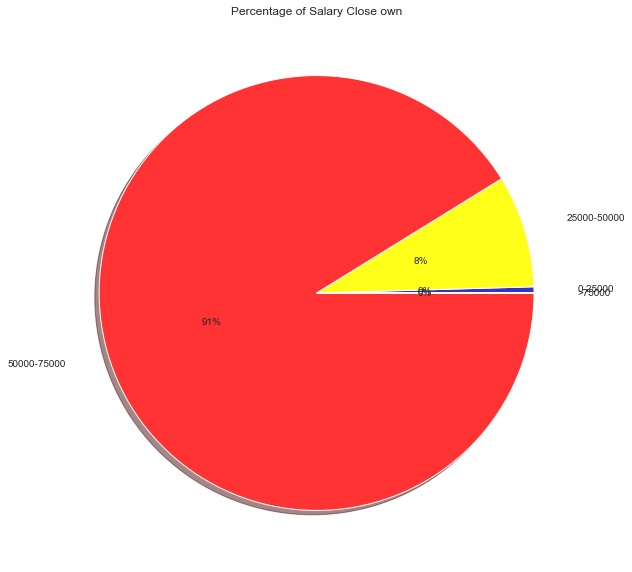

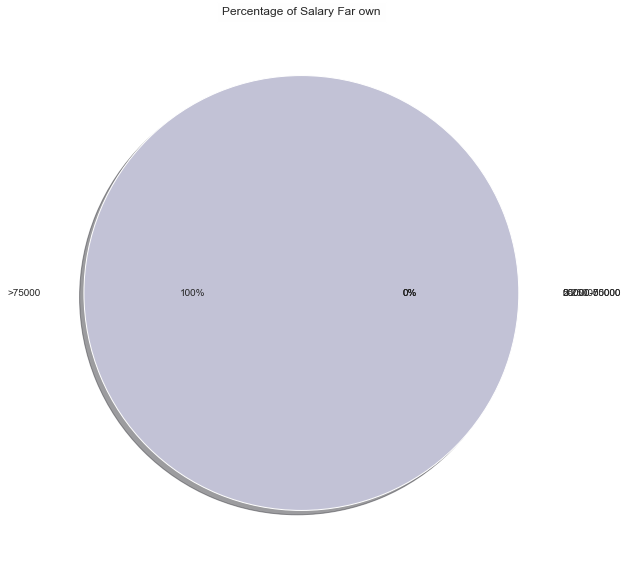

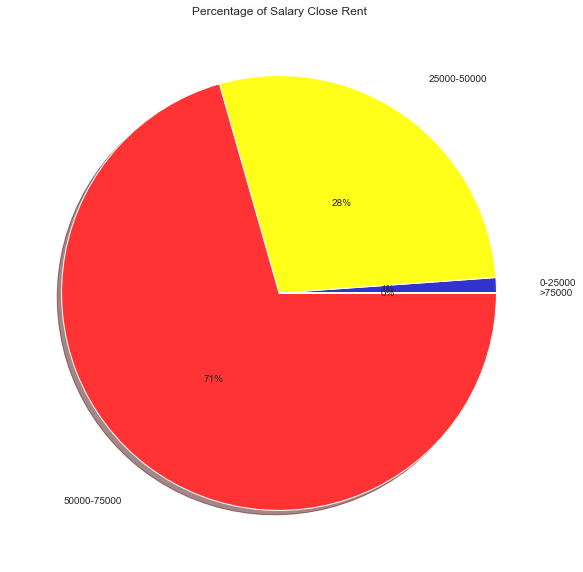

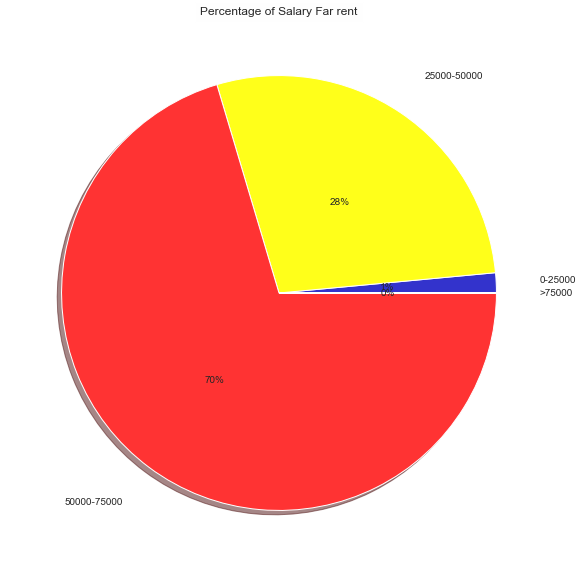

In [29]:
slices=[df27['Salary'][(df27.Salary>=0) & (df27.Salary<25000)].sum(),
        df27['Salary'][(df27.Salary>25000) & (df27.Salary<50000)].sum(),
        df27['Salary'][(df27.Salary>50000) & (df27.Salary<75000)].sum(),
        (df27.Salary>75000).sum(),]
labels=['0-25000','25000-50000','50000-75000','>75000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Salary Close own", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

slices=[df28['Salary'][(df24.Salary>=0) & (df28.Salary<25000)].sum(),
        df28['Salary'][(df24.Salary>25000) & (df28.Salary<50000)].sum(),
        df28['Salary'][(df24.Salary>50000) & (df28.Salary<75000)].sum(),
        (df24.Salary>75000).sum(),]
labels=['0-25000','25000-50000','50000-75000','>75000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Salary Far own", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

slices=[df29['Salary'][(df29.Salary>=0) & (df29.Salary<25000)].sum(),
        df29['Salary'][(df29.Salary>25000) & (df29.Salary<50000)].sum(),
        df29['Salary'][(df29.Salary>50000) & (df29.Salary<75000)].sum(),
        (df29.Salary>75000).sum(),]
labels=['0-25000','25000-50000','50000-75000','>75000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Salary Close Rent", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

slices=[df30['Salary'][(df30.Salary>=0) & (df30.Salary<25000)].sum(),
        df30['Salary'][(df30.Salary>25000) & (df30.Salary<50000)].sum(),
        df30['Salary'][(df30.Salary>50000) & (df30.Salary<75000)].sum(),
        (df30.Salary>75000).sum(),]
labels=['0-25000','25000-50000','50000-75000','>75000']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Salary Far rent", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

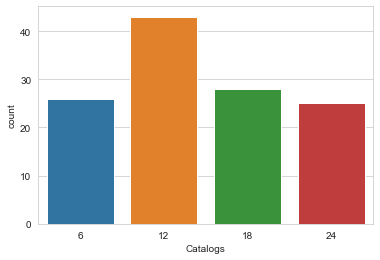

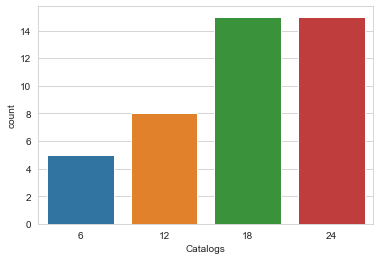

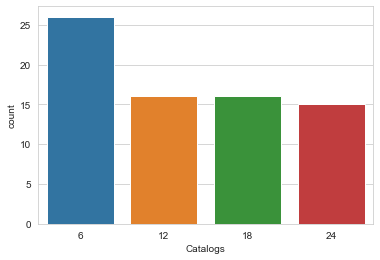

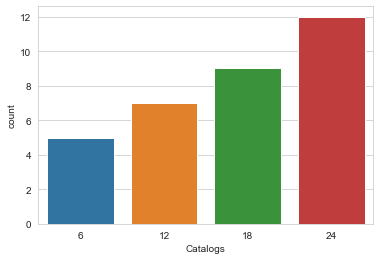

In [129]:
sns.countplot(data=df27, x='Catalogs')
plt.show()

sns.countplot(data=df28, x='Catalogs')
plt.show()

sns.countplot(data=df29, x='Catalogs')
plt.show()

sns.countplot(data=df30, x='Catalogs')
plt.show()

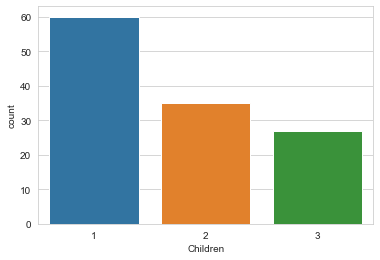

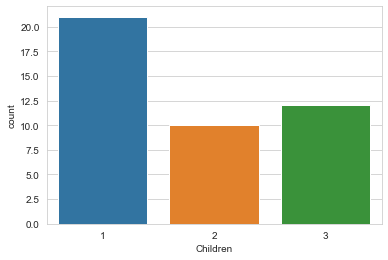

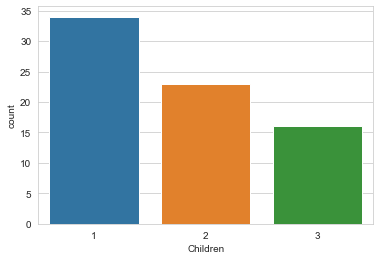

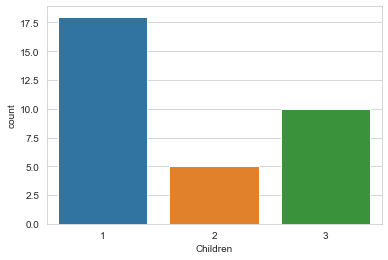

In [130]:
sns.countplot(data=df27, x='Children')
plt.show()

sns.countplot(data=df28, x='Children')
plt.show()

sns.countplot(data=df29, x='Children')
plt.show()

sns.countplot(data=df30, x='Children')
plt.show()

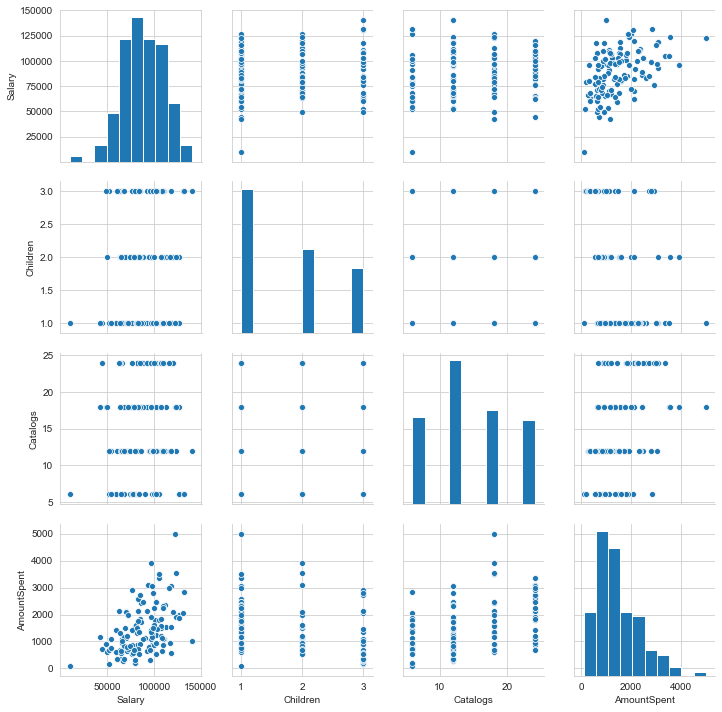

In [143]:
sns.pairplot(df27)

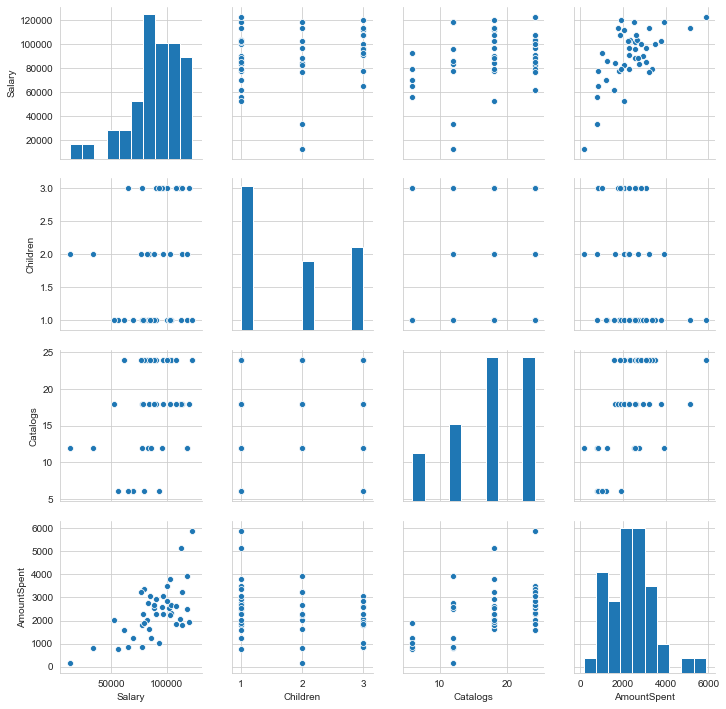

In [144]:
sns.pairplot(df28)

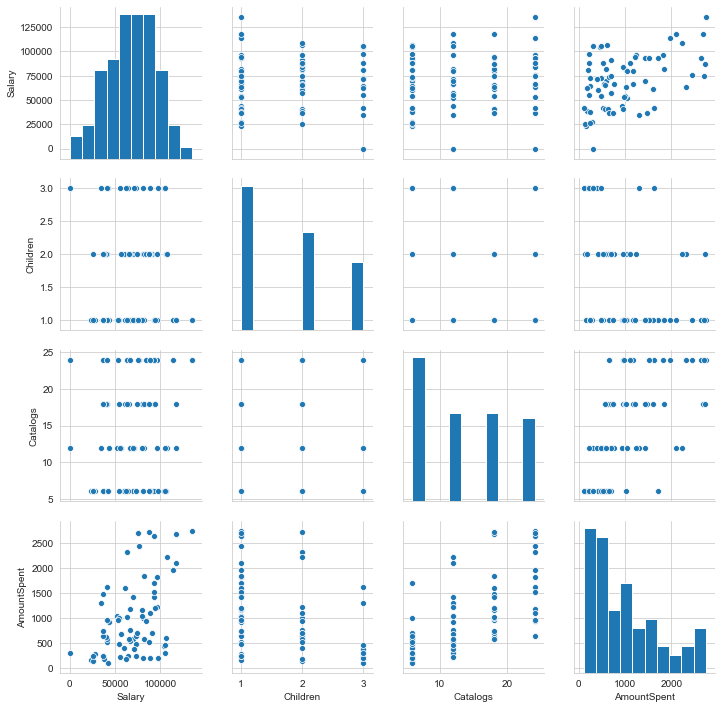

In [145]:
sns.pairplot(df29)

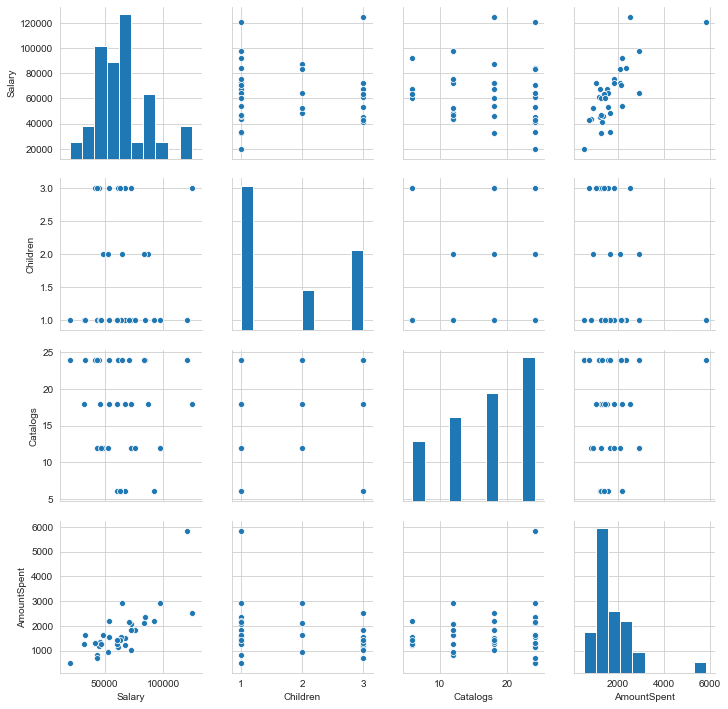

In [146]:
sns.pairplot(df30)

Tidak ada perbedaan plot pengeluaran dengan sebelumnya. Namun, pada pendapatan yang berjarak jauh dan memiliki rumah sendiri memiliki range gaji yang sangat tinggi >75000 dolar yang dimana mereka adalah pasangan suami istri yang ,memiliki anak. Asumsi saya mungkin anak-anak mereka telah memasuki usia produktif sehingga mereka bisa mengahasilkan uang yang berpengaruh pada pendapatan keluarga mereka.

## Kesimpulan

Dari Analisa diatas kita mengetahui bahwa jarak, kepemilikan rumah sangat berpengaruh pada pengeluaran mereka karena semakin jauh jarak maka biaya transport semakin besar, begitu juga dengan kepemilikan rumah, jika mereka masih kost maka mereka harus mengeluarkan biaya. 

Sedangkan pada penghasilan terdapat perbedaan pada yang memiliki anak dan yang tidak memiliki anak. Dimana keluarga yang memiliki anak pendapatannya lebih tinggi dibanding yang belum punya anak. Meski pada data tersebut tidak dijabarkan umur anak mereka, kita bisa simpulkan bahwa ada kemungkinan anak-anak mereka memasuki usia produktif dan sudah punya penghasilan yang berpengaruh pada penghasian keluarga mereka.